# pile range 
234 - 236

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
import pywt

In [2]:
N_group = 81
T = 10
T1 = 0
T2 = 10
Left_edge = 234
Right_edge = 236

In [3]:
def data_load(path,N_group):
    f = open(path)
    lines = f.read()
    f.close()
    N_group = N_group
    lines1 = lines.split("\n",(1000*T+1)*N_group-1)
    data_list =[]
    for element in lines1:
        temp = element.split(' ',1)
        temp0 = temp[1]
        temp1 = temp0.strip()
        data_list.append(float(temp1))
    data = np.array(data_list)
    return data

In [4]:
def wgn(x, snr):
    Ps = np.sum(abs(x)**2)/len(x)
    Pn = Ps/(10**((snr/10)))
    noise = np.random.randn(len(x)) * np.sqrt(Pn)
    signal_add_noise = x + noise
    return signal_add_noise

In [5]:
# 小波滤噪
def wavelet_denoising(data):
    # 小波函数取db4
    db4 = pywt.Wavelet('sym2')
    coeffs = pywt.wavedec(data, db4)
        # 高频系数置零
    coeffs[len(coeffs)-1] *= 0
    coeffs[len(coeffs)-2] *= 0
        # 重构
    meta = pywt.waverec(coeffs, db4)
    return meta

In [6]:
import scipy
from scipy import signal

order = 5
sampling_freq = 100
cutoff_freq = 3
sampling_duration = 5
number_of_samples = sampling_freq * sampling_duration
normalized_cutoff_freq = 2 * cutoff_freq / sampling_freq
numerator_coeffs, denominator_coeffs = scipy.signal.butter(order, normalized_cutoff_freq)

# Without a pile

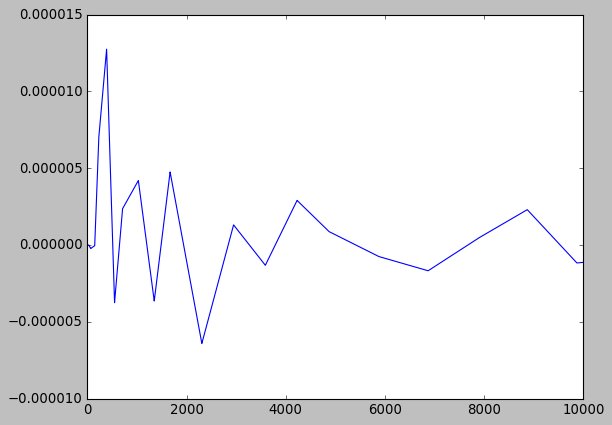

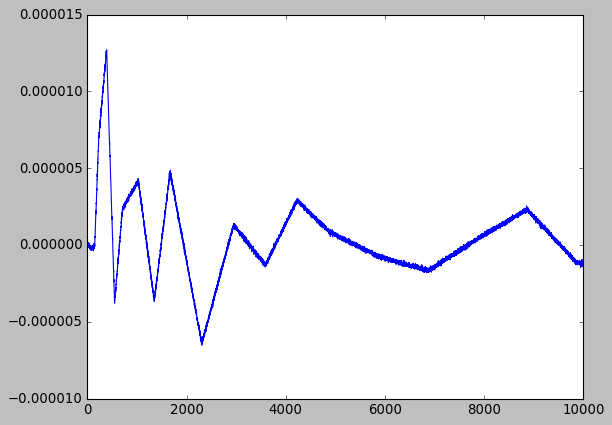

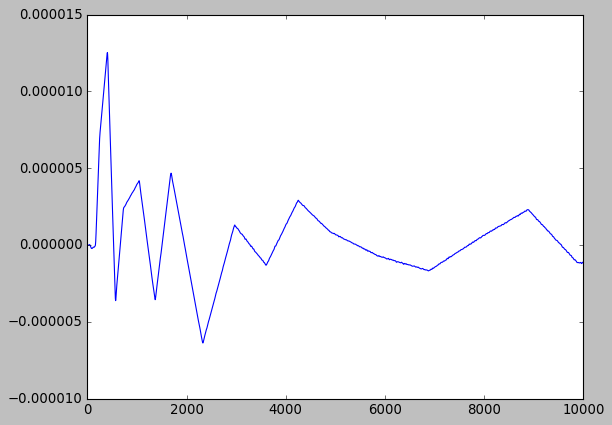

In [7]:
snr = 30
N_wv = 0

# 'v_disp_210_230_total41_without_a_plie.txt'
v_disp_210_230_total41_without_a_plie1 = data_load('v_disp_result_without_pile_210_230.txt',N_group)
v_disp_210_230_total41_without_a_plie2 = v_disp_210_230_total41_without_a_plie1.reshape(N_group,1000*T+1)
# 1200*41
v_disp_210_230_total41_without_a_plie3 = np.transpose(v_disp_210_230_total41_without_a_plie2)
# delete time 0
v_disp_210_230_total41_without_a_plie = v_disp_210_230_total41_without_a_plie3[int(1000*T1+1):int(1000*T2+1),:]
# test
plt.plot(v_disp_210_230_total41_without_a_plie[:,1])
plt.show()

for i in range(0,v_disp_210_230_total41_without_a_plie.shape[1]):
    v_disp_210_230_total41_without_a_plie[:,i] = wgn(v_disp_210_230_total41_without_a_plie[:,i],snr)
plt.plot(v_disp_210_230_total41_without_a_plie[:,1]) 
plt.show()

# v_disp_210_230_total41_without_a_plie

for i in range(0,v_disp_210_230_total41_without_a_plie.shape[1]):
    y = v_disp_210_230_total41_without_a_plie[:,i]
    for i in range(0,N_wv):
        y = wavelet_denoising(y)
    y = scipy.signal.lfilter(numerator_coeffs, denominator_coeffs, y)
    v_disp_210_230_total41_without_a_plie[:,i] = y
plt.plot(v_disp_210_230_total41_without_a_plie[:,1])
plt.show()

# with_a_plie

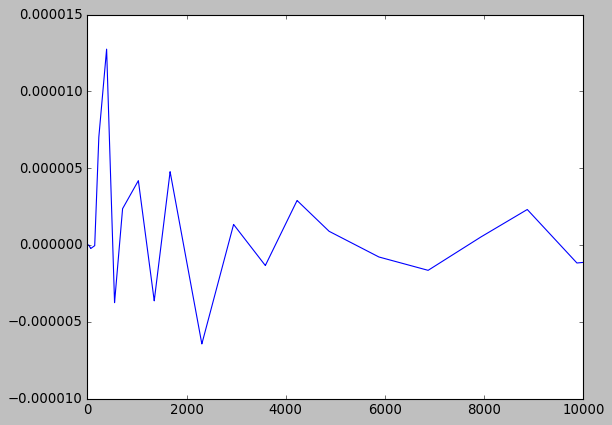

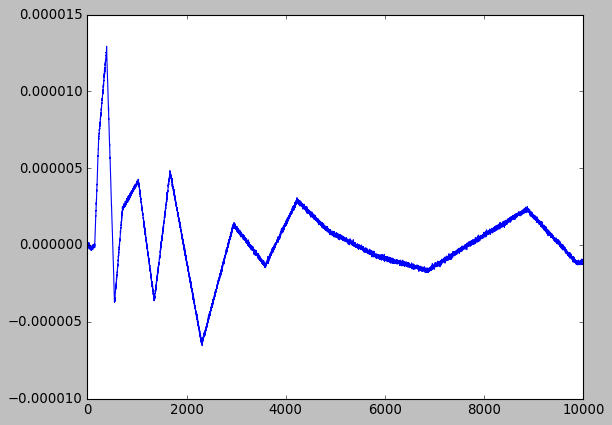

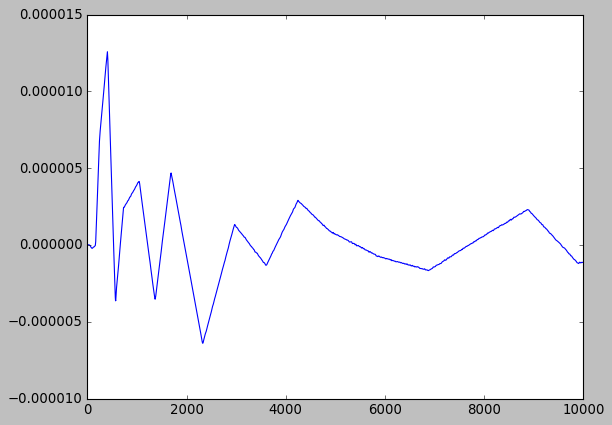

In [8]:
# 'v_disp_210_230_total41_with_a_plie.txt'
v_disp_210_230_total41_with_a_plie1 = data_load('v_disp_result_with_pile_210_230.txt',N_group)
v_disp_210_230_total41_with_a_plie2 = v_disp_210_230_total41_with_a_plie1.reshape(N_group,1000*T+1)
# 1200*41
v_disp_210_230_total41_with_a_plie3 = np.transpose(v_disp_210_230_total41_with_a_plie2)
# delete time 0
v_disp_210_230_total41_with_a_plie = v_disp_210_230_total41_with_a_plie3[int(1000*T1+1):int(1000*T2+1),:]
# test
plt.plot(v_disp_210_230_total41_with_a_plie[:,1])
plt.show()


for i in range(0,v_disp_210_230_total41_with_a_plie.shape[1]):
    v_disp_210_230_total41_with_a_plie[:,i] = wgn(v_disp_210_230_total41_with_a_plie[:,i],snr)
plt.plot(v_disp_210_230_total41_with_a_plie[:,1])   
plt.show()

# v_disp_210_230_total41_without_a_plie_f =np.array([,4]) 
for i in range(0,v_disp_210_230_total41_with_a_plie.shape[1]):
    y = v_disp_210_230_total41_with_a_plie[:,i]
    for i in range(0,N_wv):
        y = wavelet_denoising(y)
    y = scipy.signal.lfilter(numerator_coeffs, denominator_coeffs, y)
    y = wavelet_denoising(y)
    v_disp_210_230_total41_with_a_plie[:,i] = y
plt.plot(v_disp_210_230_total41_with_a_plie[:,1])
plt.show()

# V data difference

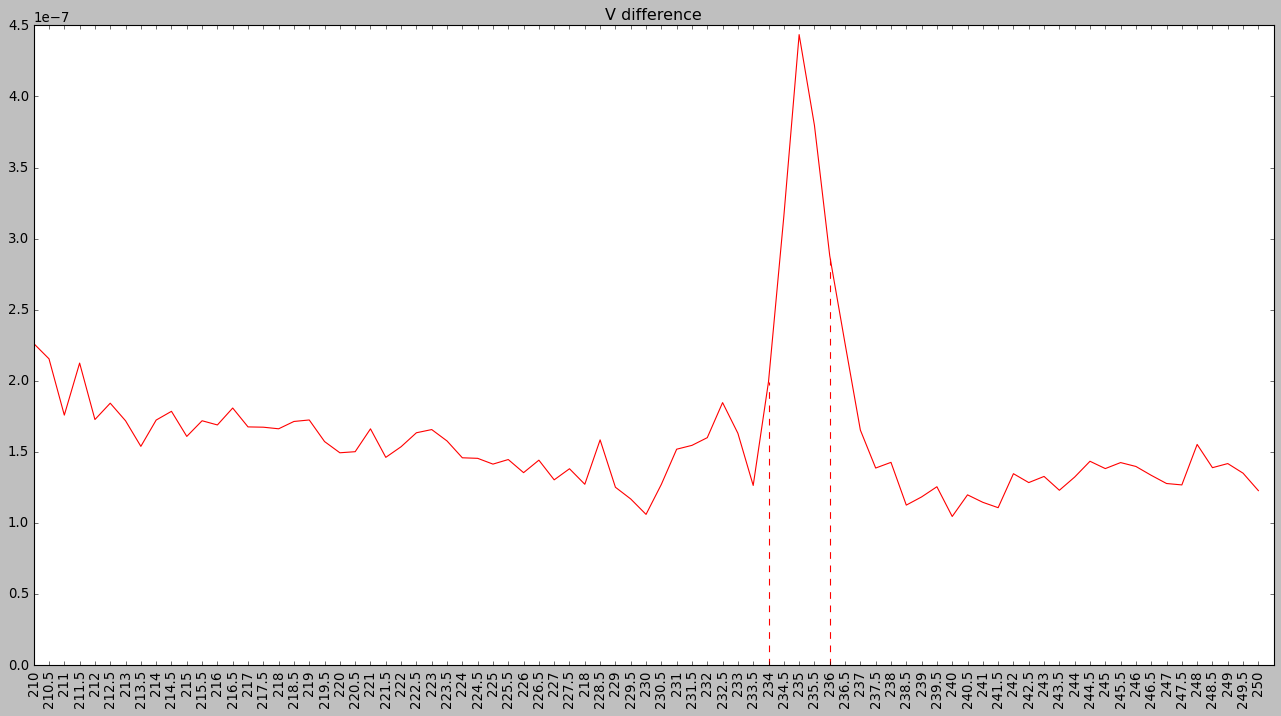

In [9]:
app6 = []# positive
app6_1 = []# negtative
app6_3 = []# postive - negative
app6_2 = []# max abs(n,p)
for i in range(v_disp_210_230_total41_with_a_plie.shape[1]):
#     plt.title("v displacement in the point of "+str(210+(i)*0.5)+'m')
    AA = v_disp_210_230_total41_with_a_plie[:,i]-v_disp_210_230_total41_without_a_plie[:,i]
    app6.append(AA.max()) # postive max Amplitude
    app6_1.append(AA.min()) # negative max Amplitude
    abs_AA = abs(AA)
    app6_3.append(abs_AA.max())# maximum abs Amplitude
app6_2 = np.array(app6) - np.array(app6_1) # postive - negative

app5 = []# positive
app5_1 = []# negtative
app5_3 = []# postive - negative
app5_2 = []# max abs(n,p)
for i in range(v_disp_210_230_total41_with_a_plie.shape[1]):
#     plt.title("v displacement in the point of "+str(210+(i)*0.5)+'m')
    AA = v_disp_210_230_total41_without_a_plie[:,i]
    app5.append(AA.max()) # postive max Amplitude
    app5_1.append(AA.min()) # negative max Amplitude
    abs_AA = abs(AA)
    app5_3.append(abs_AA.max())# maximum abs Amplitude
app5_2 = np.array(app5) - np.array(app5_1) # postive - negative


plt.figure(figsize=(20, 10))
plt.title("V difference")
app = app6_2# max abs(n,p)
# app = app/np.array(app5_2)
plt.plot(abs(app),c = 'r',label = "with a pile")# plie
plt.vlines((Left_edge-210)/0.5, 0, abs(app)[int((Left_edge-210)/0.5)],colors = "r", linestyles = "dashed")
plt.vlines((Right_edge-210)/0.5, 0,abs(app)[int((Right_edge-210)/0.5)],colors = "r", linestyles = "dashed")
x = np.linspace(0, N_group, num=N_group+1)
label = ['210','210.5','211','211.5','212','212.5','213','213.5','214','214.5',
          '215','215.5','216','216.5','217','217.5','218','218.5','219','219.5',
          '220','220.5','221','221.5','222','222.5','223','223.5','224','224.5',
          '225','225.5','226','226.5','227','227.5','218','228.5','229','229.5',
          '230','230.5','231','231.5','232','232.5','233','233.5','234','234.5',
          '235','235.5','236','236.5','237','237.5','238','238.5','239','239.5',
          '240','240.5','241','241.5','242','242.5','243','243.5','244','244.5',
          '245','245.5','246','246.5','247','247.5','248','248.5','249','249.5',
          '250']
plt.xticks(x,label,rotation='vertical')
plt.show()

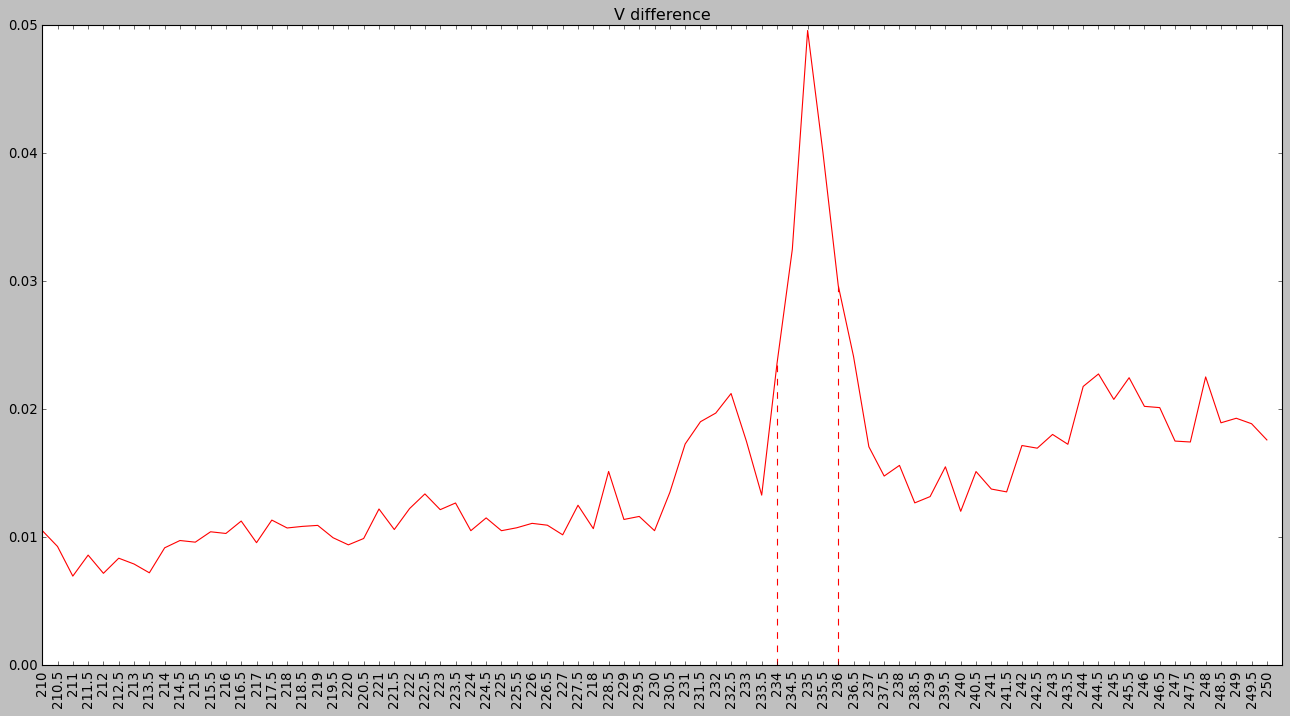

In [10]:
app7 = []# positive
app7_1 = []# negtative
app7_3 = []# max abs(n,p)
app7_2 = []# postive - negative
for i in range(v_disp_210_230_total41_with_a_plie.shape[1]):
#     plt.title("v displacement in the point of "+str(210+(i)*0.5)+'m')
    AA = v_disp_210_230_total41_with_a_plie[:,i]-v_disp_210_230_total41_without_a_plie[:,i]
    app7.append(AA.max()) # postive max Amplitude
    app7_1.append(AA.min()) # negative max Amplitude
    abs_AA = abs(AA)
    app7_3.append(abs_AA.max())# maximum abs Amplitude
app7_2 = np.array(app7) - np.array(app7_1) # postive - negative


plt.figure(figsize=(20, 10))
plt.title("V difference")
app = app7_3/np.array(app5_3)# max abs(n,p)
plt.plot(np.abs(app),c = 'r',label = "with a pile")# plie
plt.vlines((Left_edge-210)/0.5, 0, np.abs(app)[int((Left_edge-210)/0.5)],colors = "r", linestyles = "dashed")
plt.vlines((Right_edge-210)/0.5, 0,np.abs(app)[int((Right_edge-210)/0.5)],colors = "r", linestyles = "dashed")
x = np.linspace(0, N_group, num=N_group+1)
label = ['210','210.5','211','211.5','212','212.5','213','213.5','214','214.5',
          '215','215.5','216','216.5','217','217.5','218','218.5','219','219.5',
          '220','220.5','221','221.5','222','222.5','223','223.5','224','224.5',
          '225','225.5','226','226.5','227','227.5','218','228.5','229','229.5',
          '230','230.5','231','231.5','232','232.5','233','233.5','234','234.5',
          '235','235.5','236','236.5','237','237.5','238','238.5','239','239.5',
          '240','240.5','241','241.5','242','242.5','243','243.5','244','244.5',
          '245','245.5','246','246.5','247','247.5','248','248.5','249','249.5',
          '250']
plt.xticks(x,label,rotation='vertical')
plt.show()

<Figure size 1600x800 with 0 Axes>

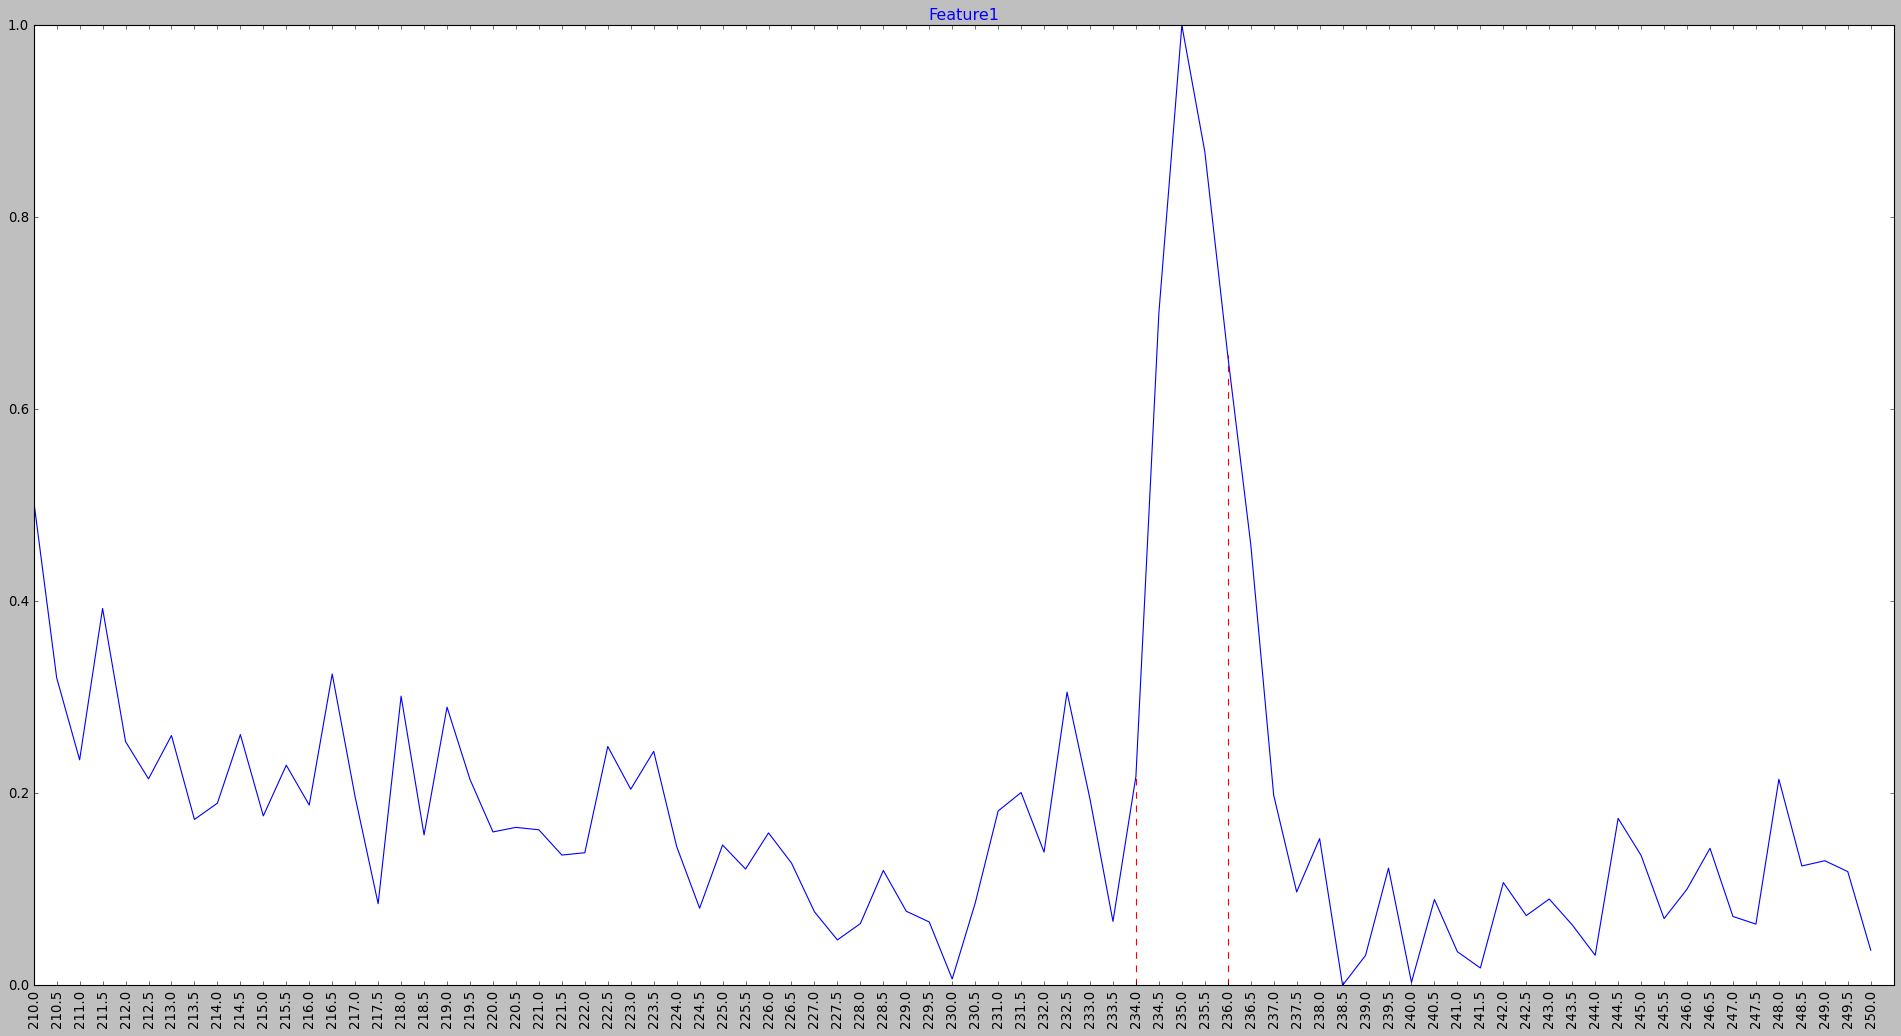

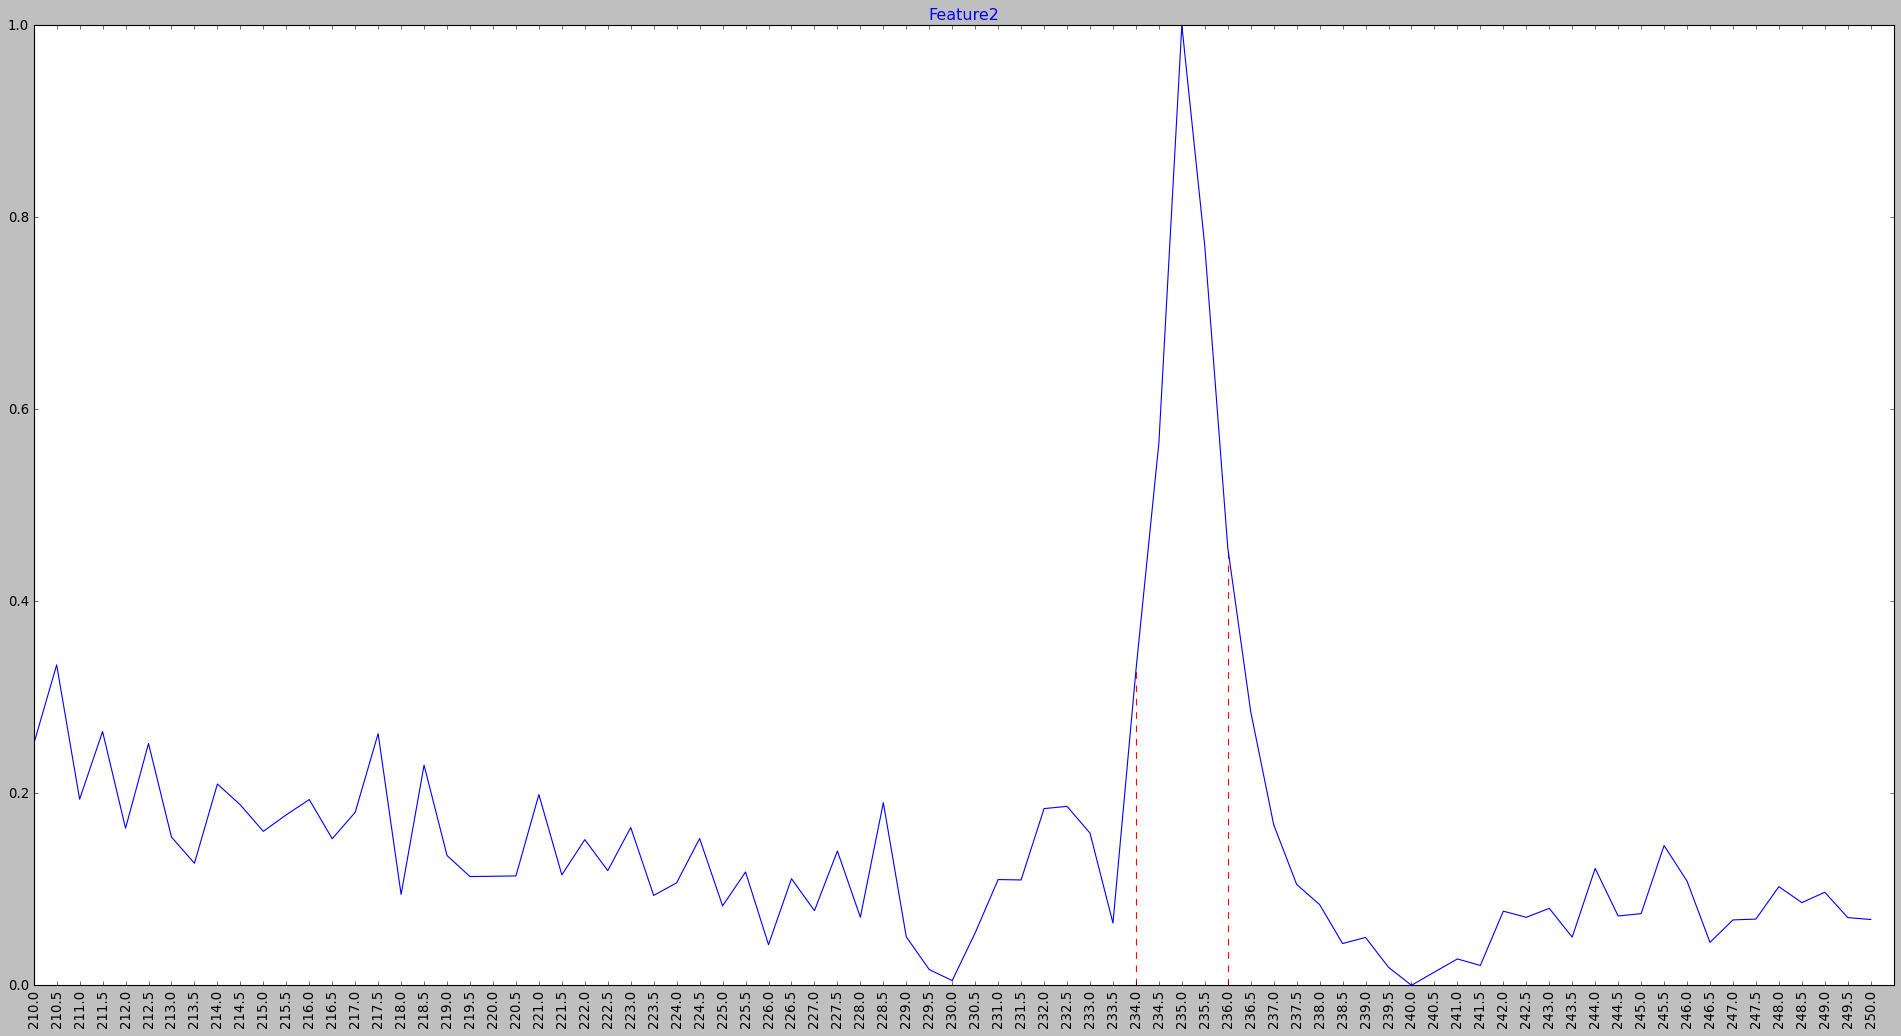

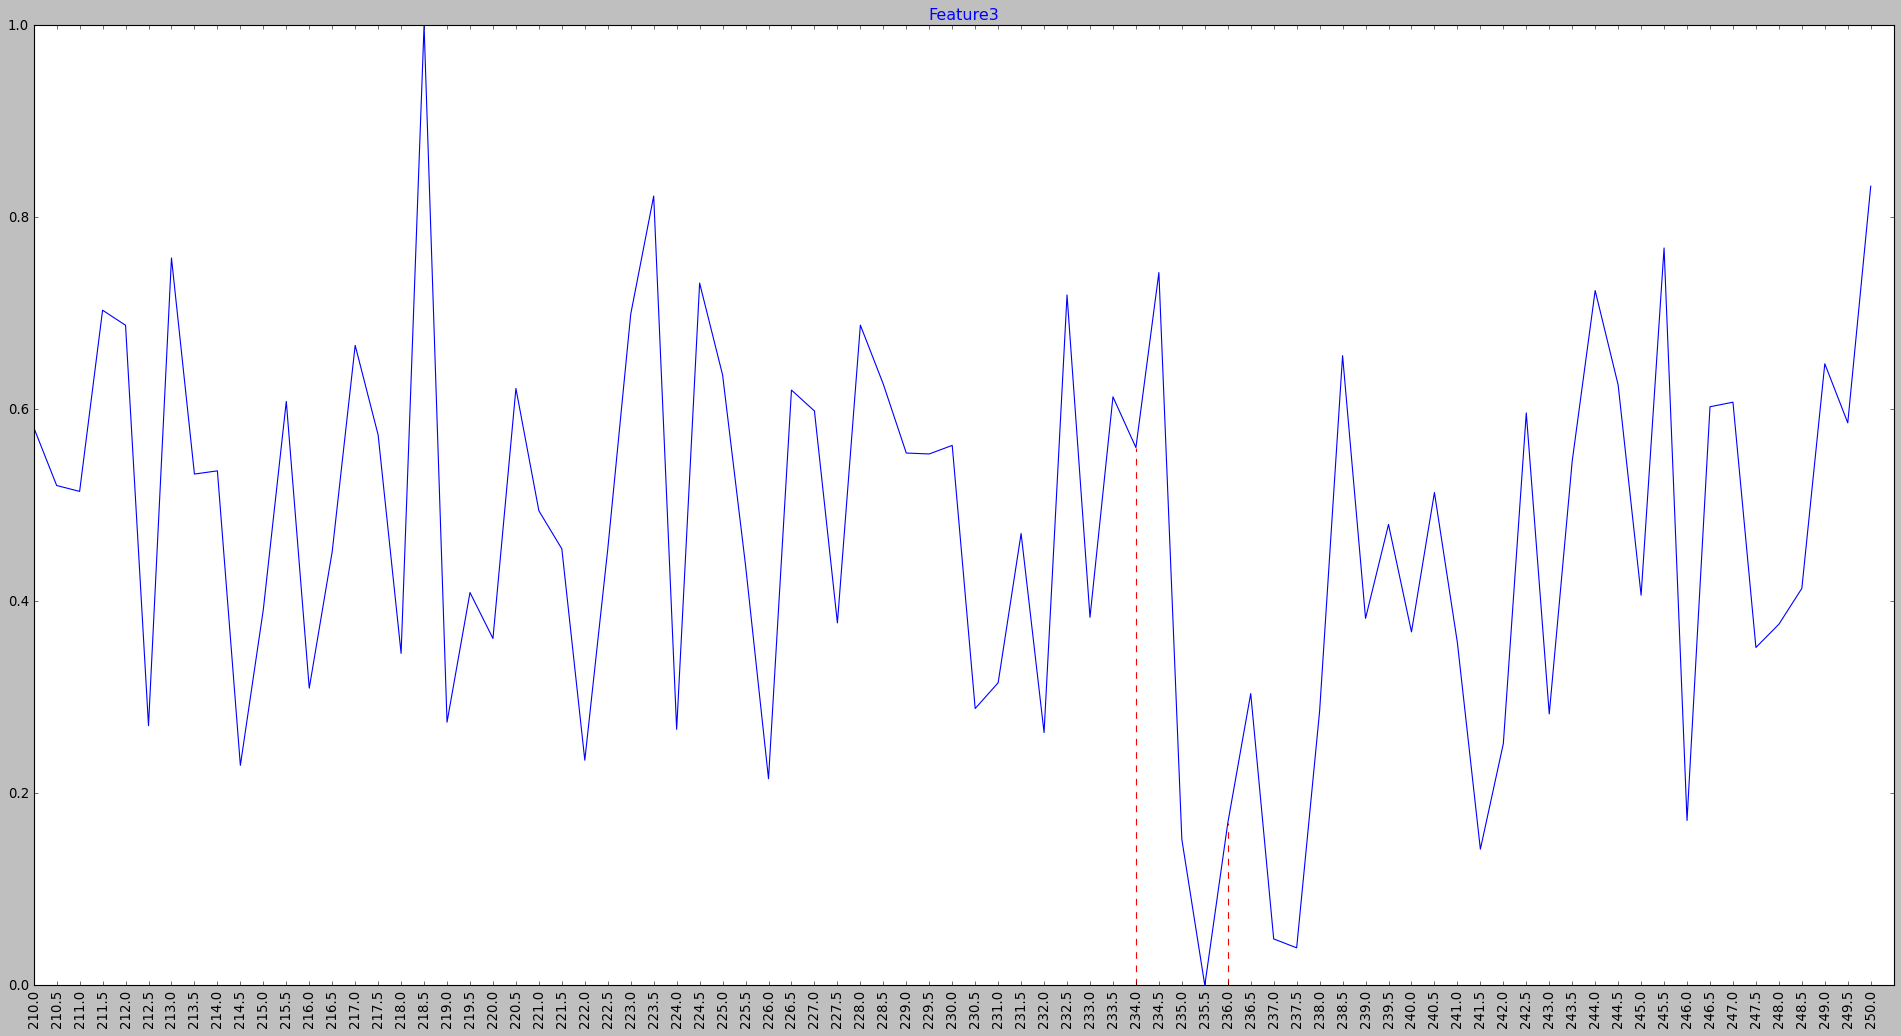

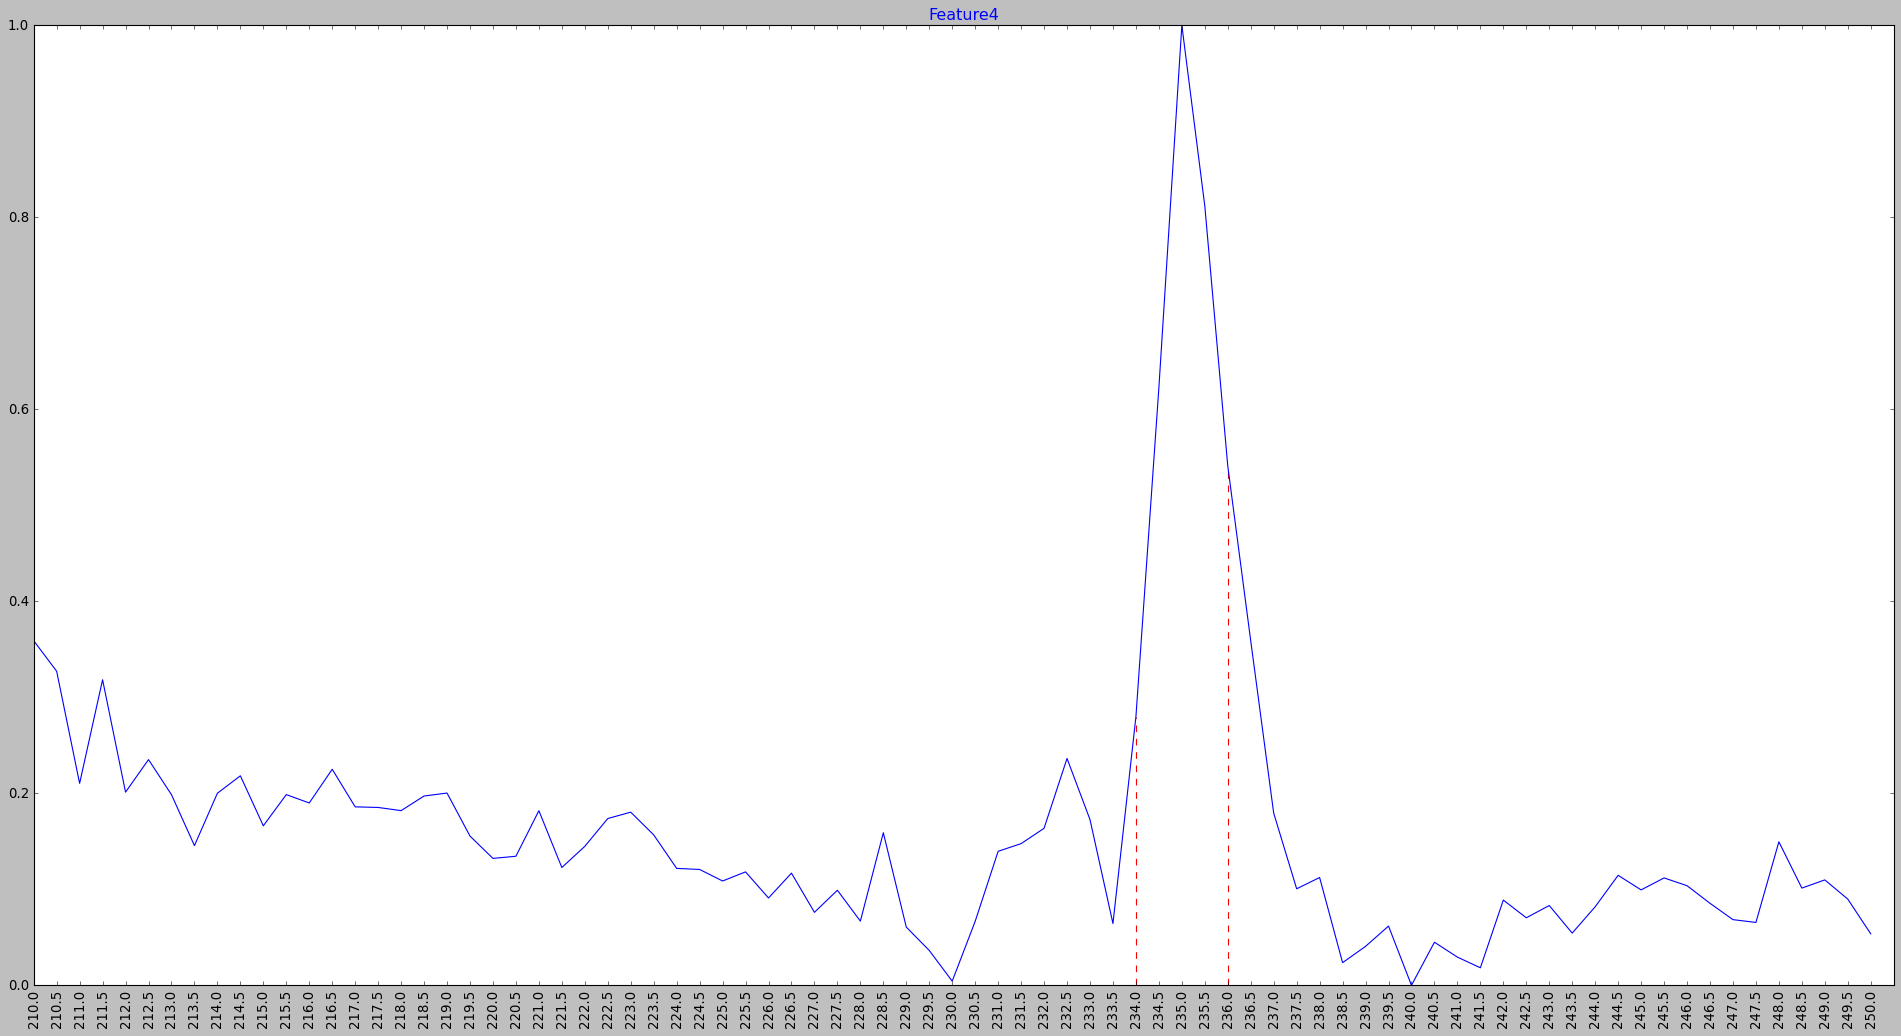

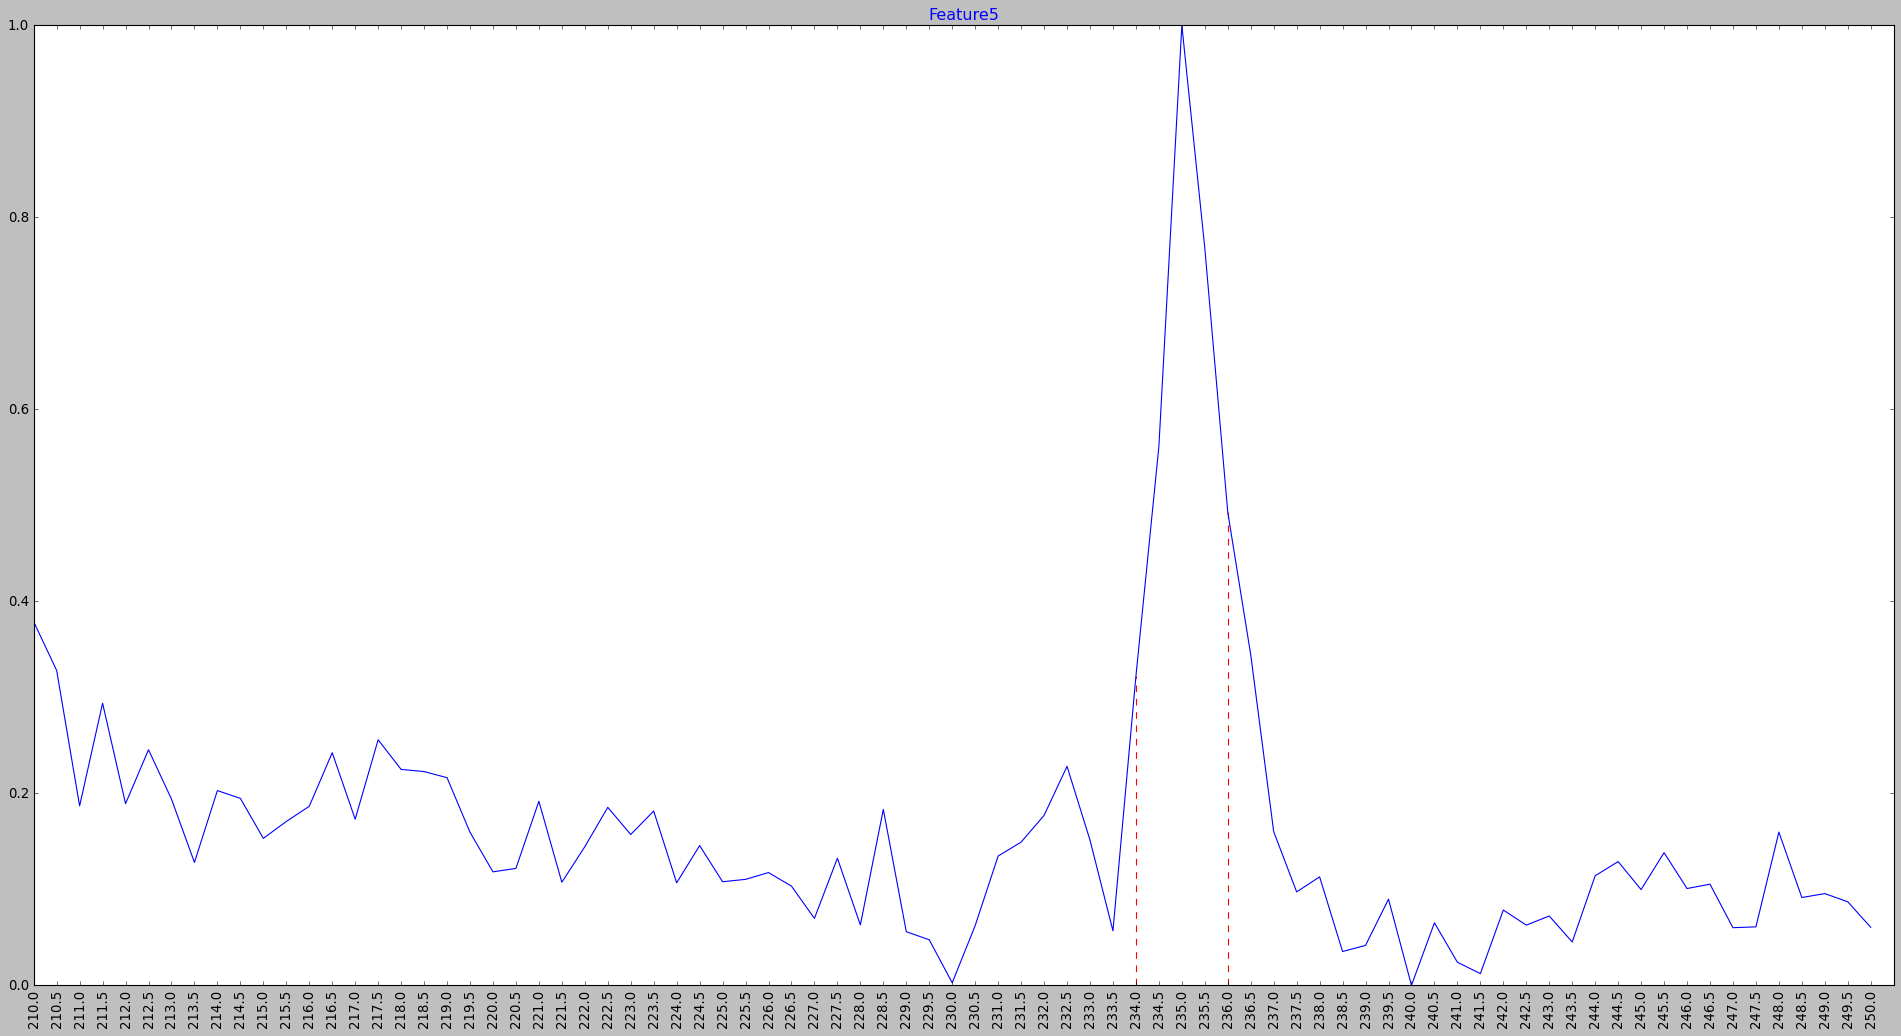

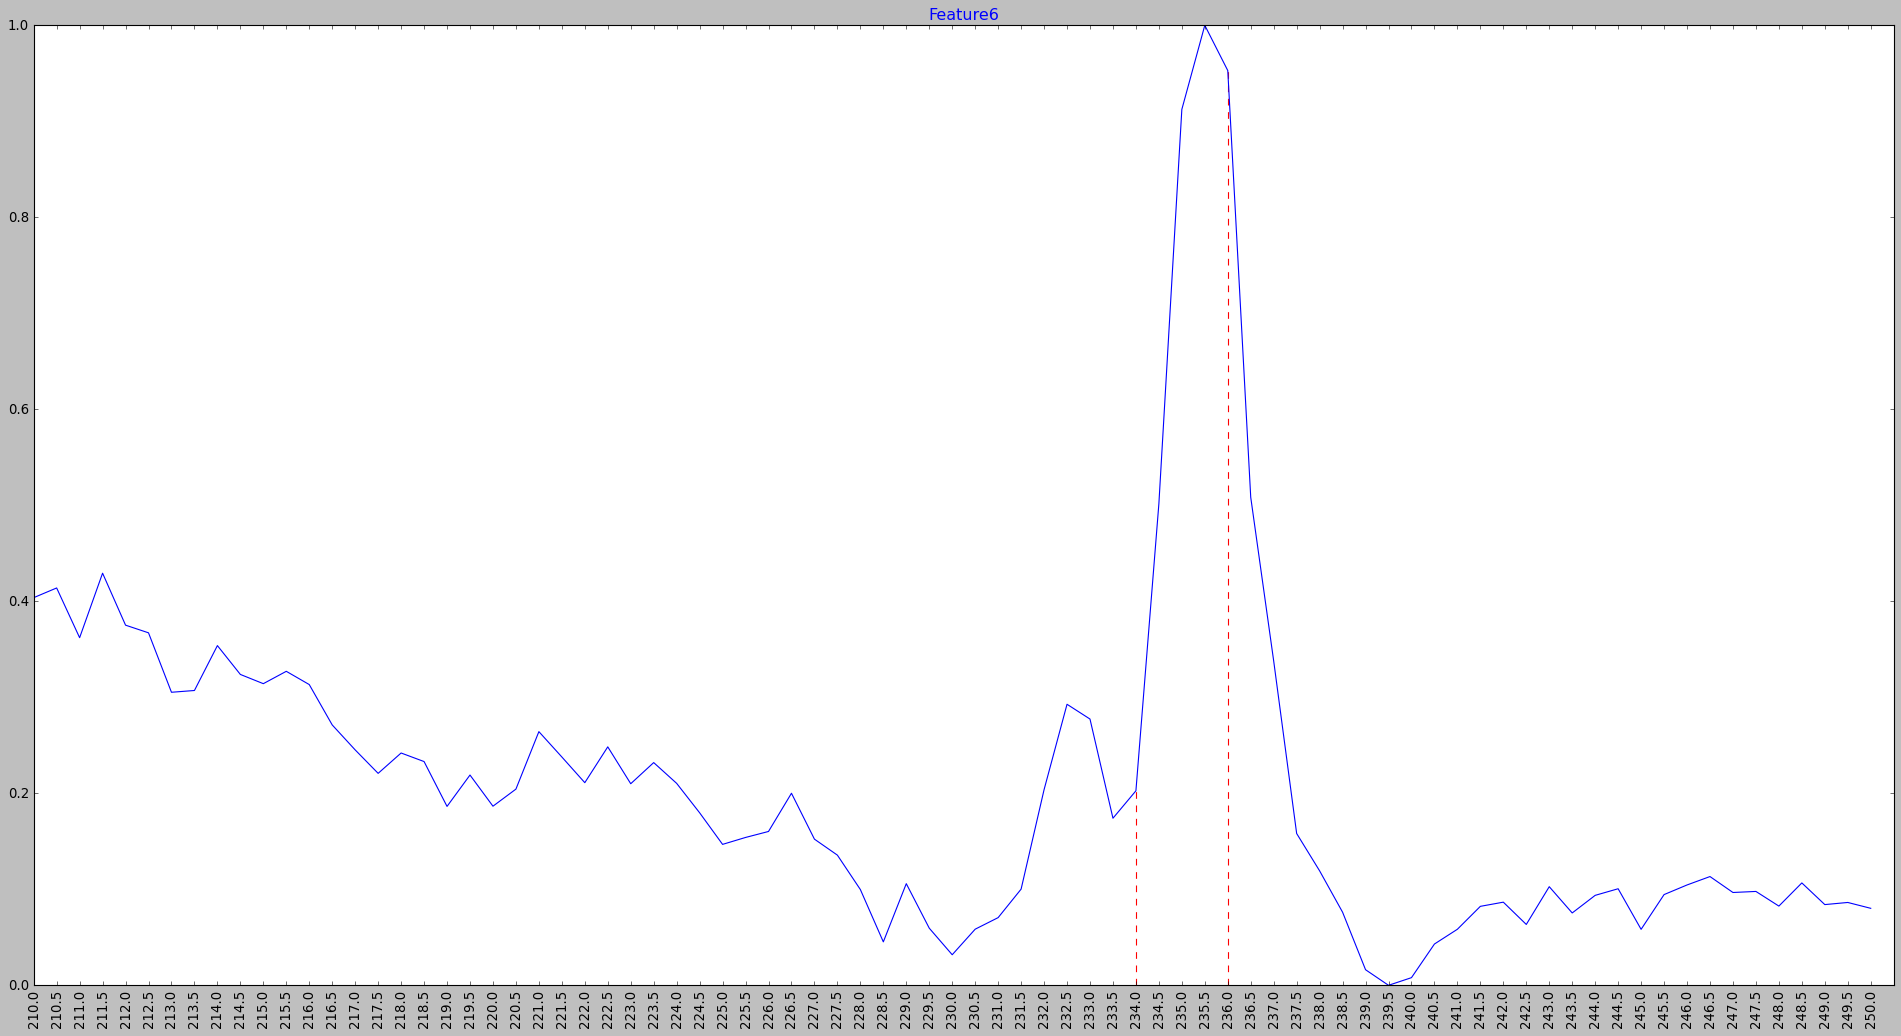

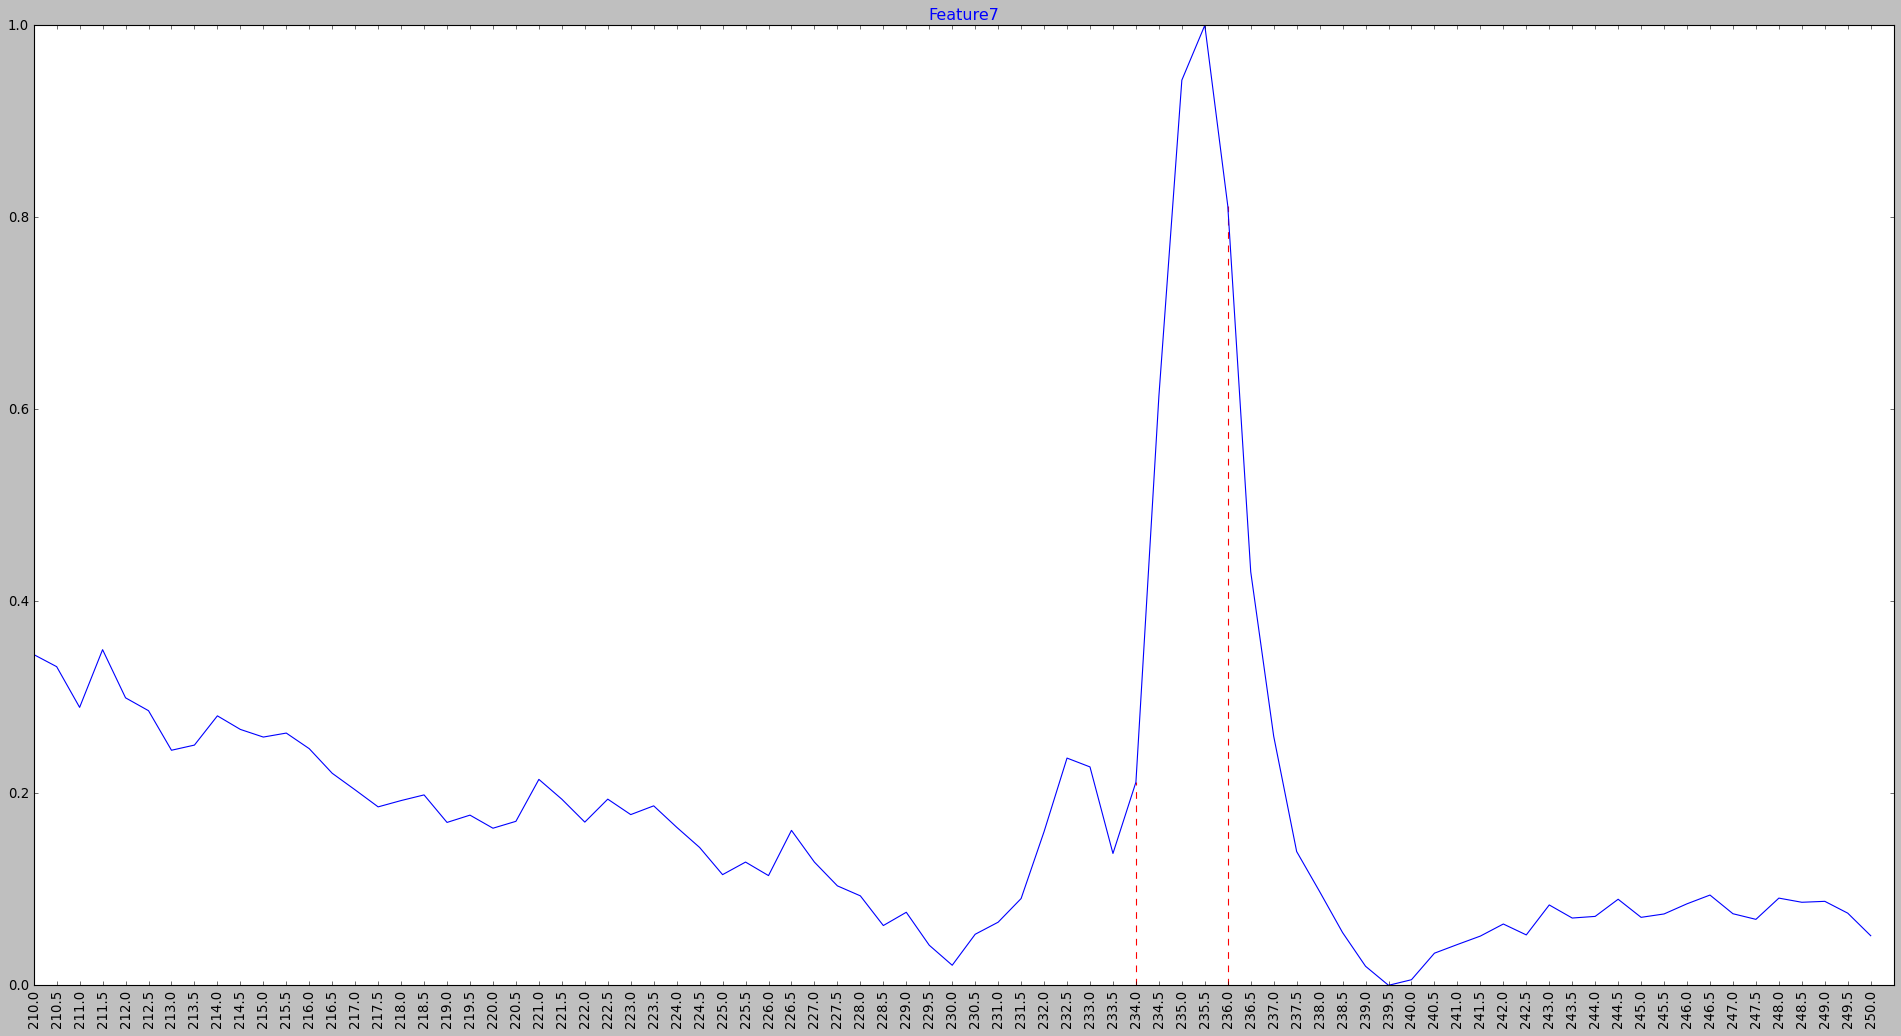

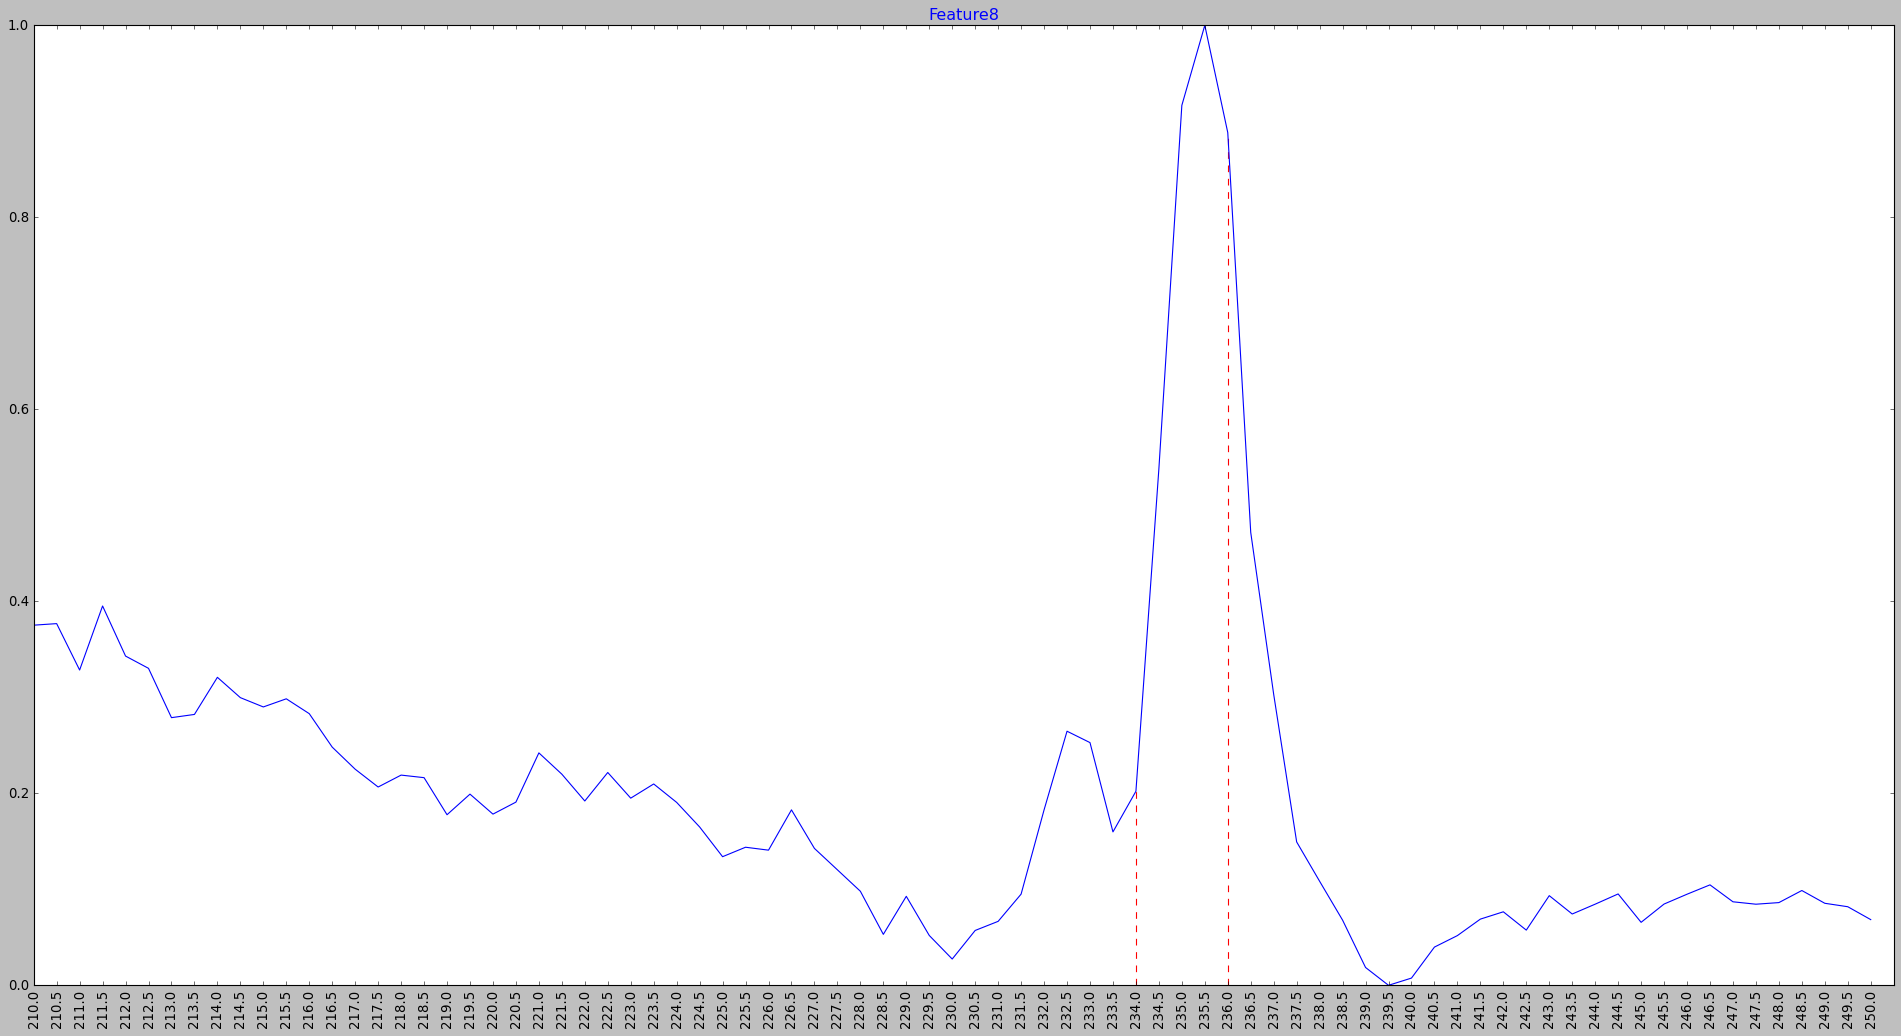

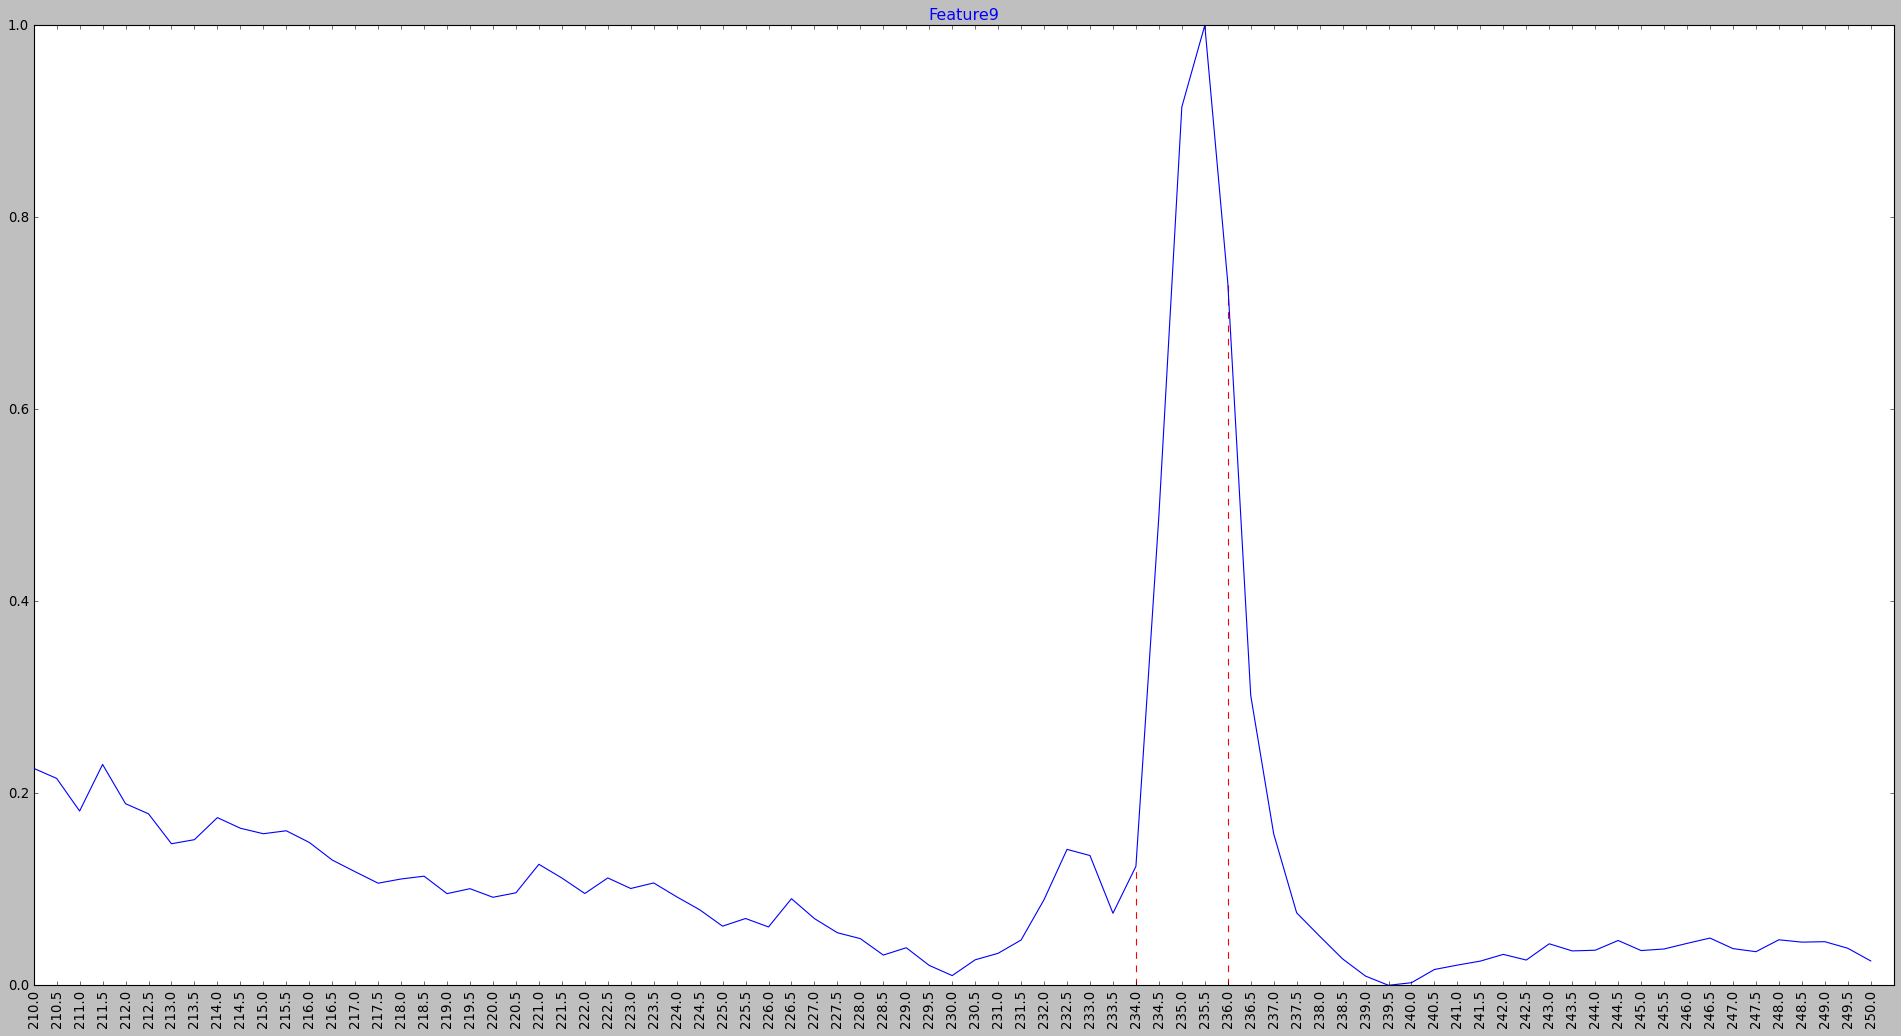

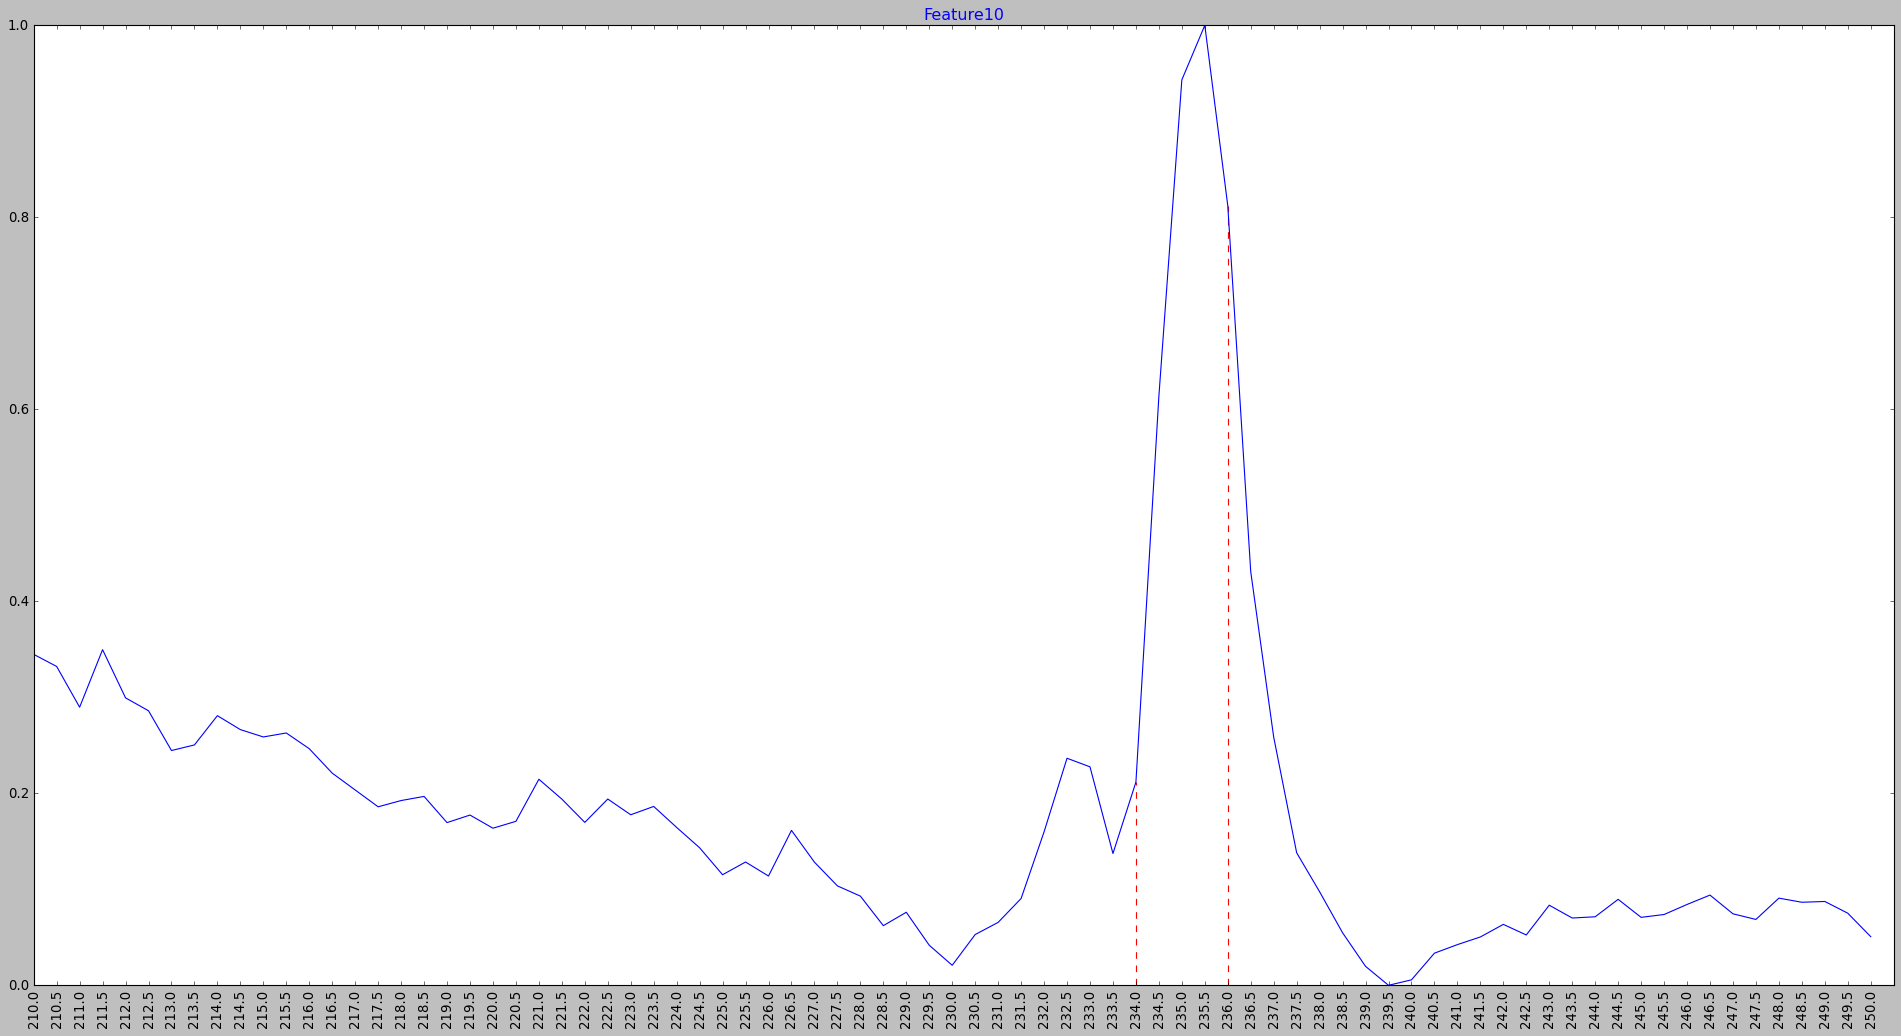

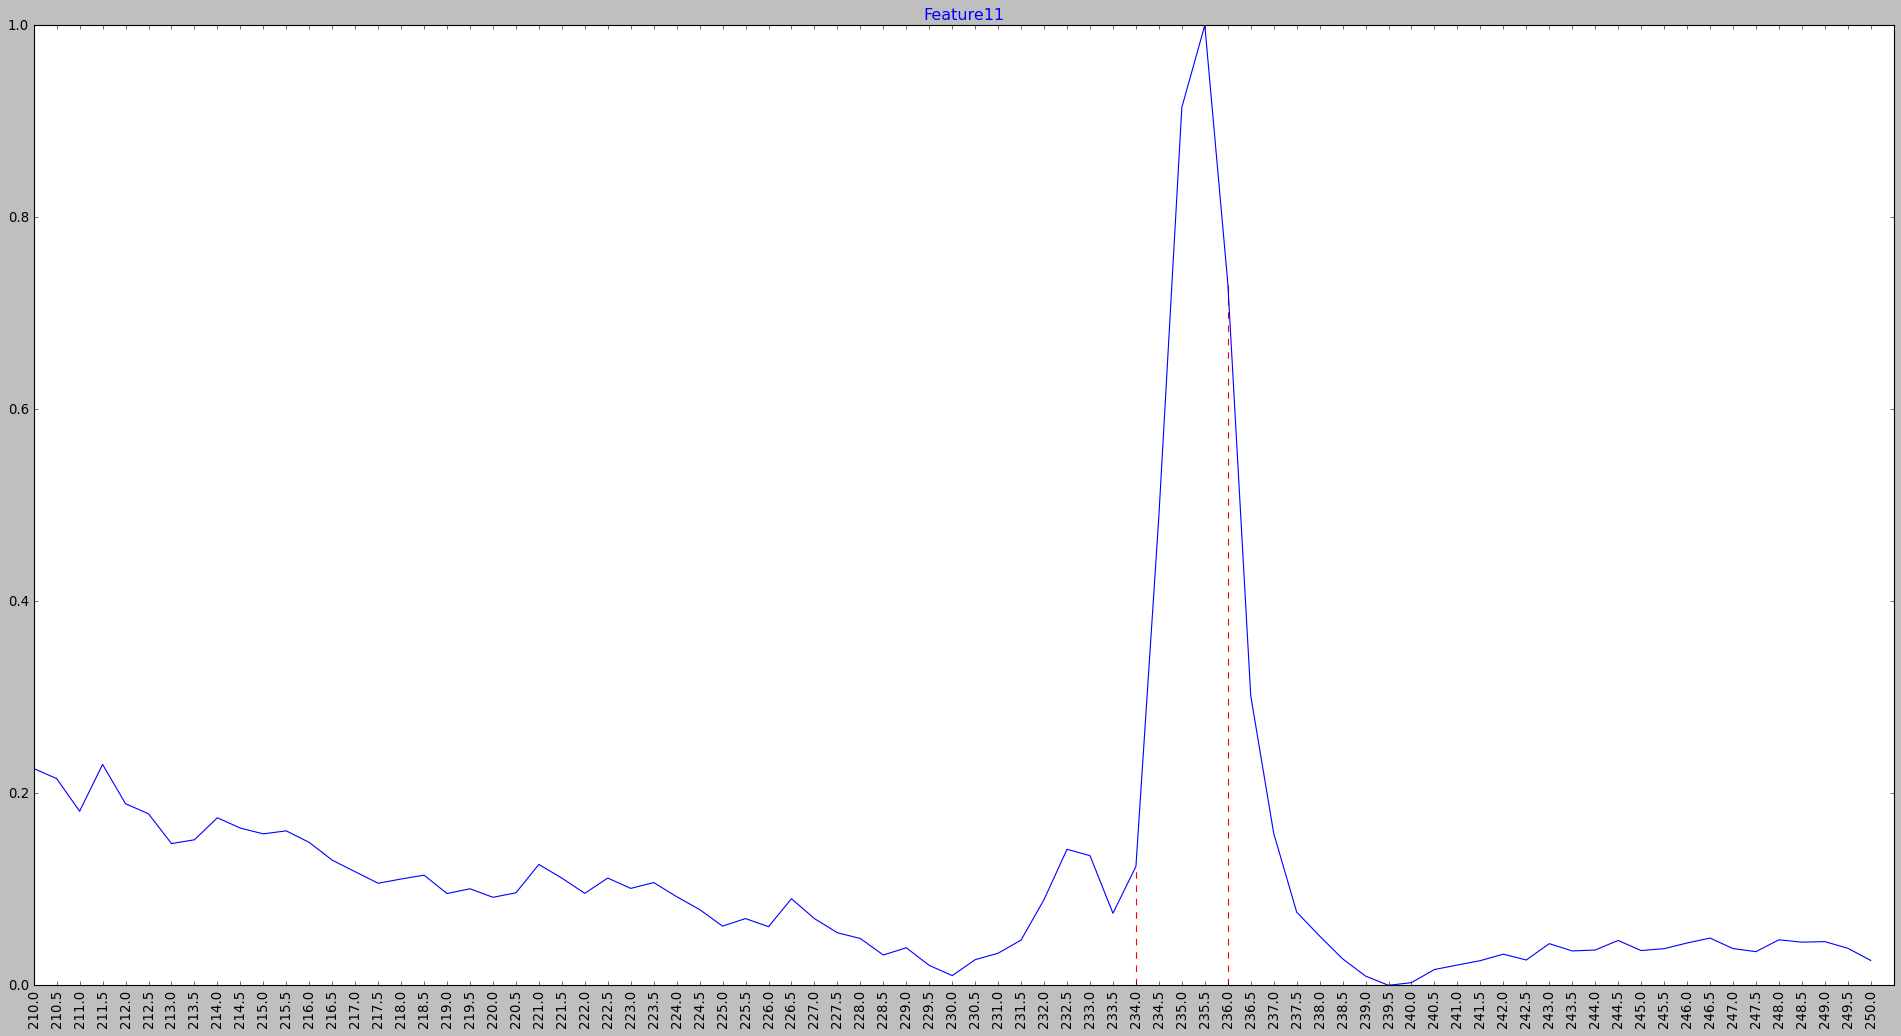

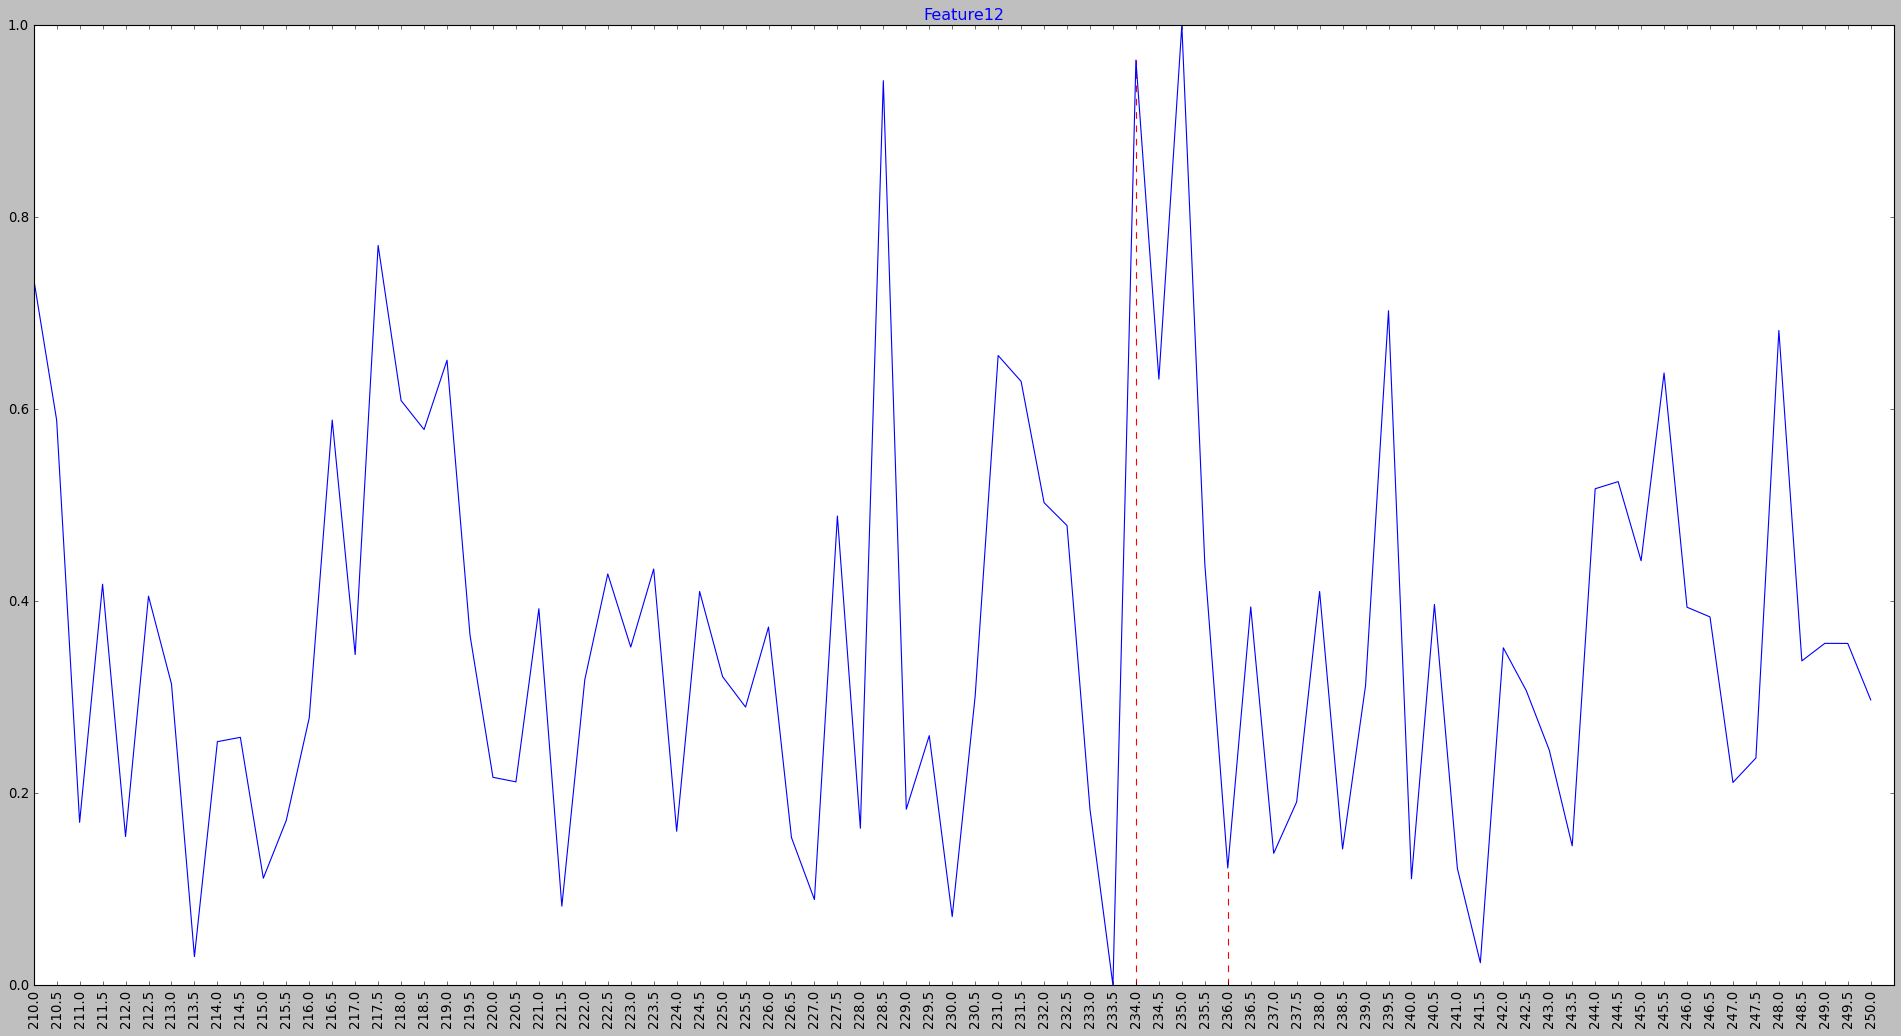

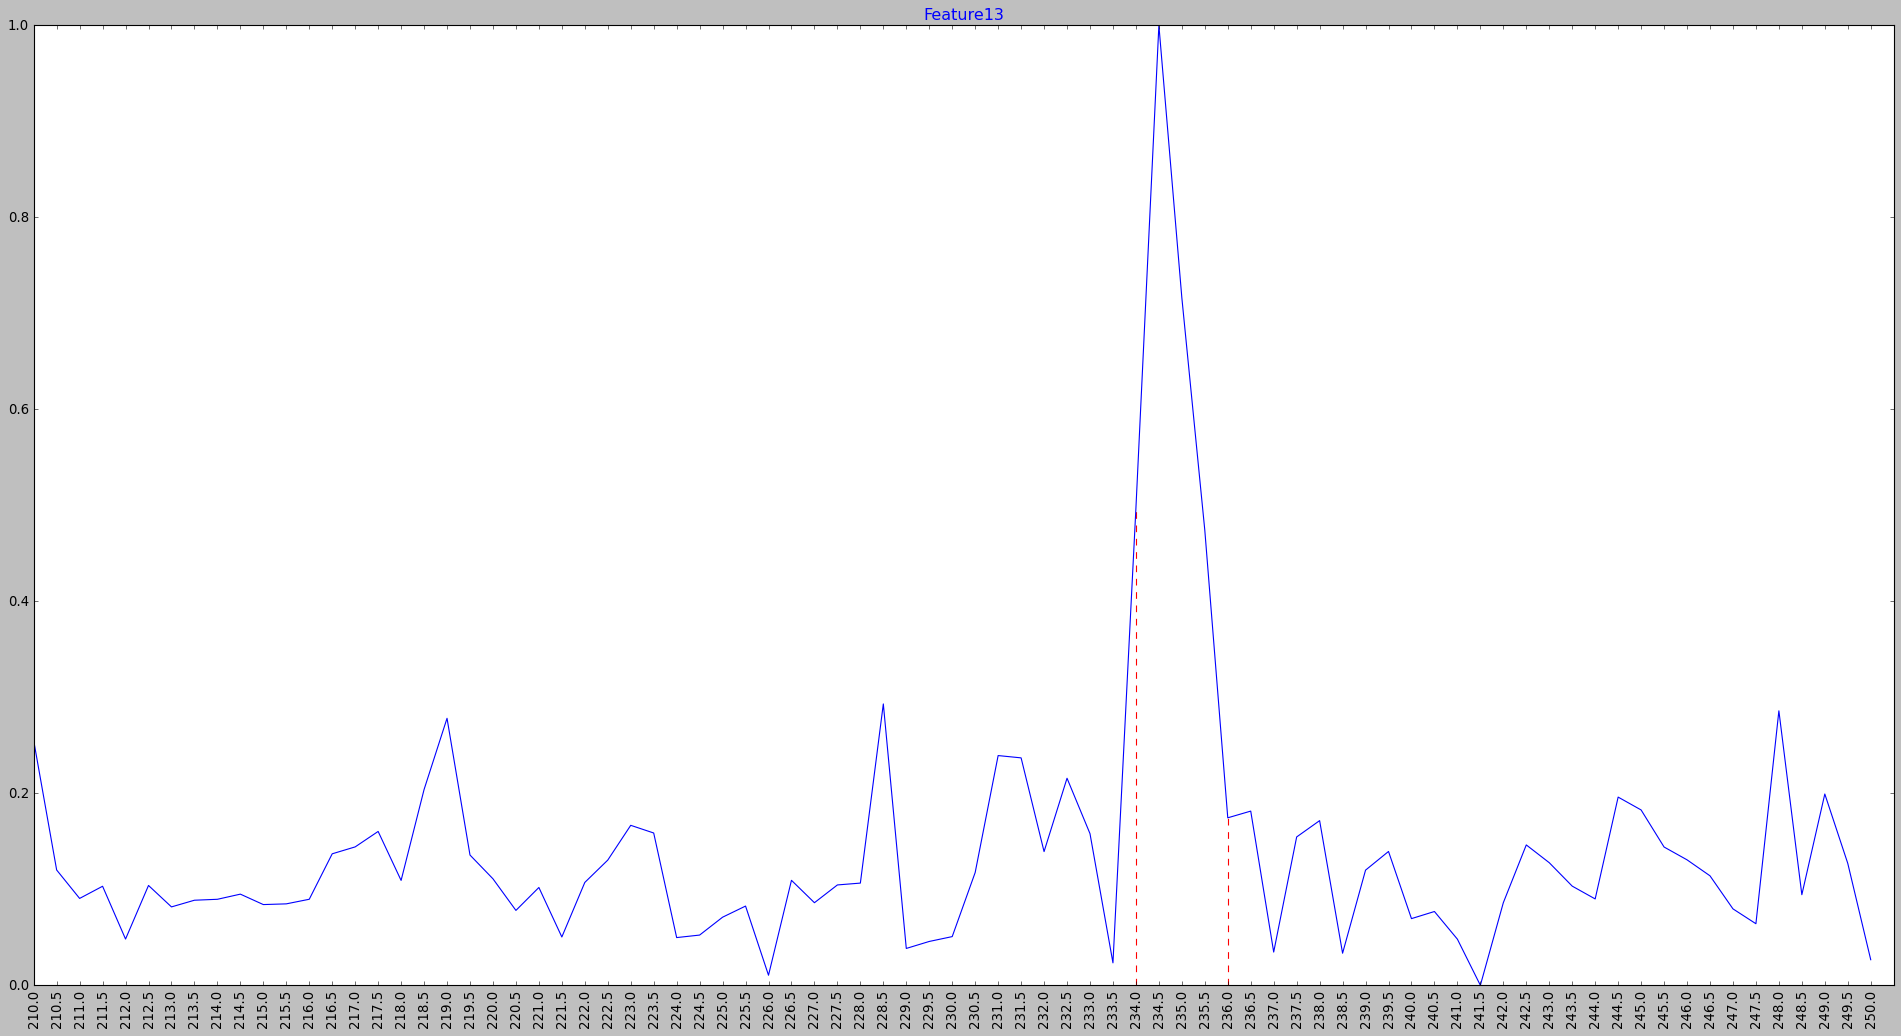

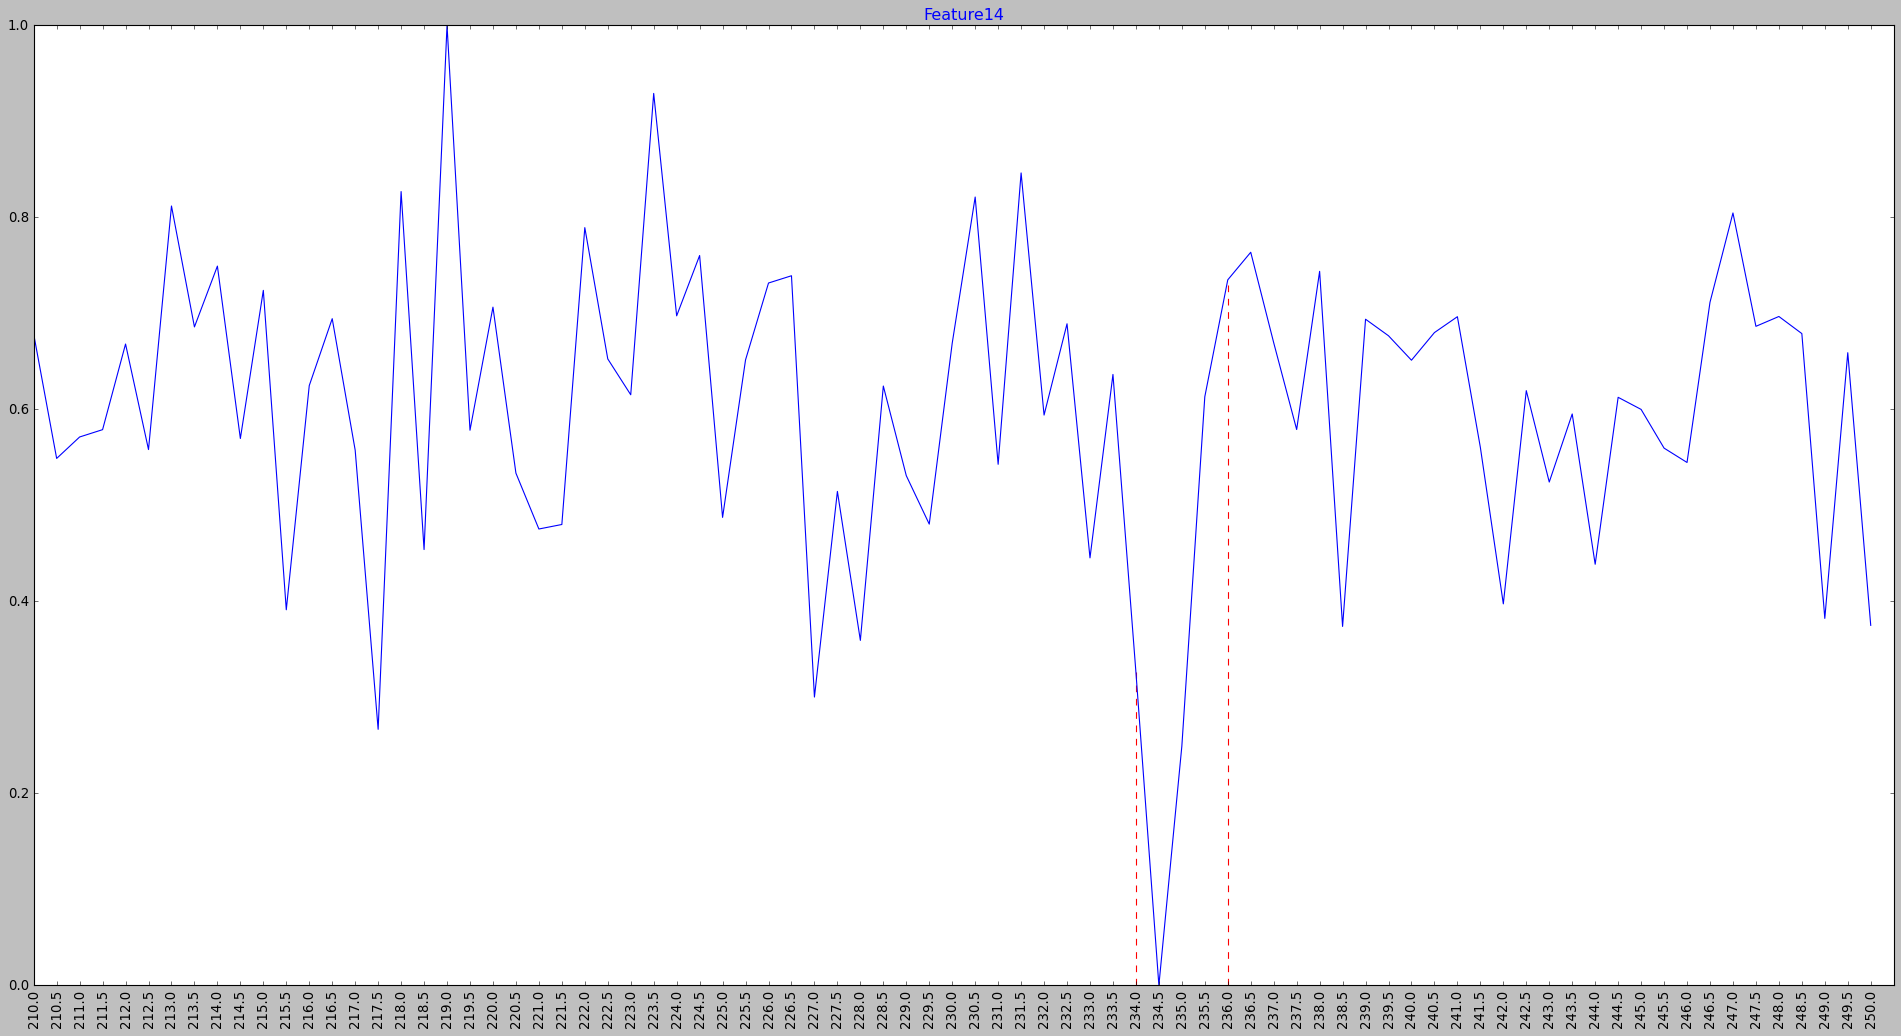

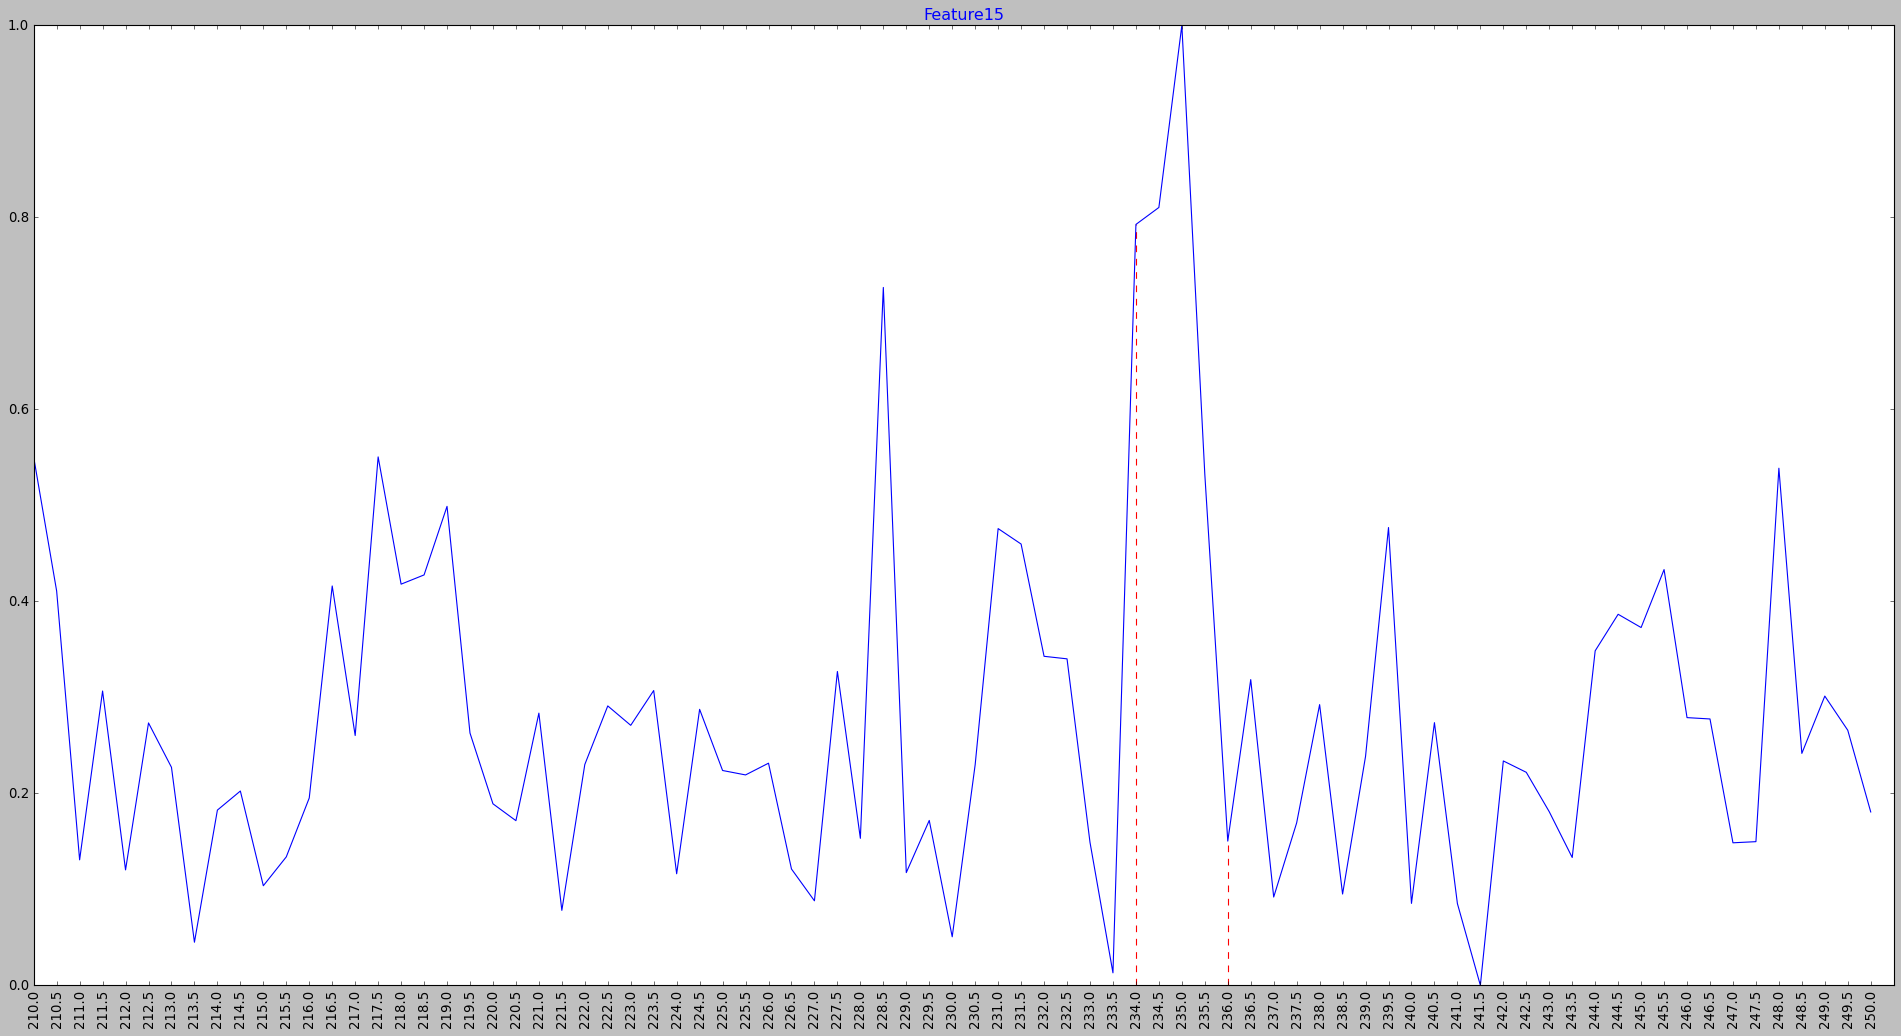

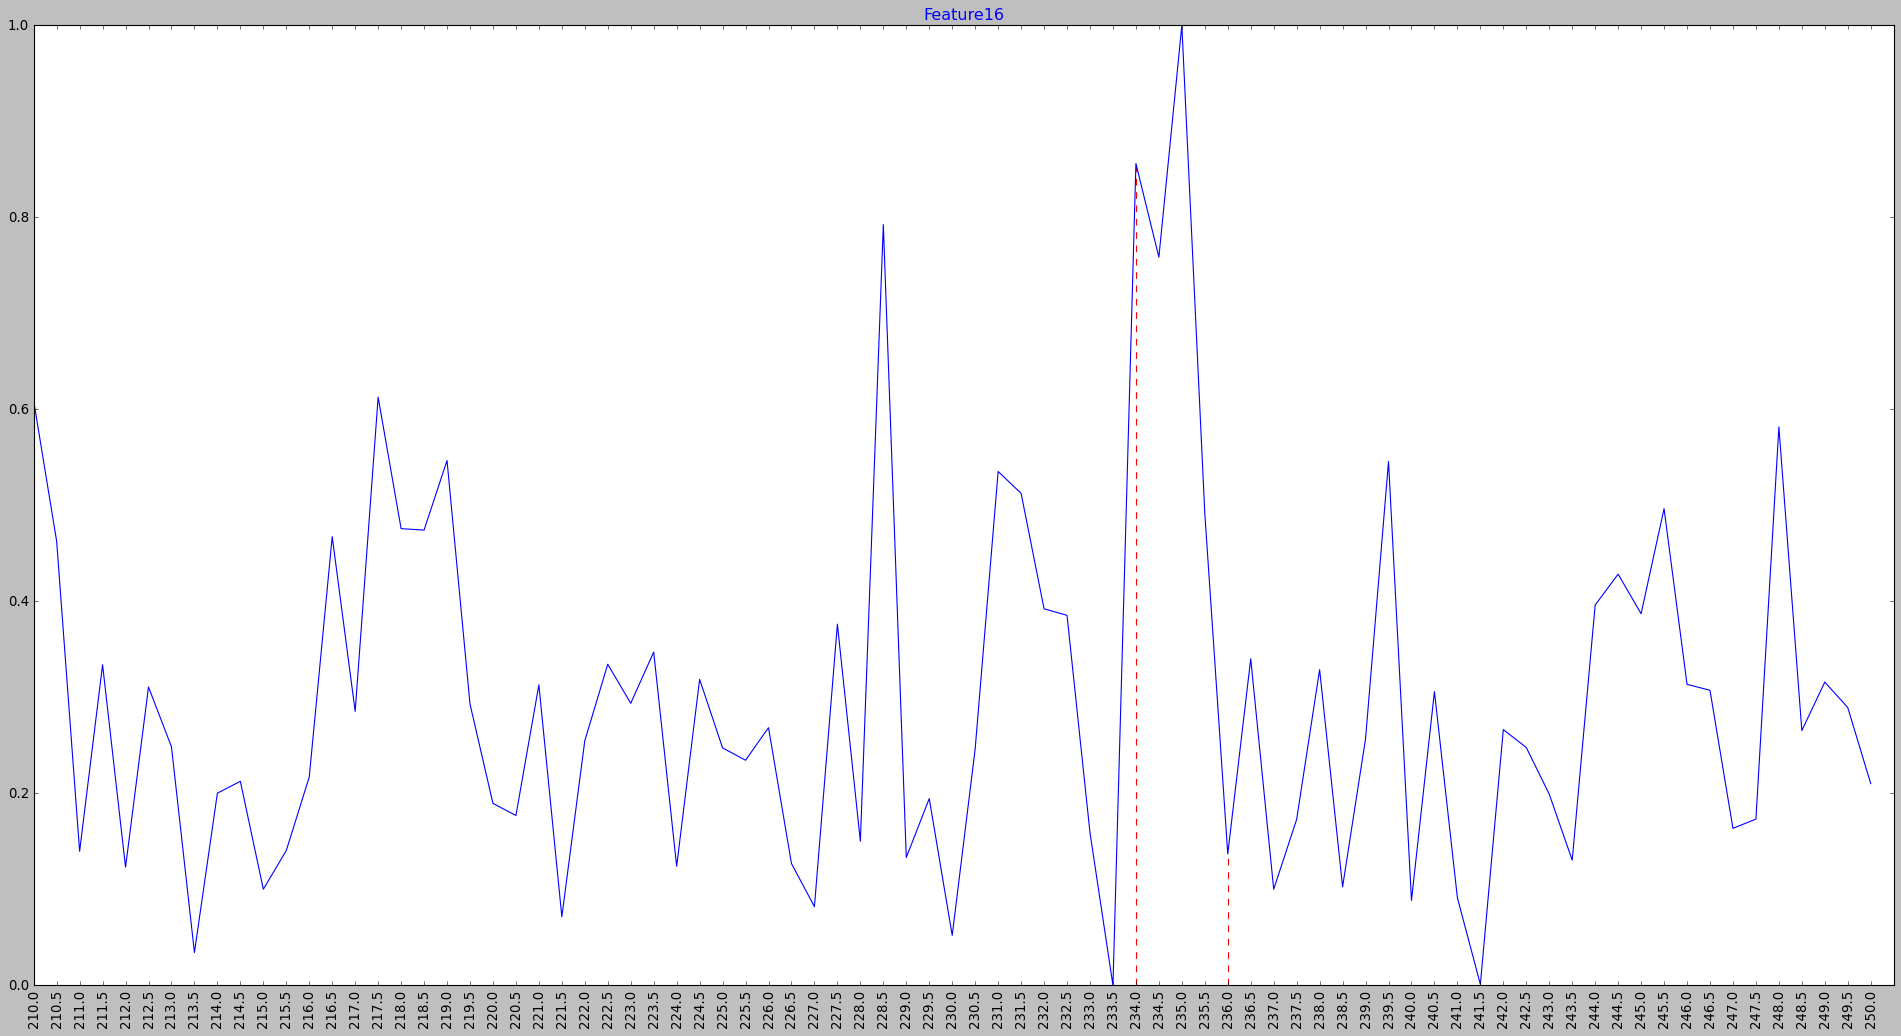

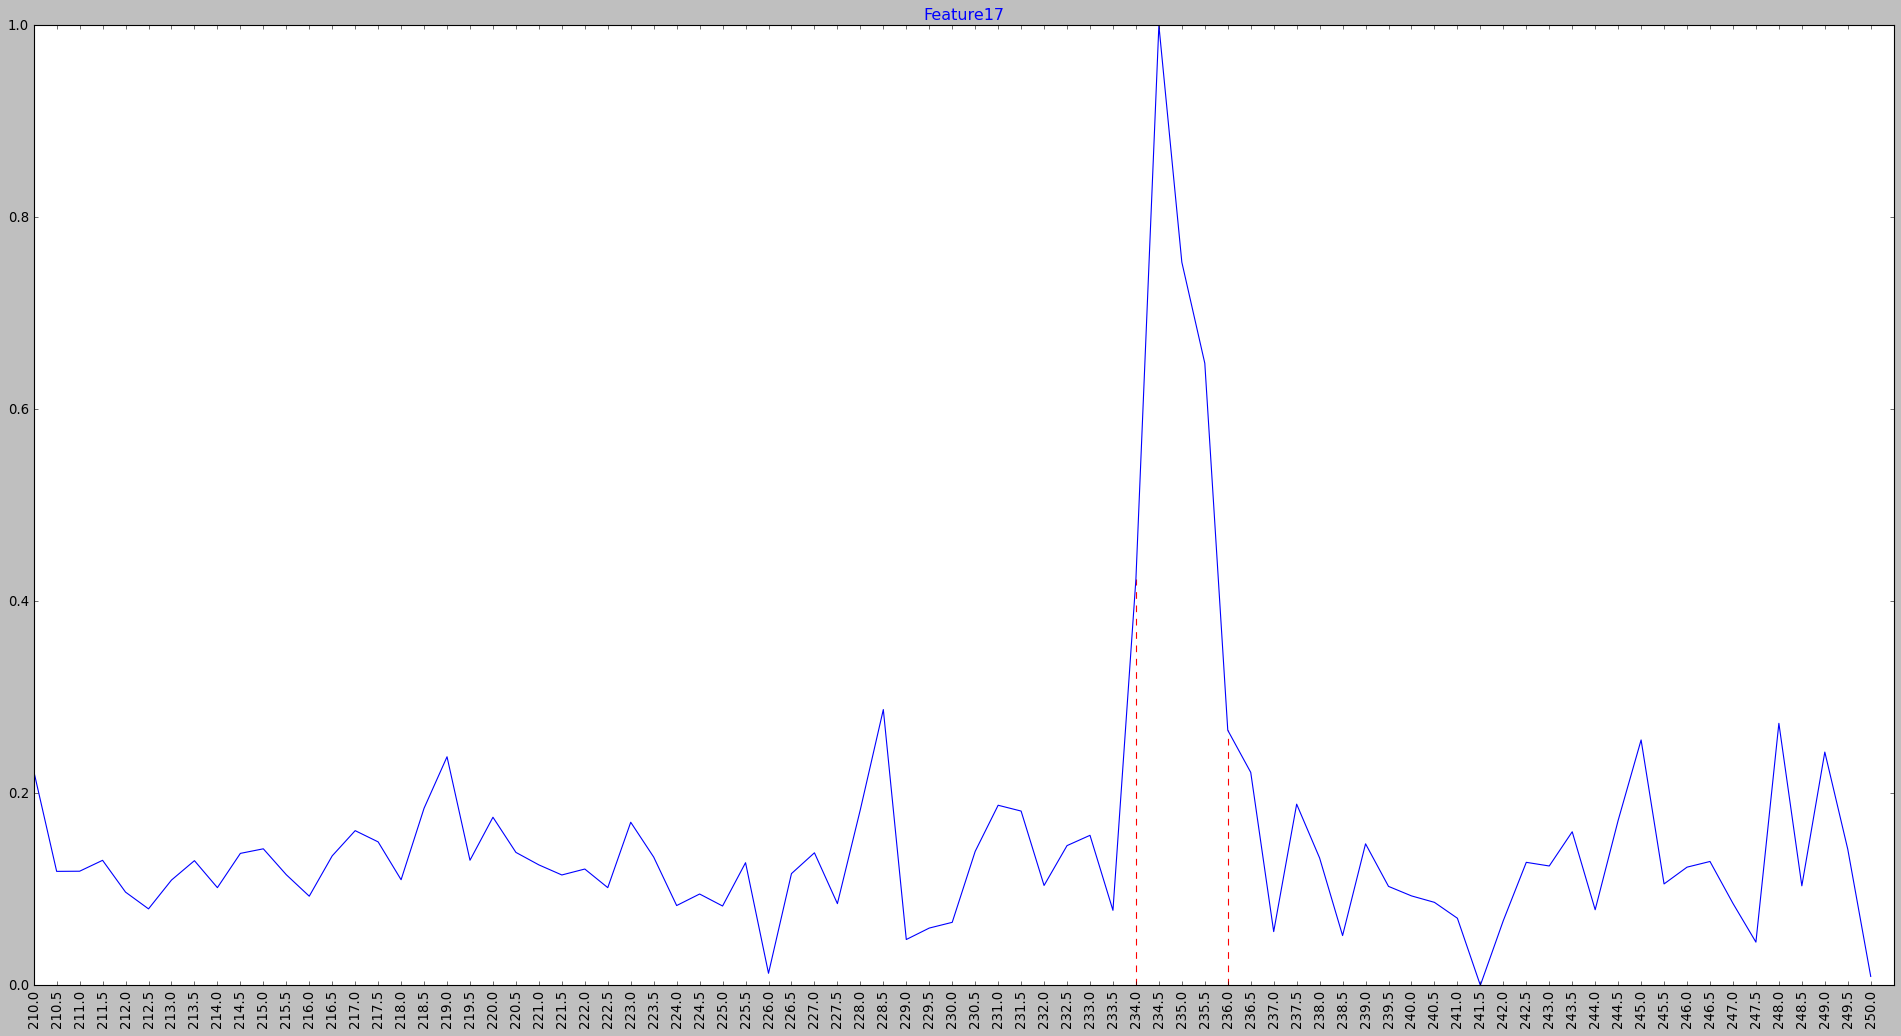

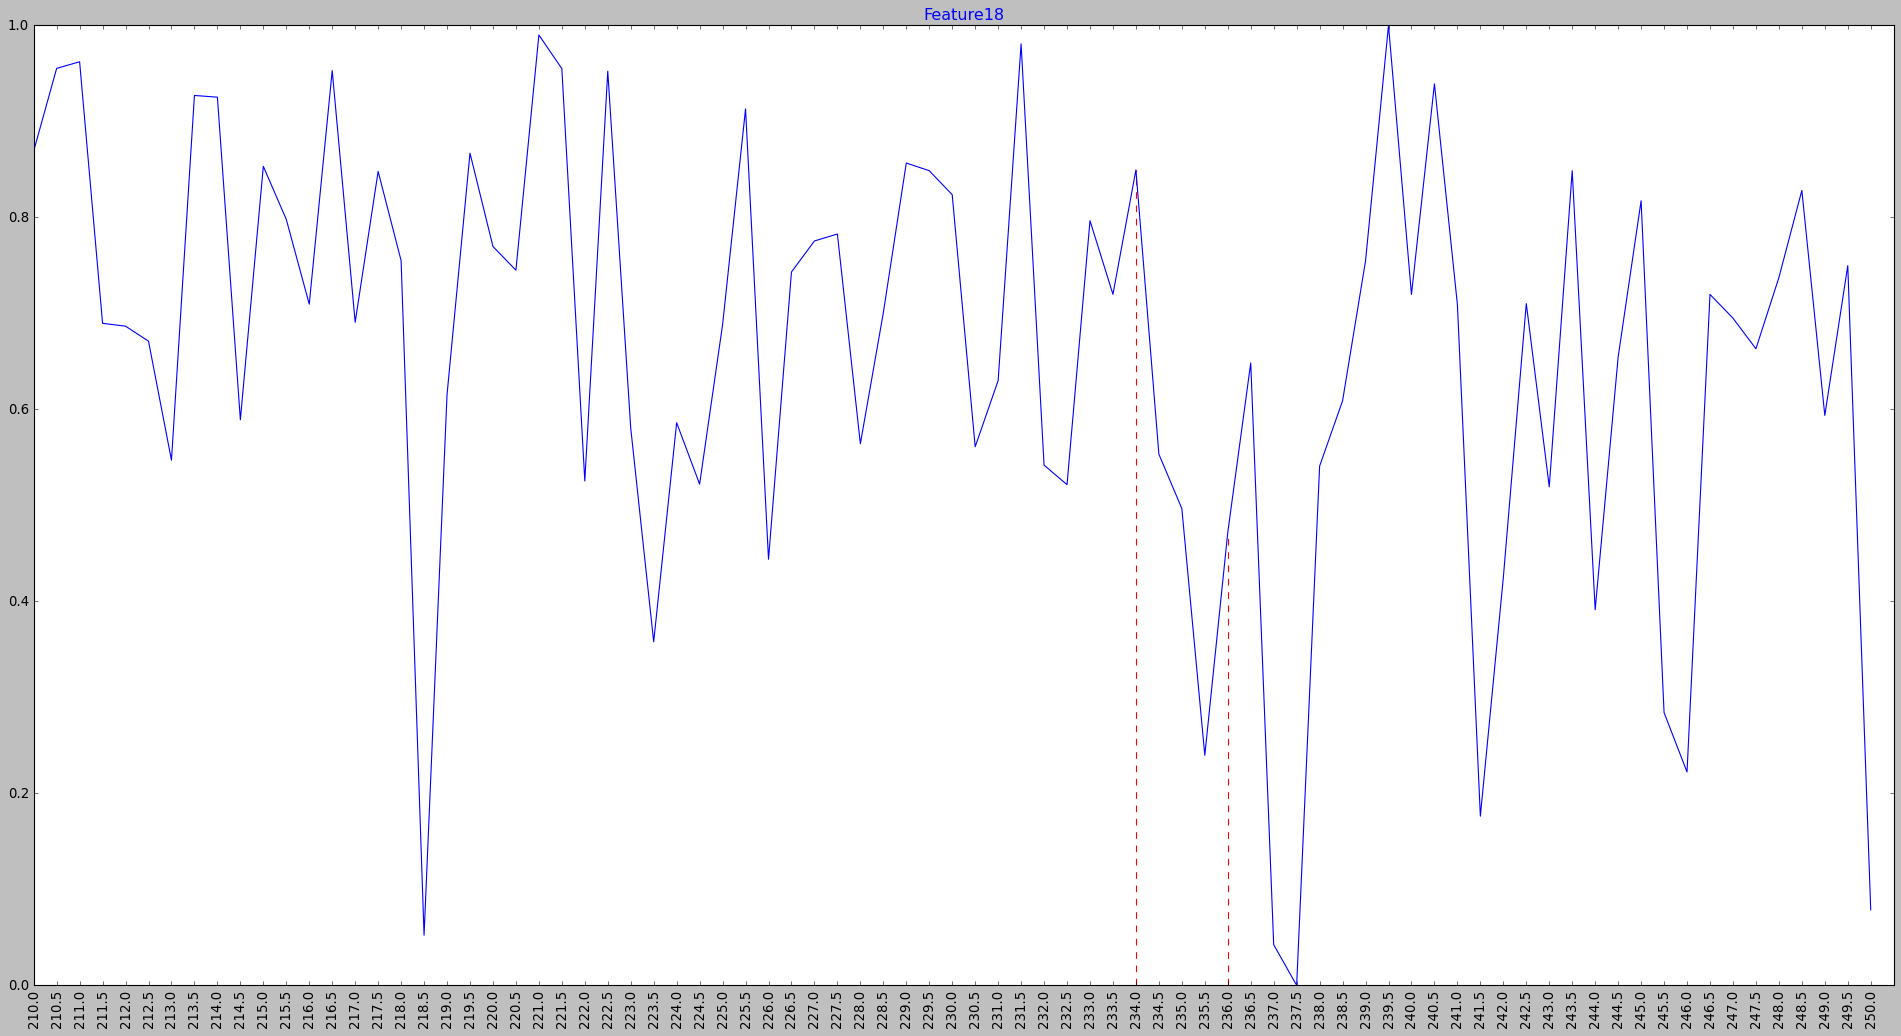

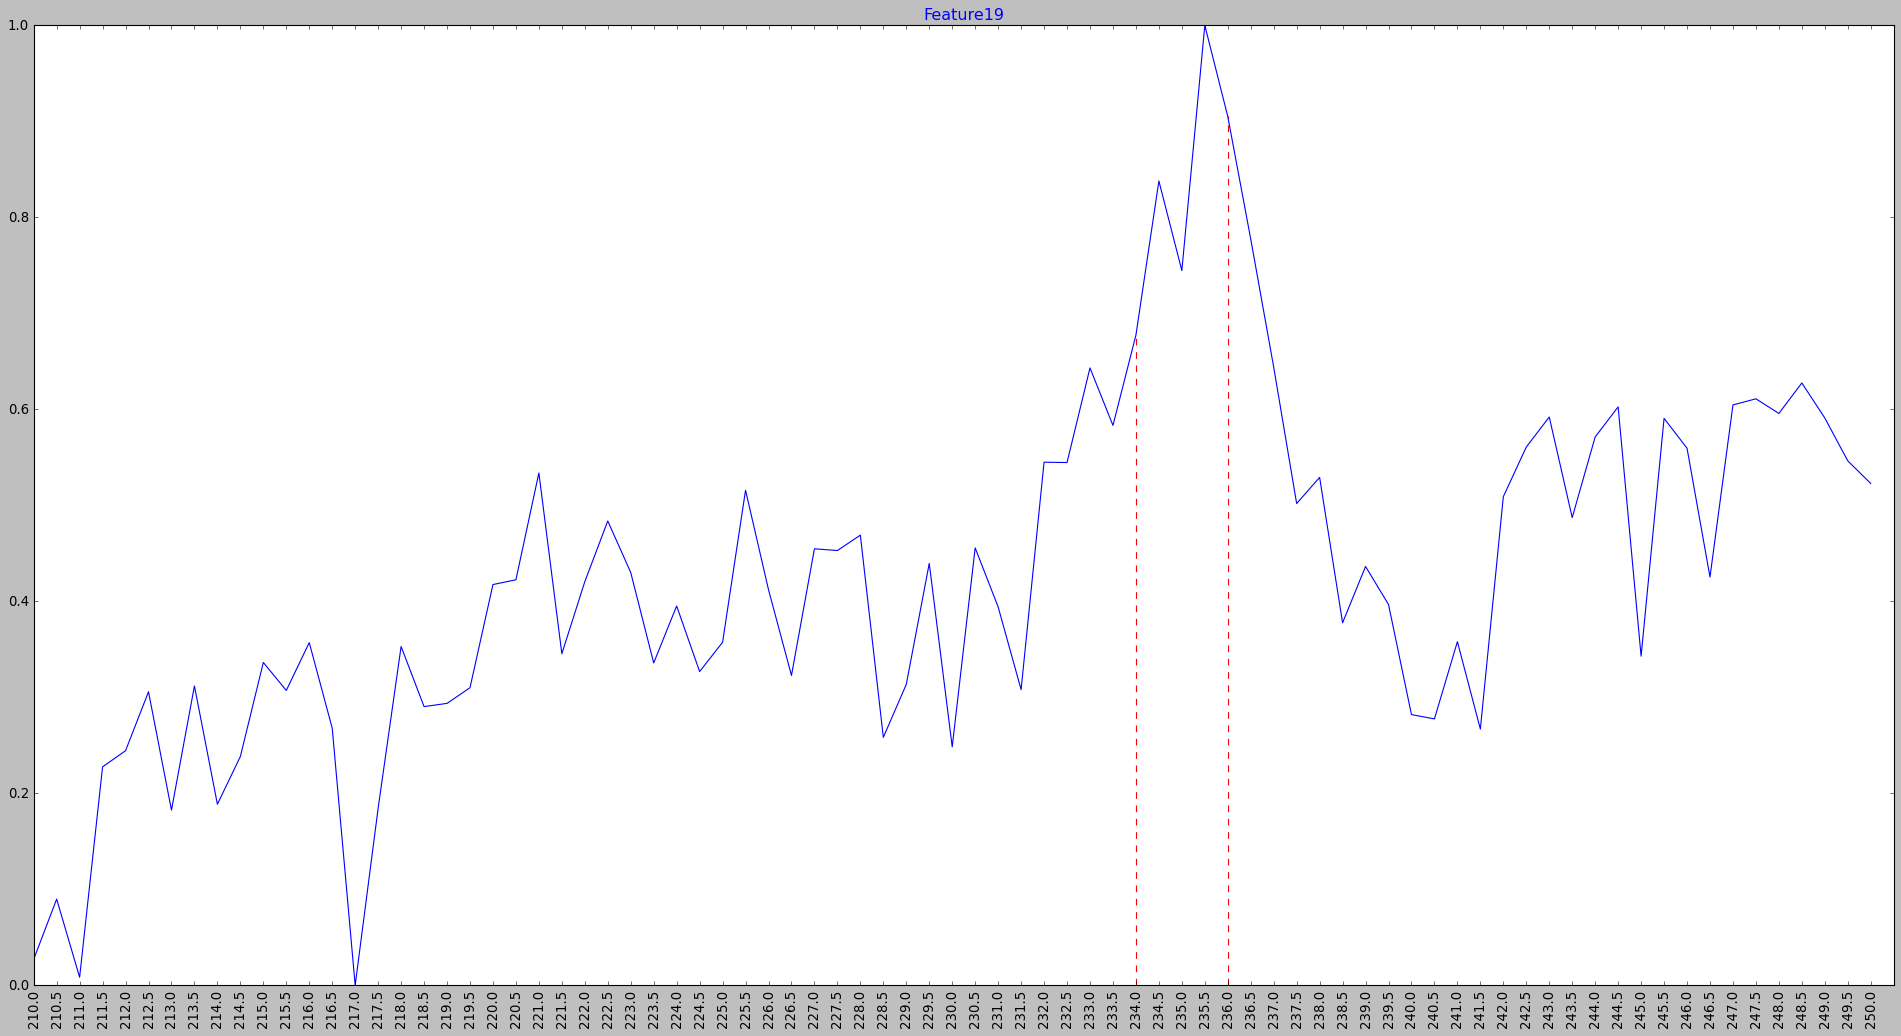

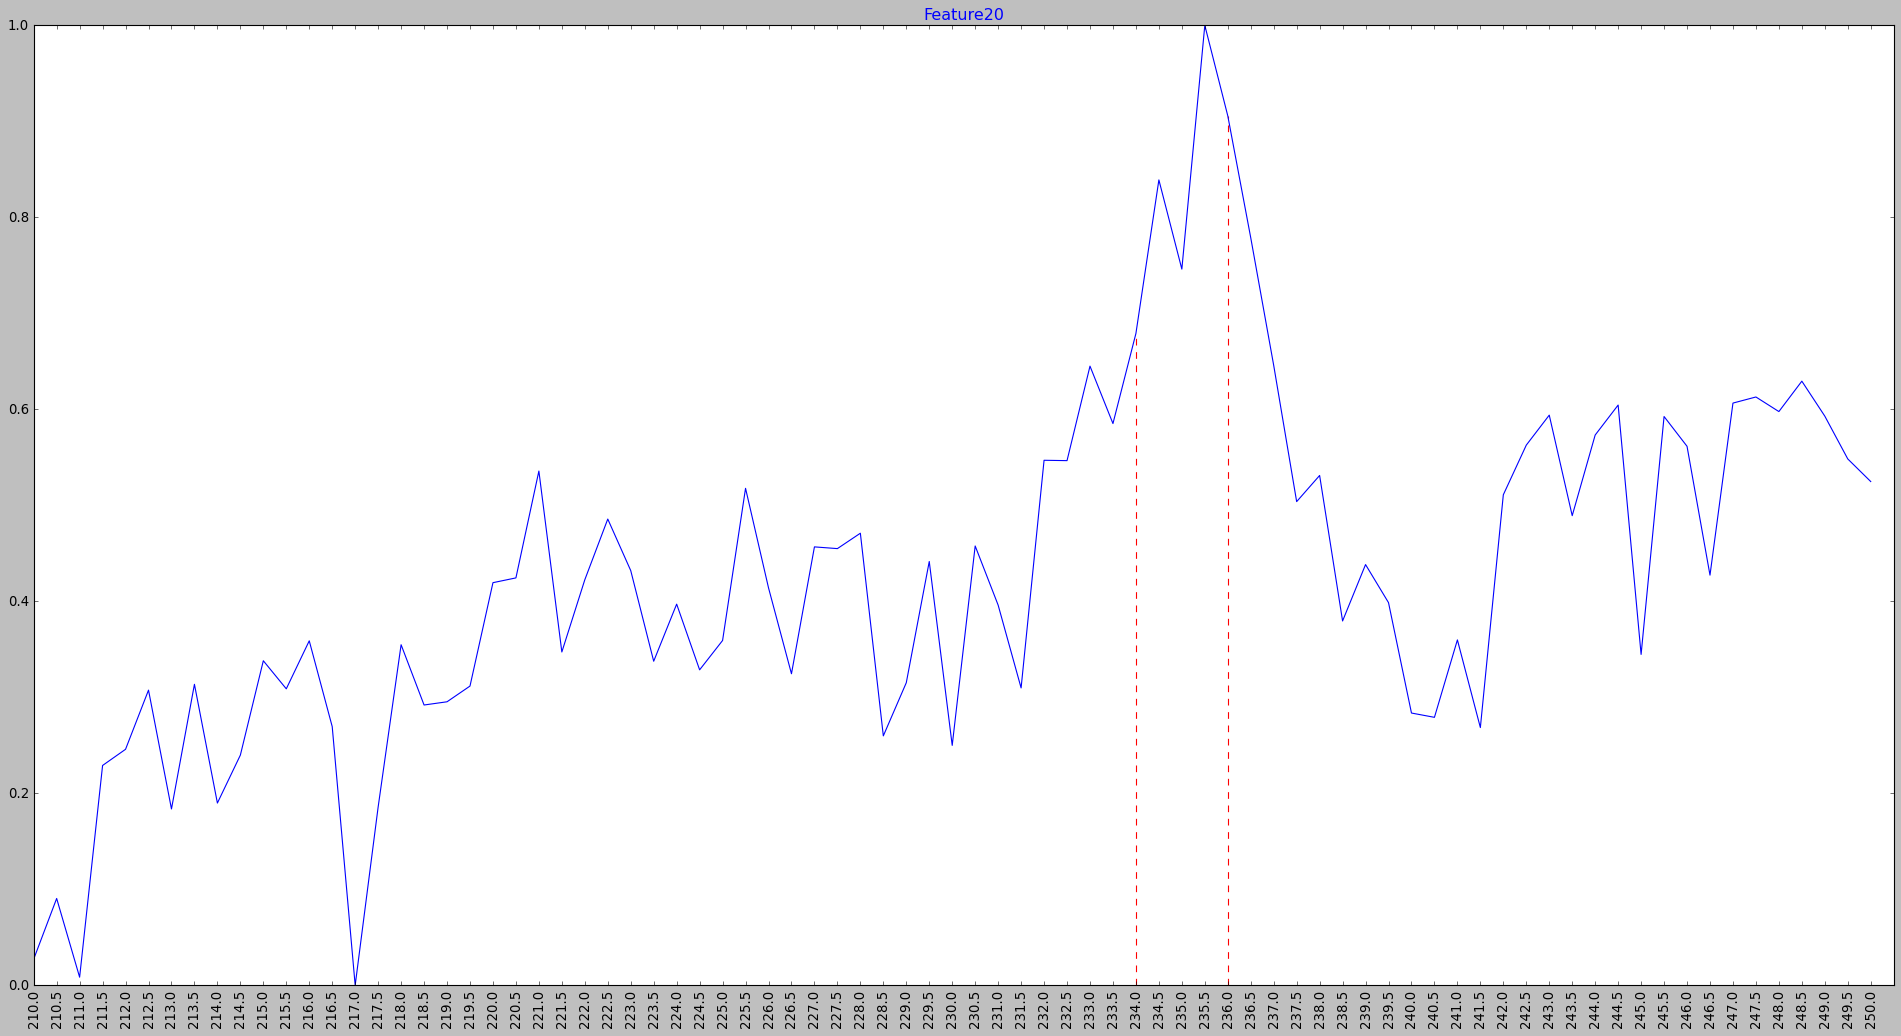

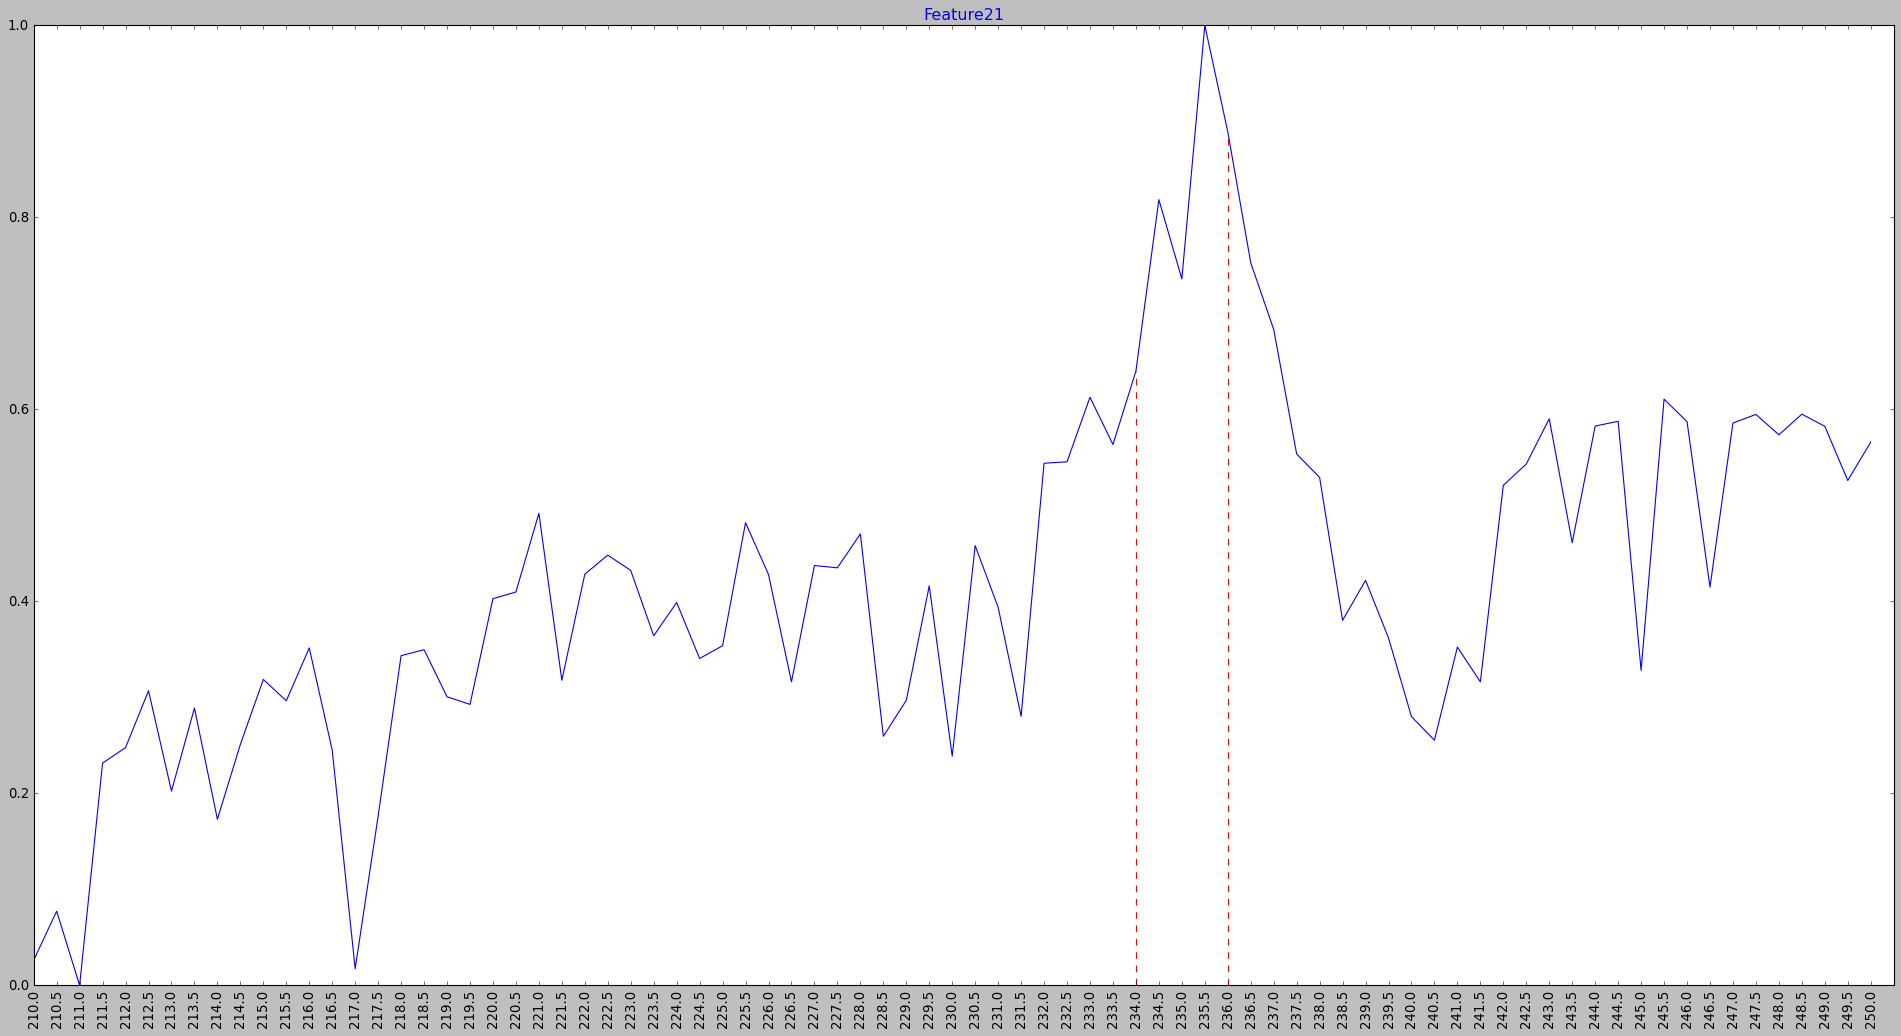

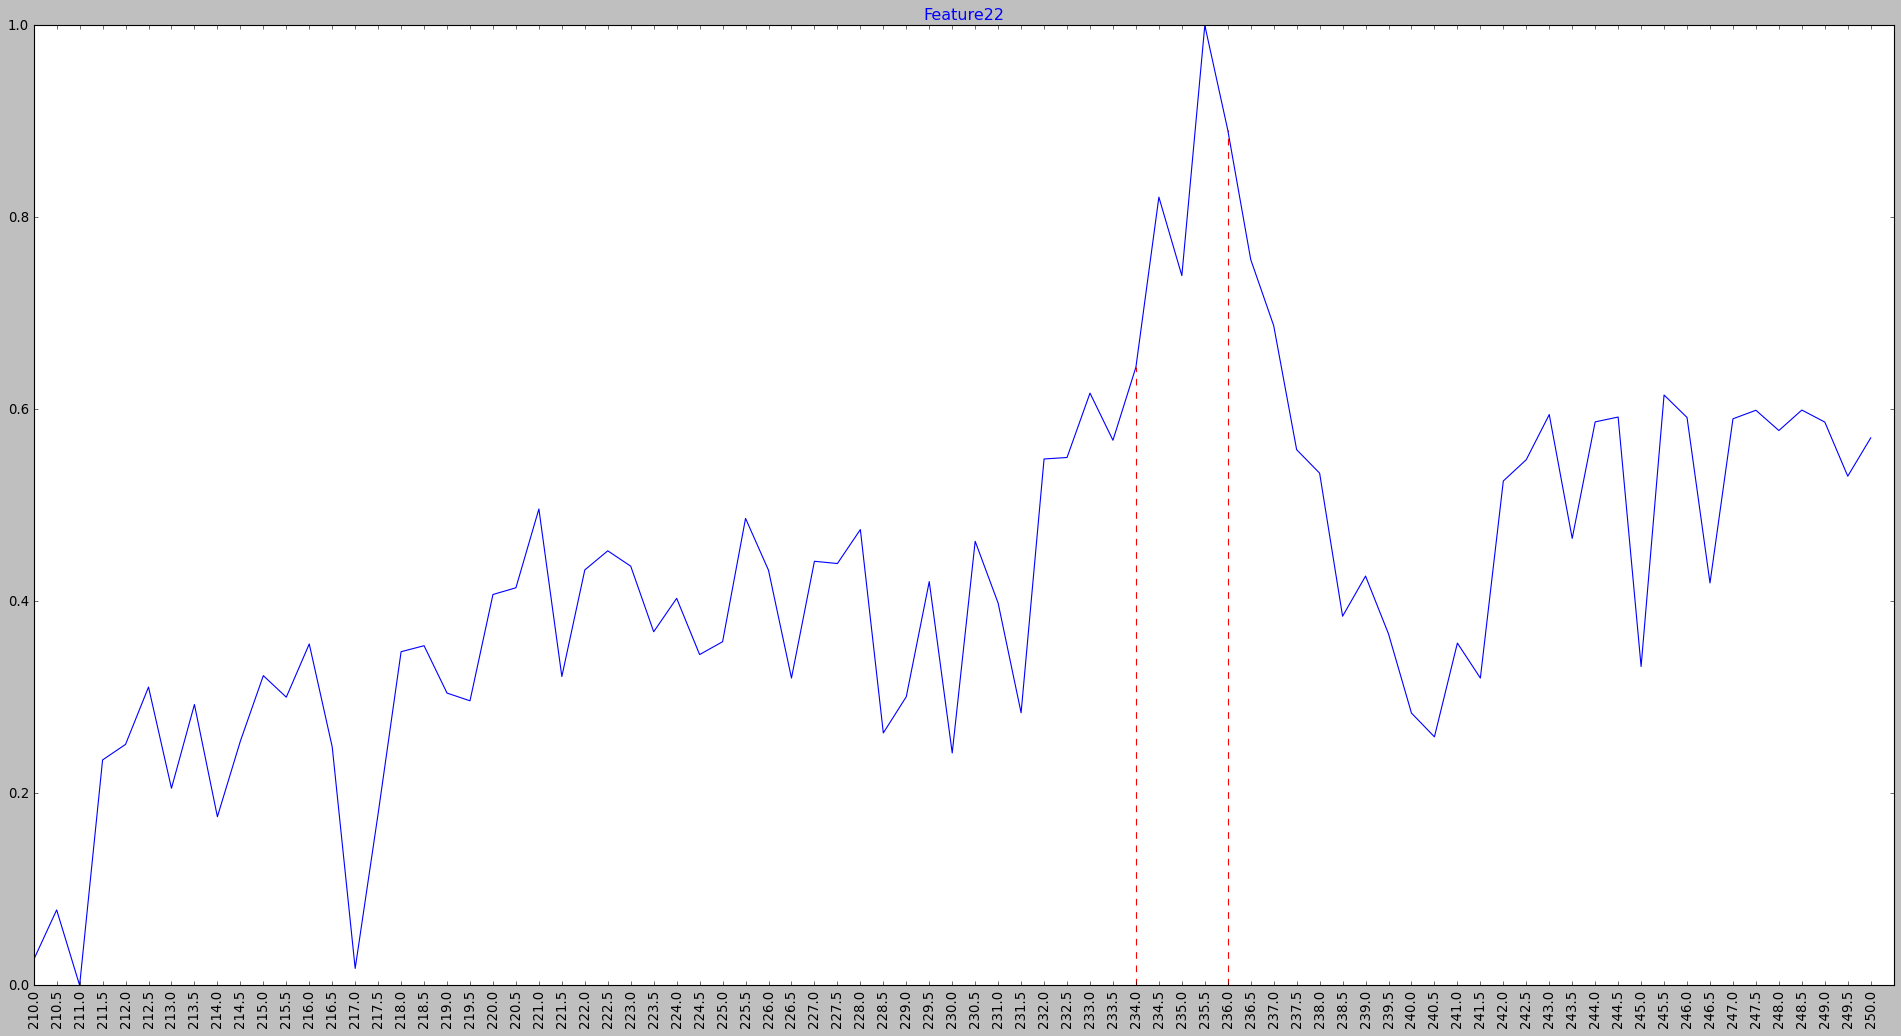

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.figure(figsize=(20, 10))
import pywt
from scipy.stats import entropy
from pandas import read_csv
from pyentrp import entropy as ent
from sklearn.neighbors import NearestNeighbors
from scipy import stats 

def Feature_extraction(Data):
#     Data: signal dimension * sensor number
    f1 = []
    f2 = []
    f3 = []
    f4 = []
    f5 = []
    f6 = []
    f7 = []
    f8 = []
    f9 = []
    f10 = []
    f11 = []
    f12 = []
    f13 = []
    f14 = []
    f15 = []
    f16 = []
    f17 = []
    f18 = []
    f19 = []
    f20 = []
    f21 = []
    f22 = []
    f23 = []
    for i in range(Data.shape[1]):
        data = Data[:,i]
        Xr = np.mean(np.sqrt(abs(data)))*np.mean(np.sqrt(abs(data))) 
        Xmean = np.mean(abs(data)) 
        Xrms = np.sqrt(np.dot(data,data)/len(data)) 
        Xp = max(max(data), -min(data))
        
        f1.append(max(data))
        f2.append(abs(min(data)))
        f3.append(np.mean(data))
        f4.append(max(data)-min(data))
        f5.append(Xp)
        f6.append(Xr) 
        f7.append(Xrms) 
        f8.append(Xmean)
        f9.append(np.var(data)) 
        f10.append(np.std(data))
        f11.append((np.dot(data,data))/len(data))
        f12.append(Xp/Xrms) 
        f13.append(stats.kurtosis(data)) 
        f14.append(stats.skew(data)) 
        f15.append(Xp/Xr) 
        f16.append(Xp/np.mean(abs(data))) 
        f17.append(Xrms/Xmean) 
#         f18.append(ent.sample_entropy(data, 2, 0.2 * np.std(data))[0])
        
        st = 0.01
        fs = 1/st 
        N = len(data) 
        y = 2*abs(np.fft.fft(data))/N 
        f = np.array([(i+1)*fs/N for i in range(N)]) 
        FC = np.dot(f,y)/np.sum(y) 
        MSF = np.dot(np.multiply(f,f),y)/np.sum(y) 
        RMSF = np.sqrt(MSF) 
        VF = np.dot(np.multiply(f-FC,f-FC),y)/np.sum(y); 
        RVF = np.sqrt(VF) 
        f19.append(FC) 
        f20.append(MSF) 
        f21.append(RMSF)
        f22.append(VF) 
        f23.append(RVF)
#     Fap = np.array([f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23])
    Fap = np.array([f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f19,f20,f21,f22,f23])
    return Fap
def PLOT(data,Left_edge,Right_edge,N_group,Title,i):
    temp = data
    plt.figure(figsize=(30,15))
    plt.title(Title+str(i+1),color  = 'b')
    plt.plot(temp,c = 'b',label = "with a pile")# plie
    plt.vlines((Left_edge-210)/0.5, 0, (temp)[int((Left_edge-210)/0.5)],colors = "r", linestyles = "dashed")
    plt.vlines((Right_edge-210)/0.5, 0,(temp)[int((Right_edge-210)/0.5)],colors = "r", linestyles = "dashed")
    x = np.linspace(0, N_group, num=N_group+1)
    label = []
    for i in range(N_group):
        label.append(str(i*0.5+210))
    plt.xticks(x,label,rotation='vertical')
    plt.show()
    return plt

# # Pile data
Fap1 = Feature_extraction(v_disp_210_230_total41_with_a_plie)
Fap0 = Feature_extraction(v_disp_210_230_total41_without_a_plie)
Fap2 = Feature_extraction(v_disp_210_230_total41_without_a_plie-v_disp_210_230_total41_with_a_plie)

data = Fap2
for i in range(Fap2.shape[0]):
    PLOT((data[i,:]-np.min(data[i,:]))/(np.max(data[i,:]-np.min(data[i,:]))),Left_edge,Right_edge,N_group,"Feature",i)
    


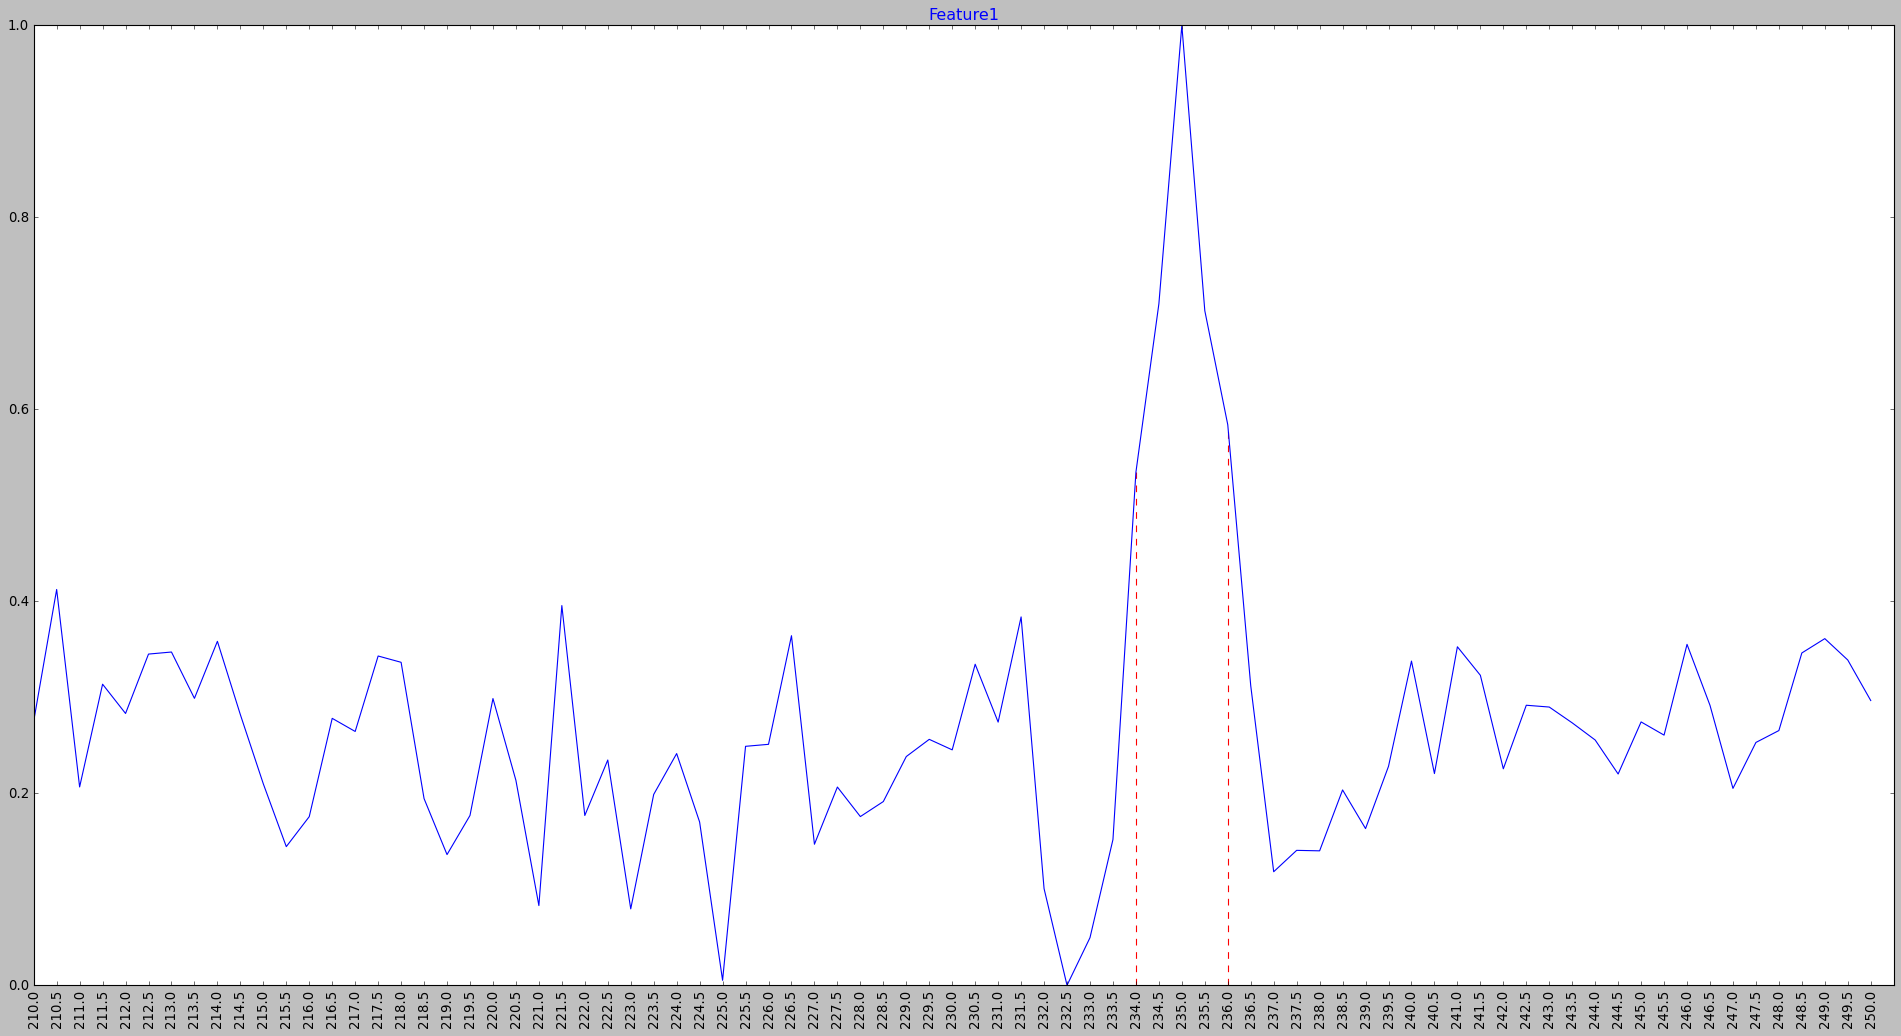

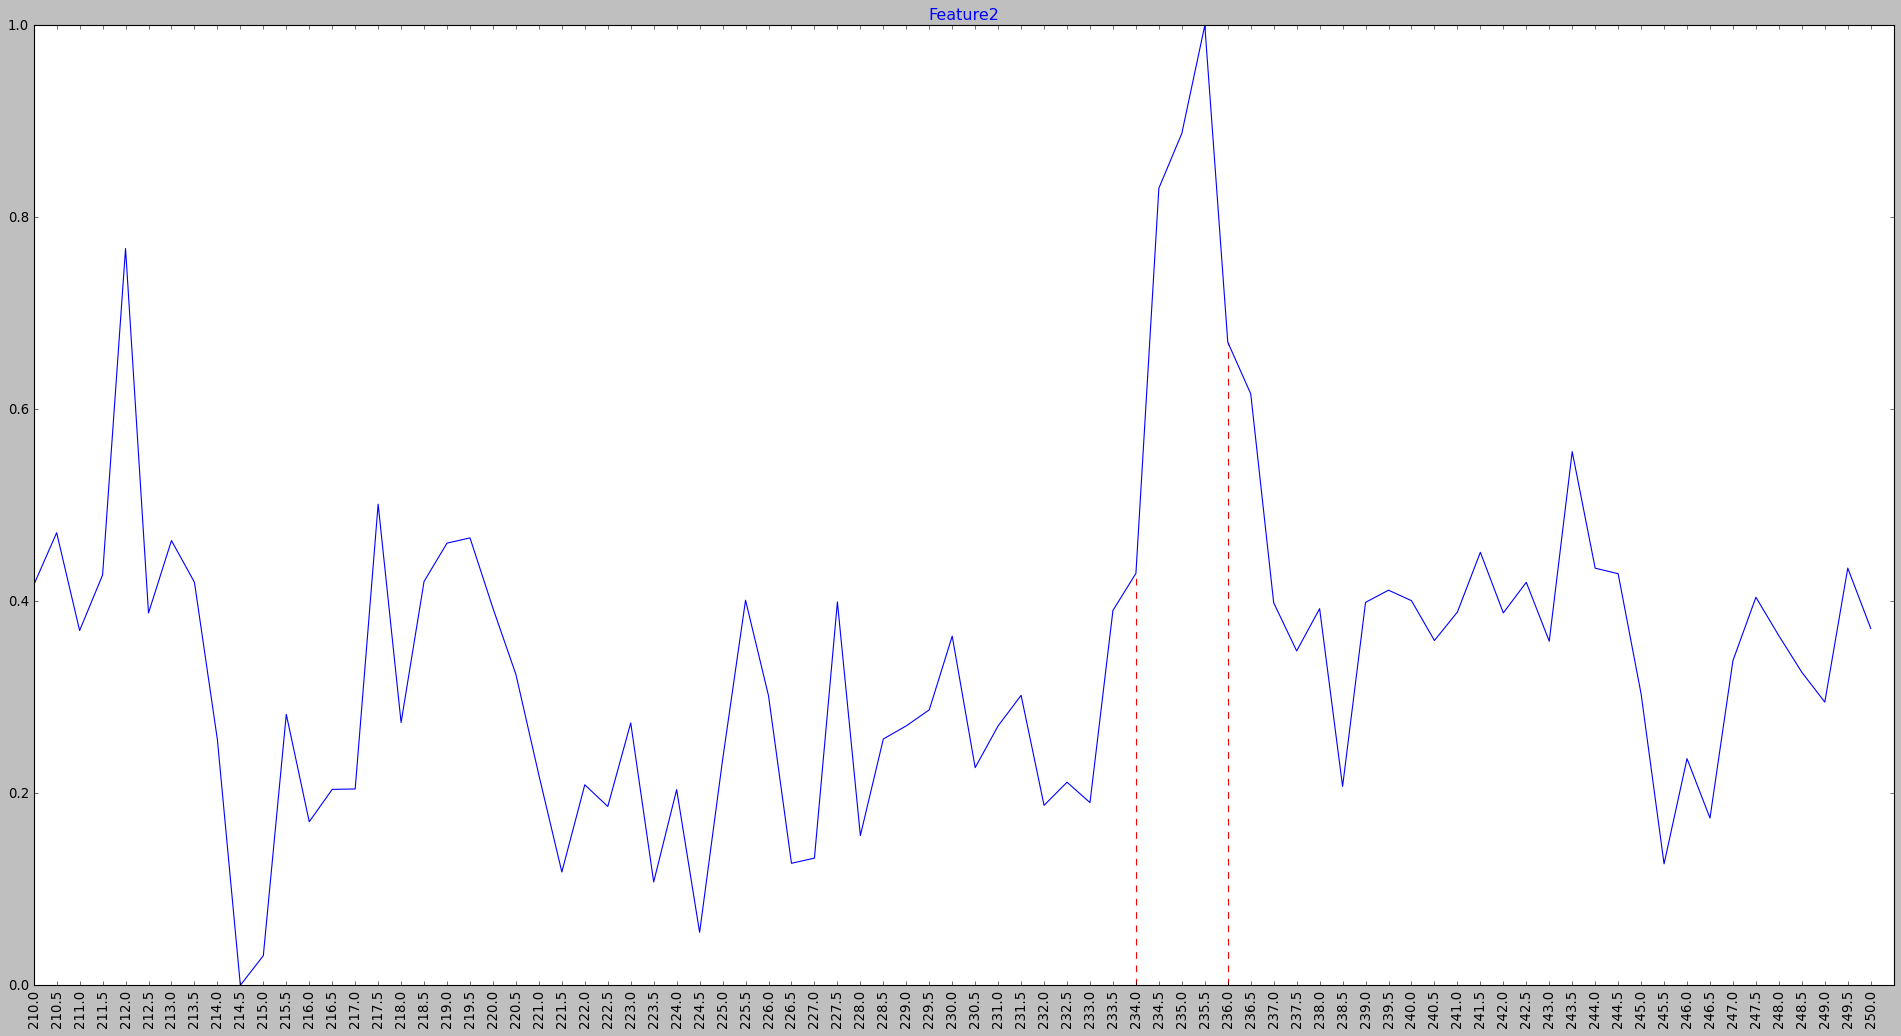

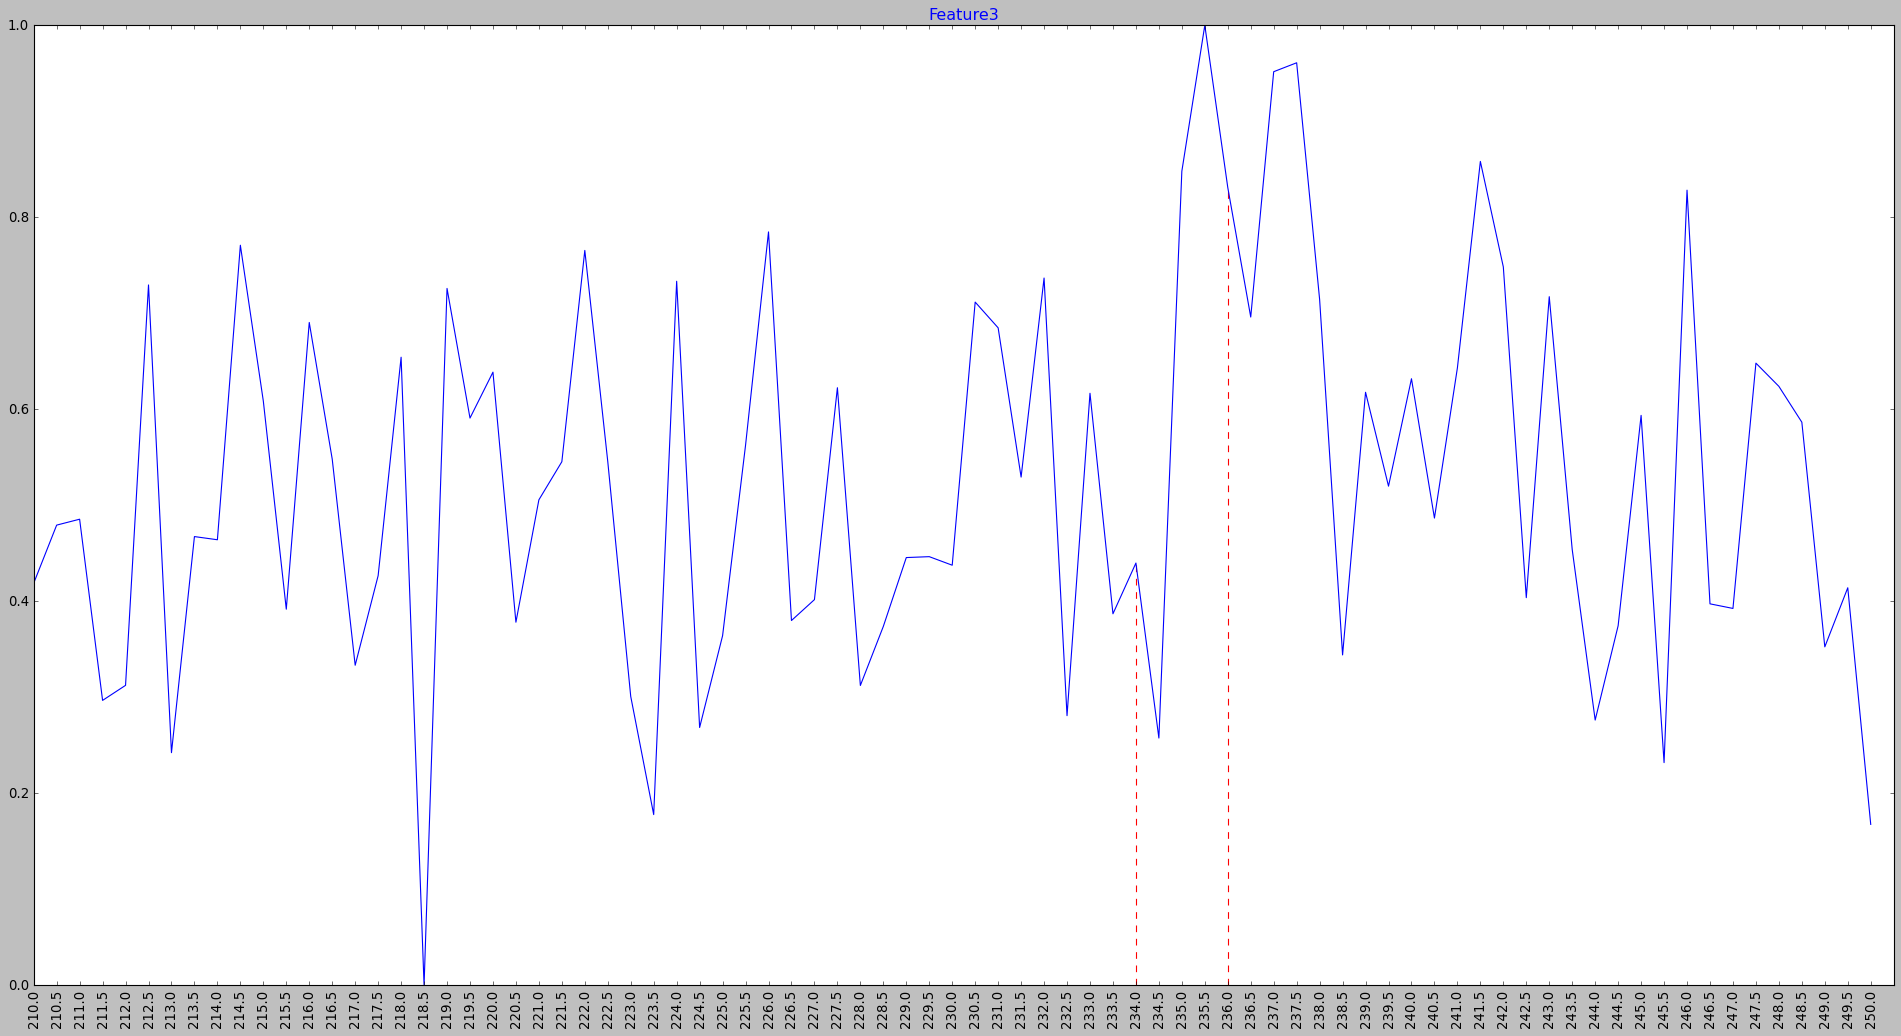

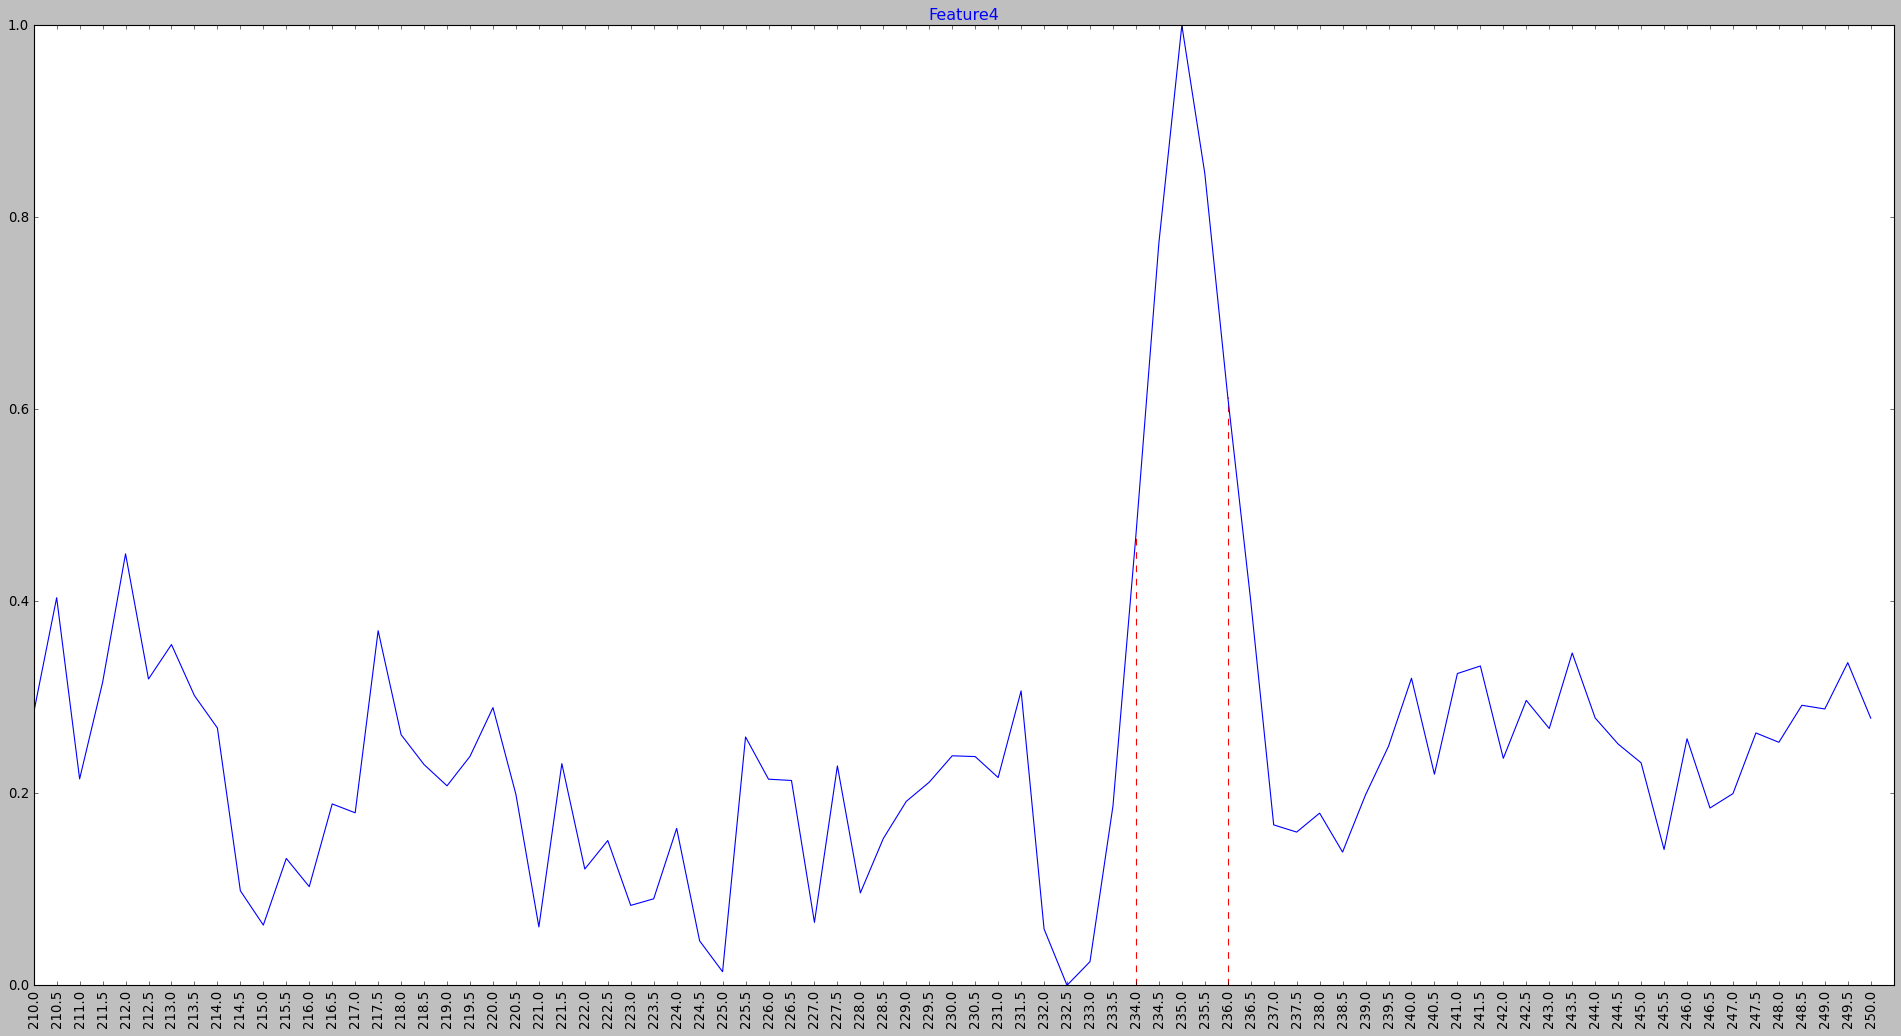

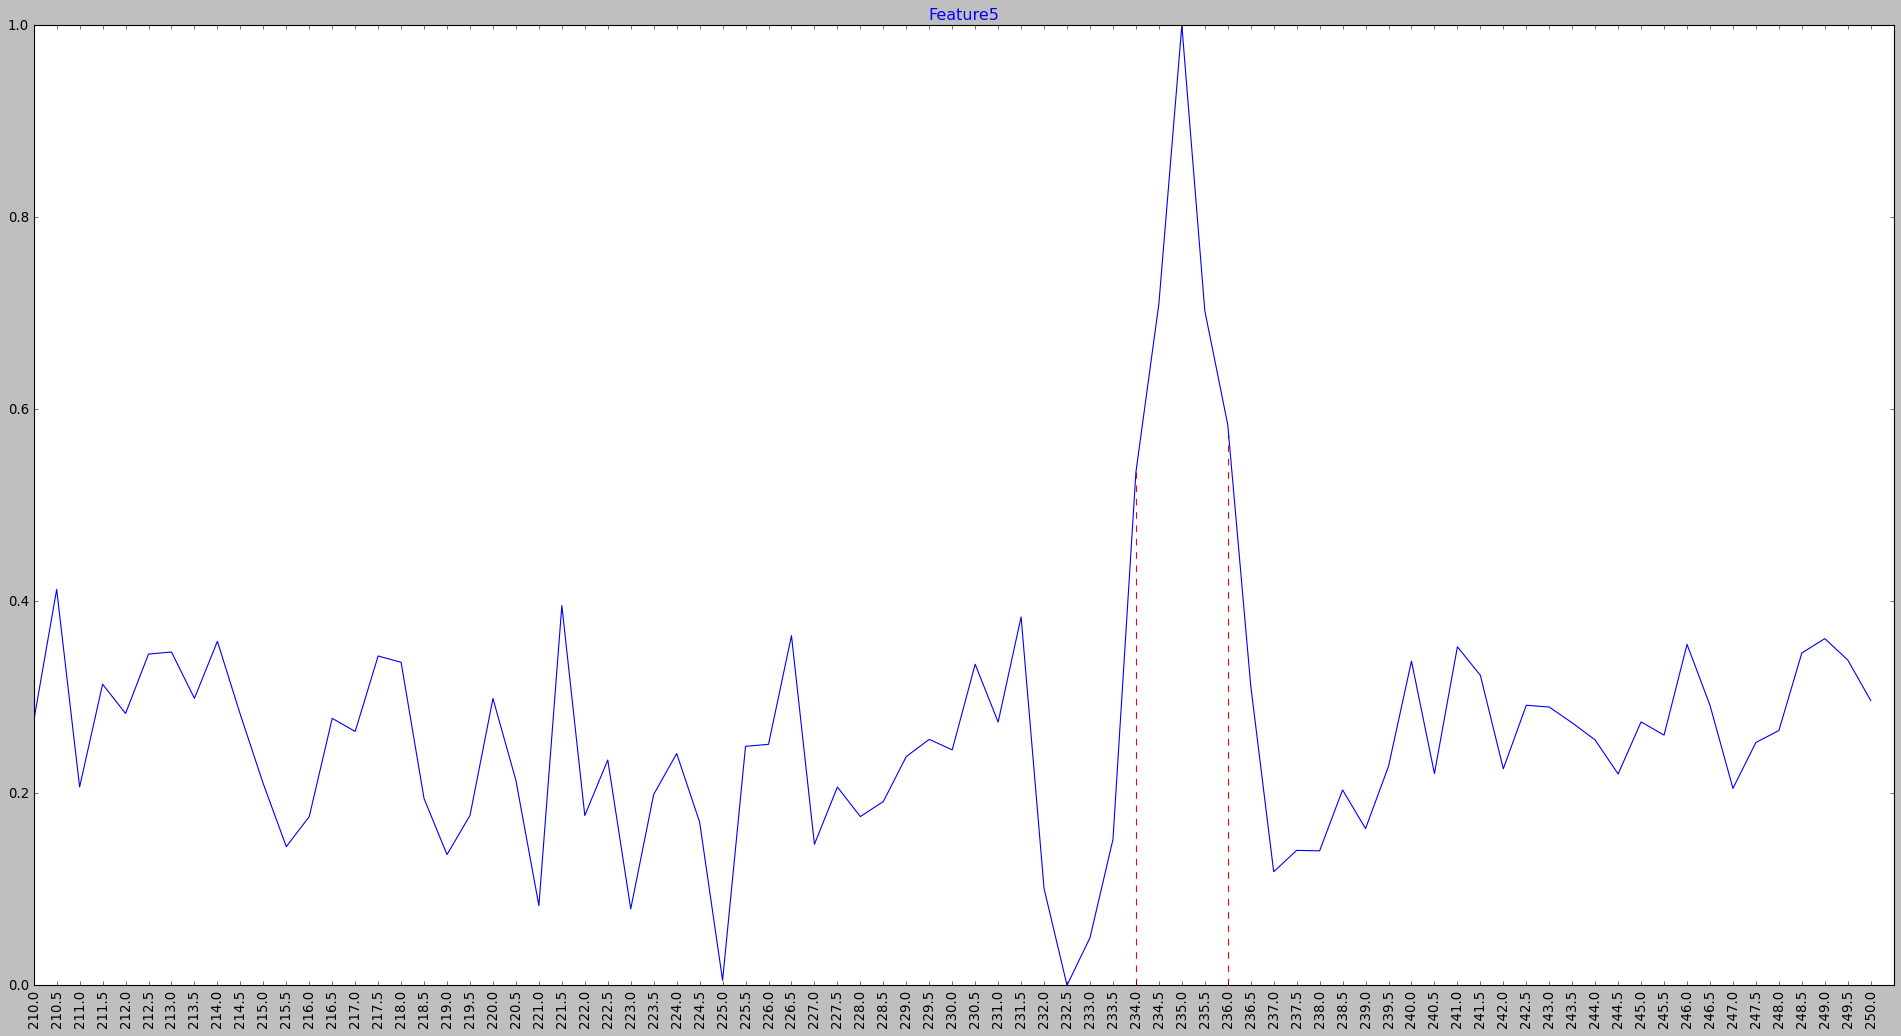

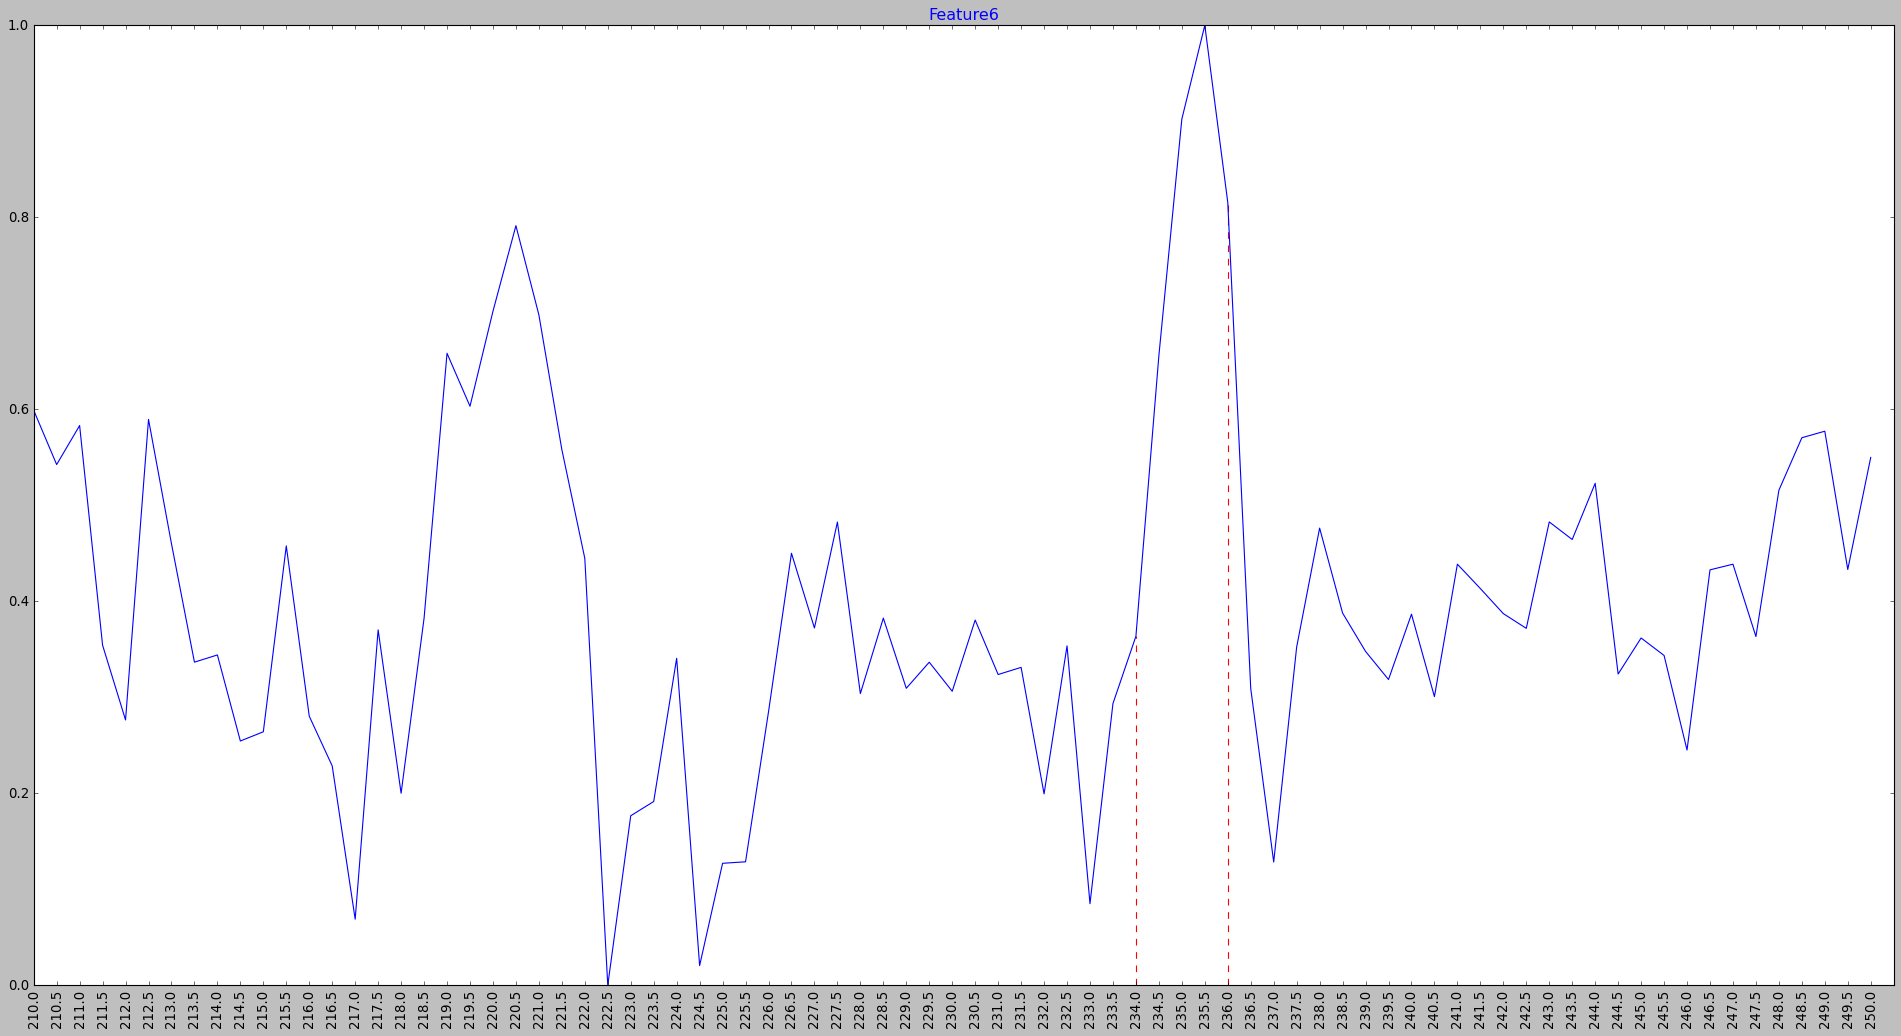

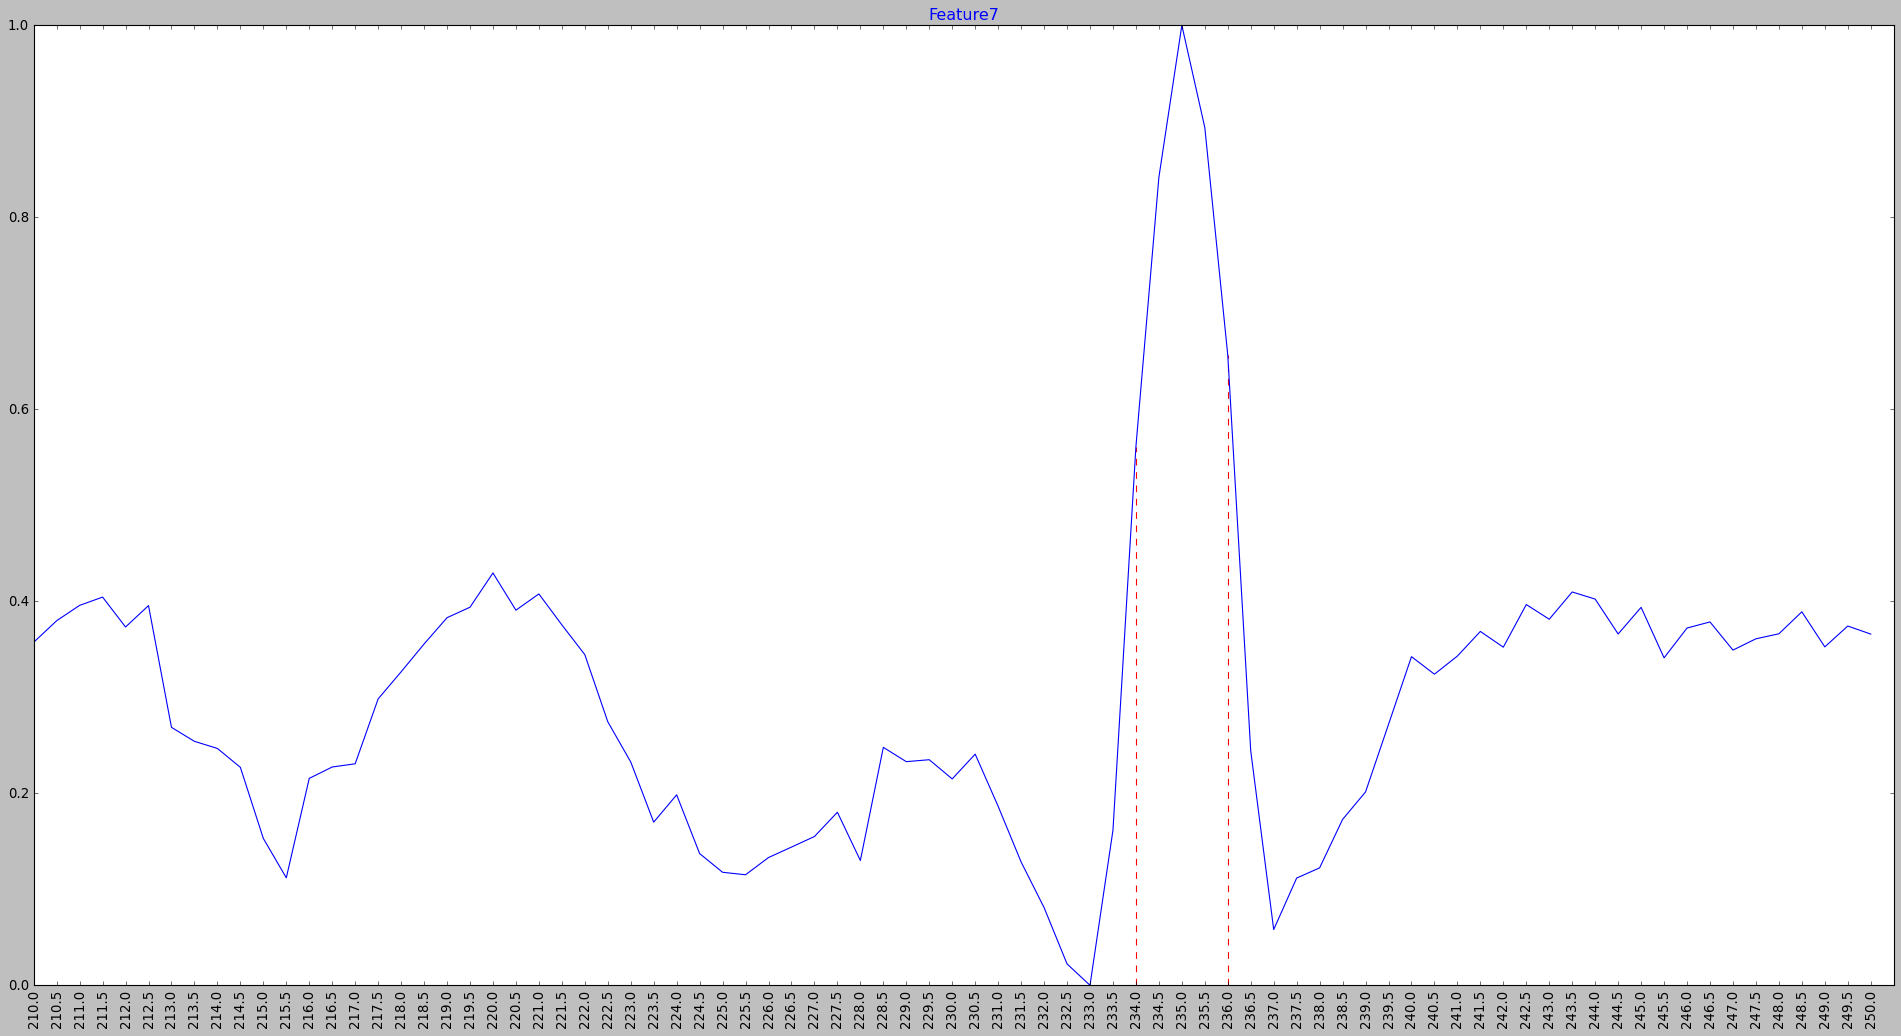

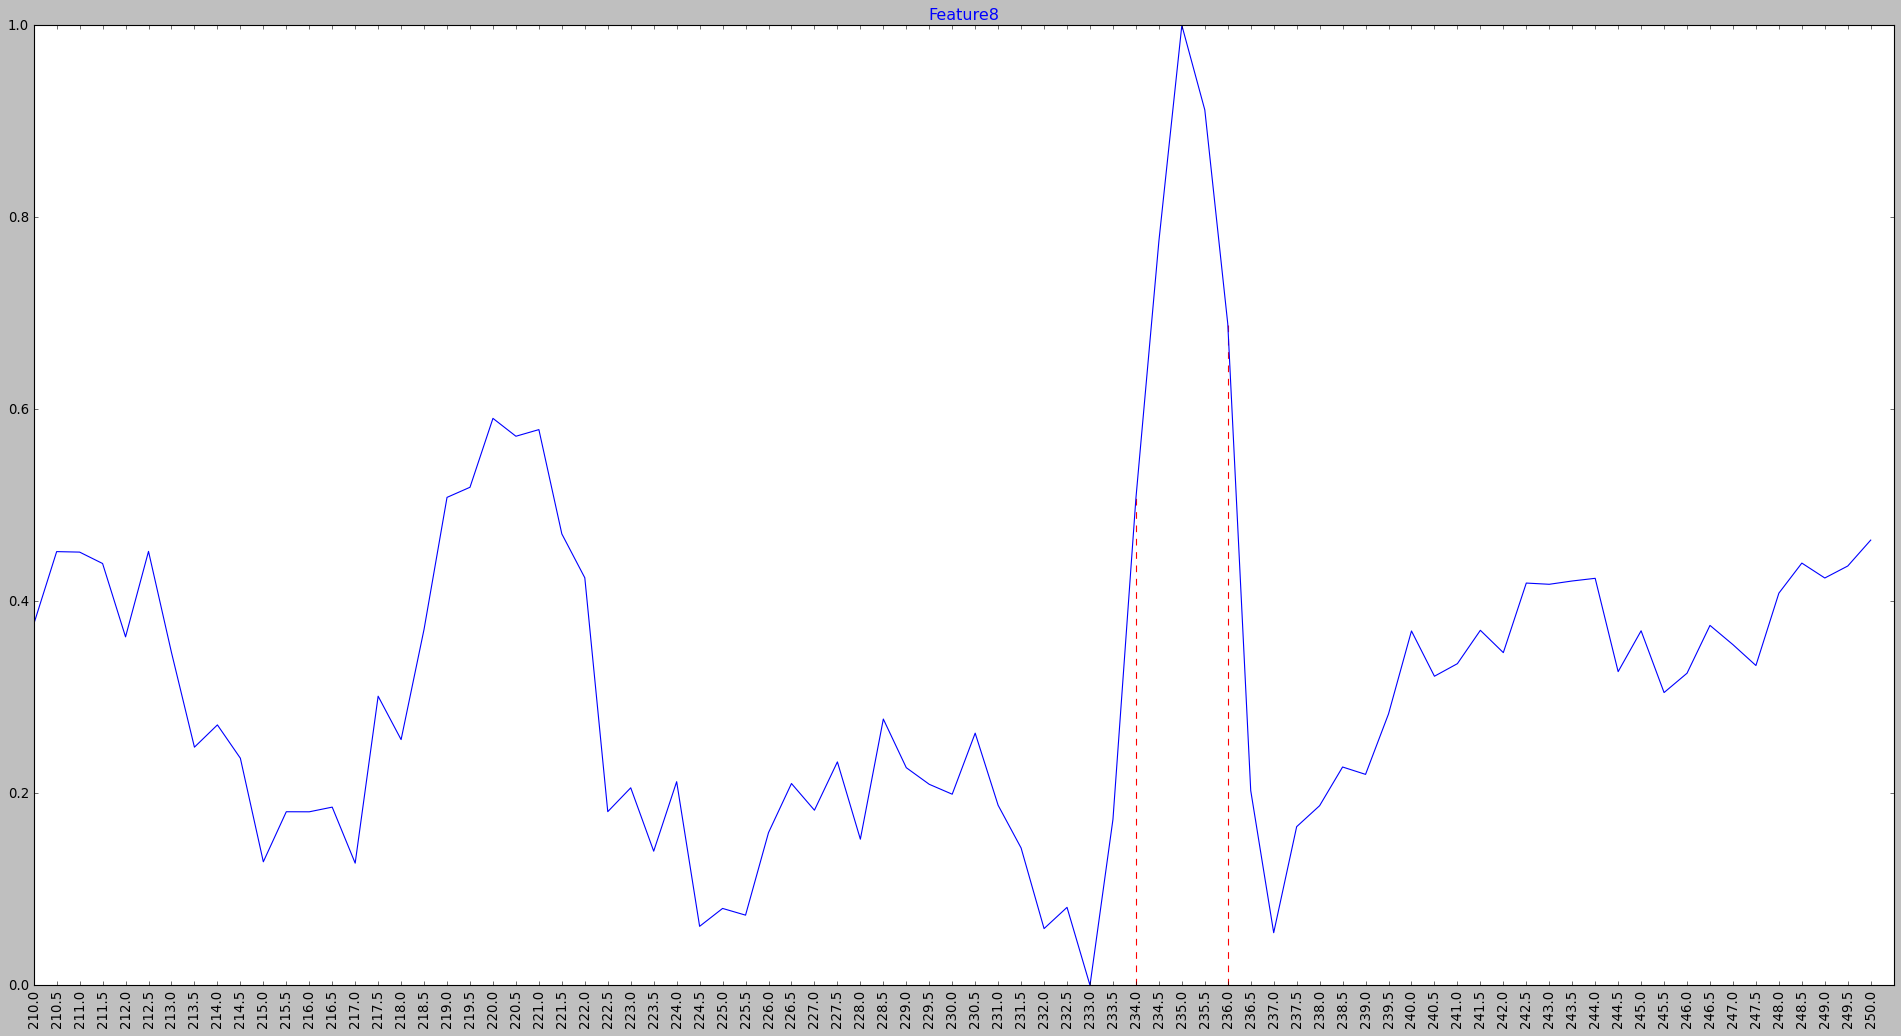

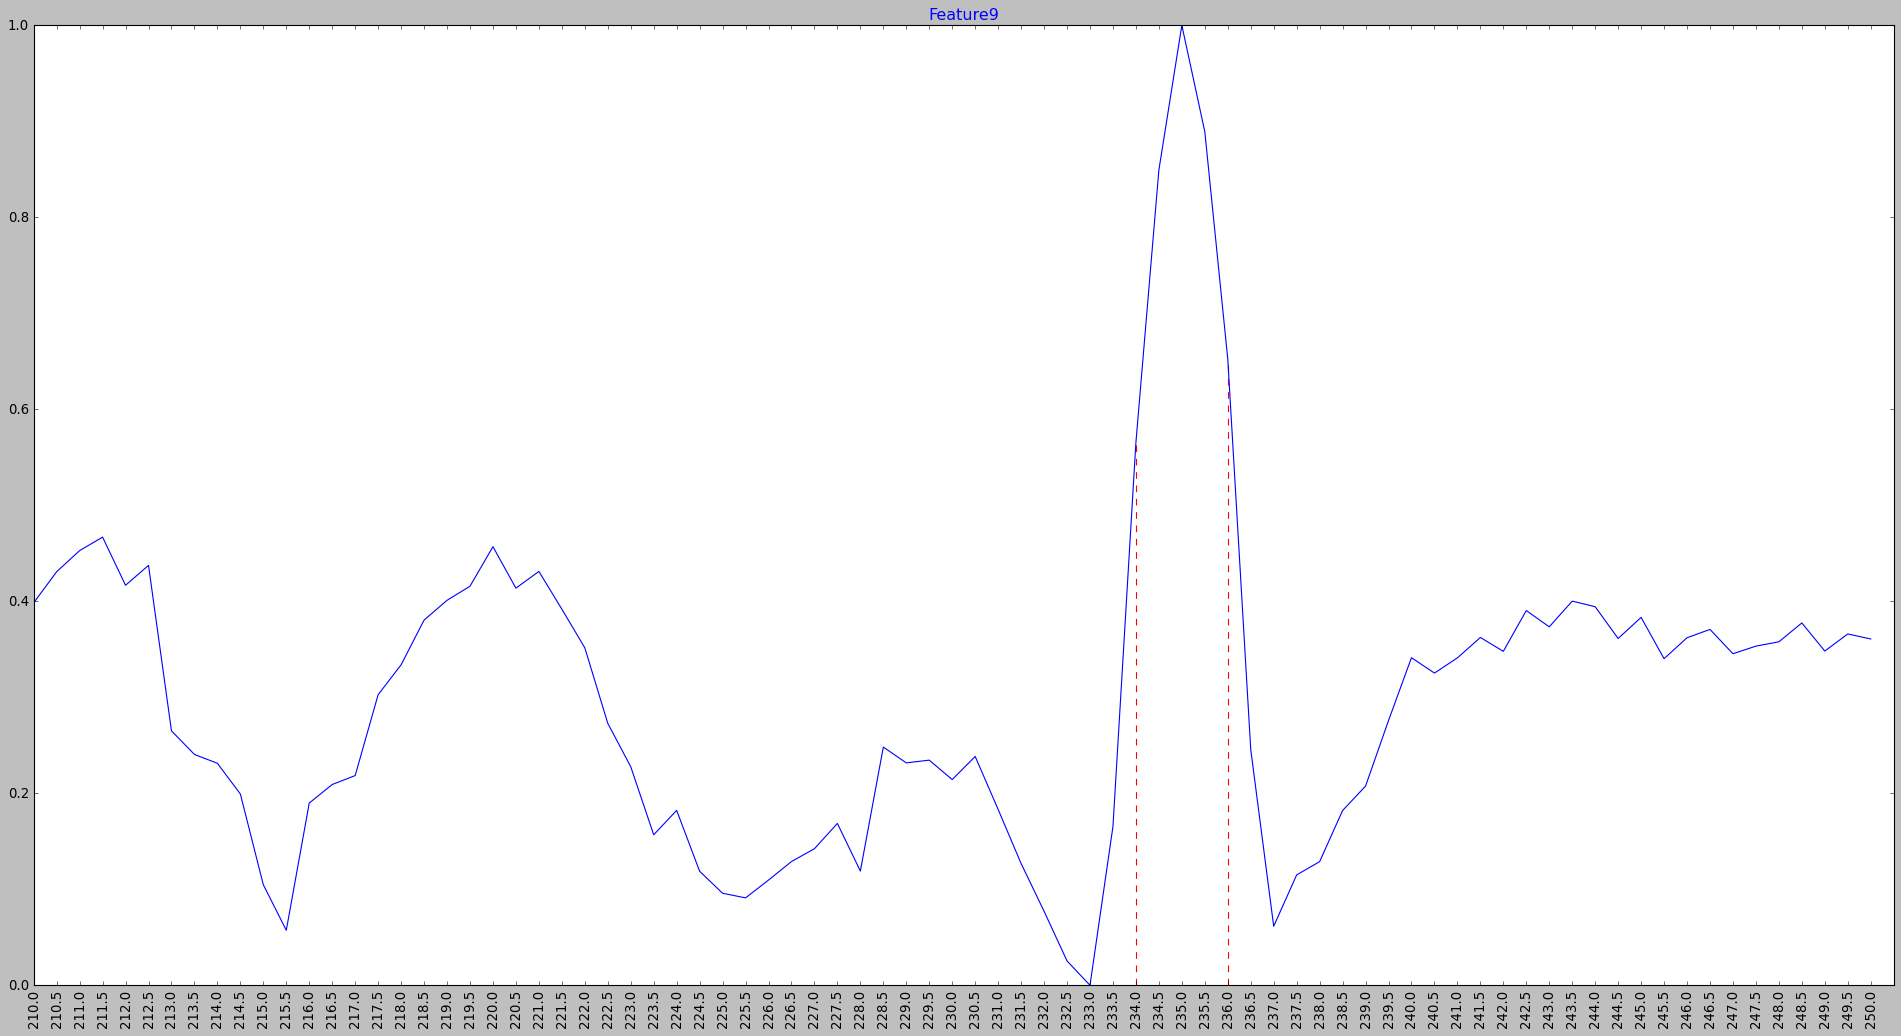

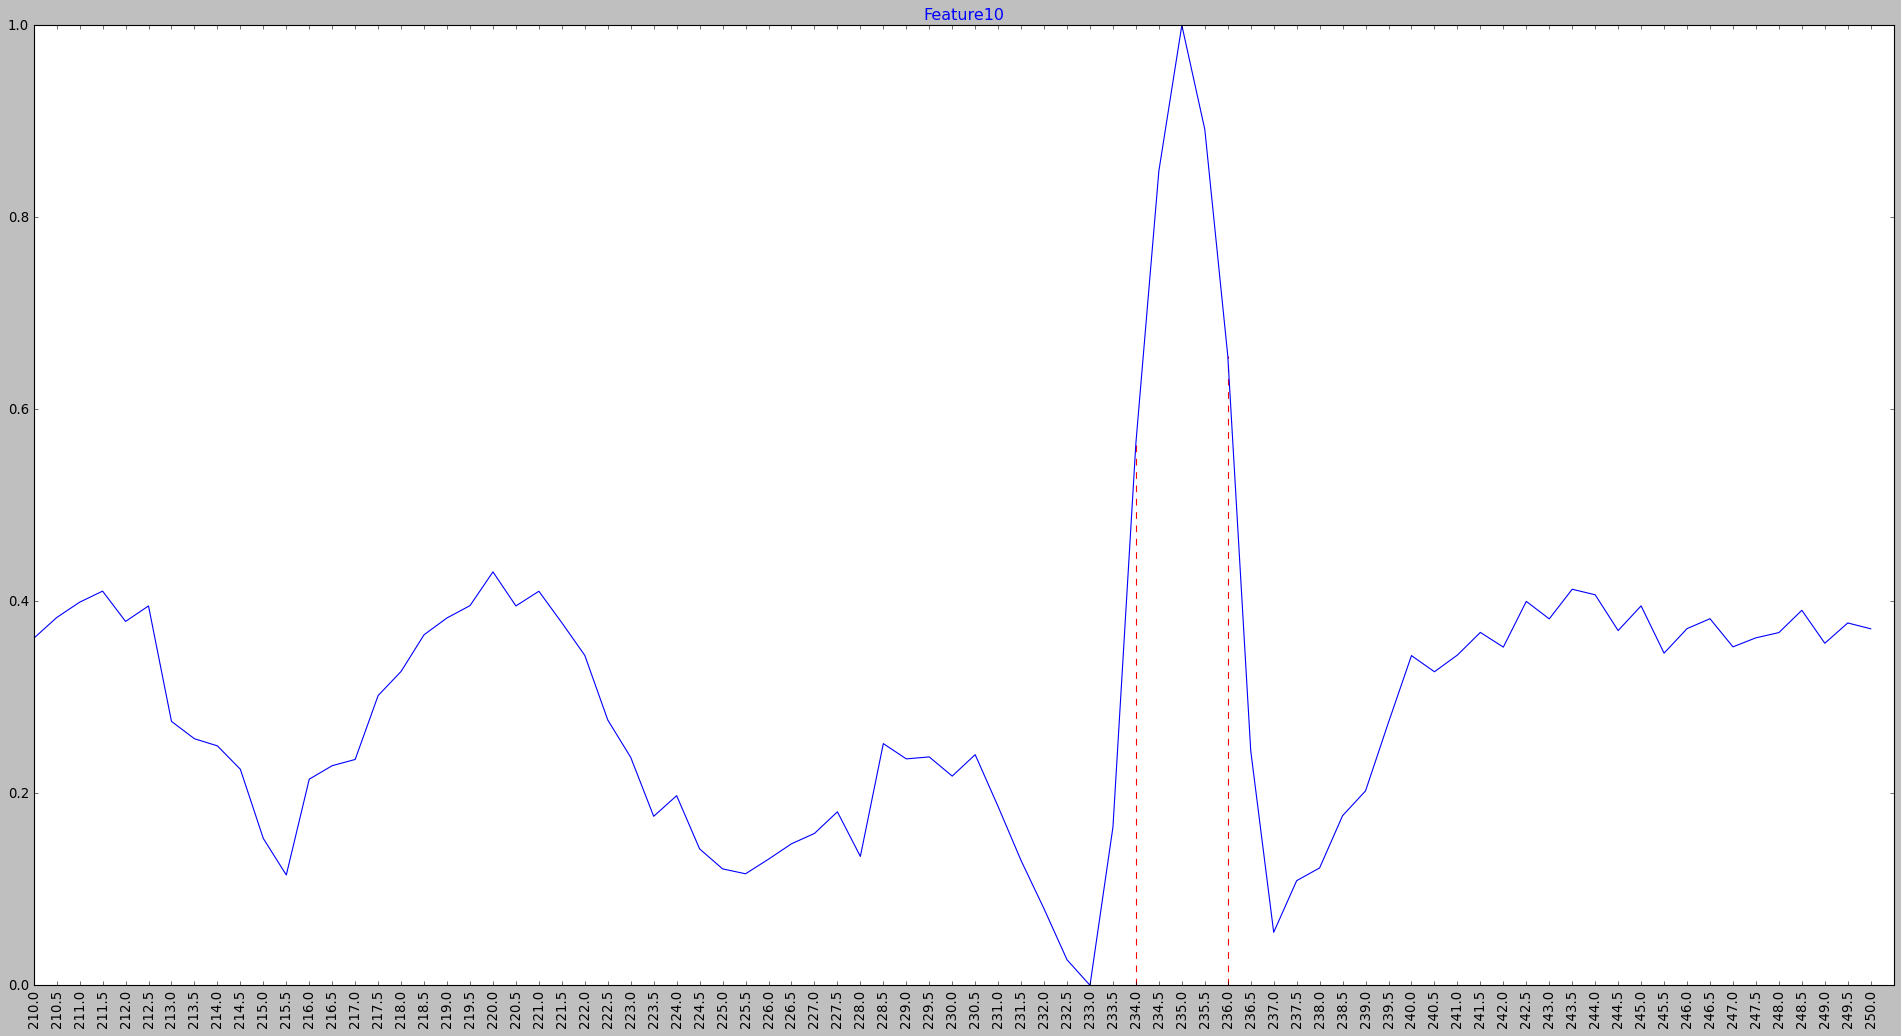

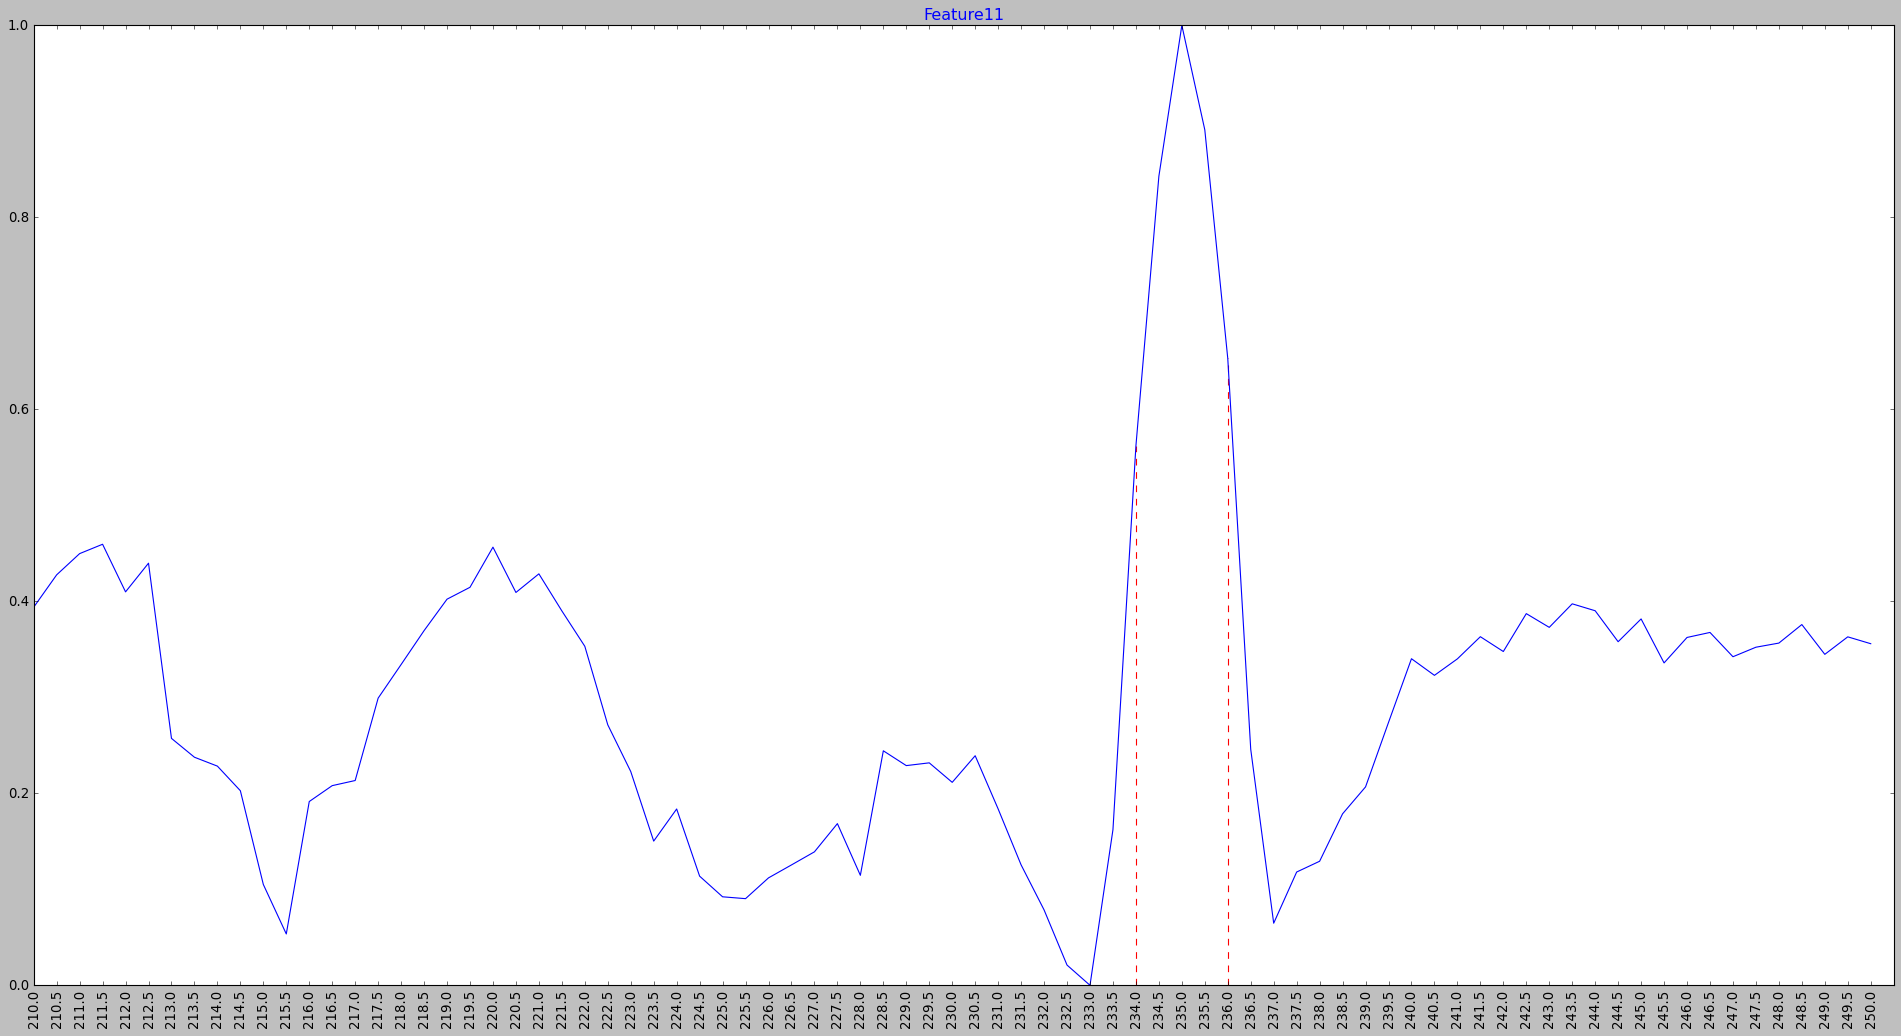

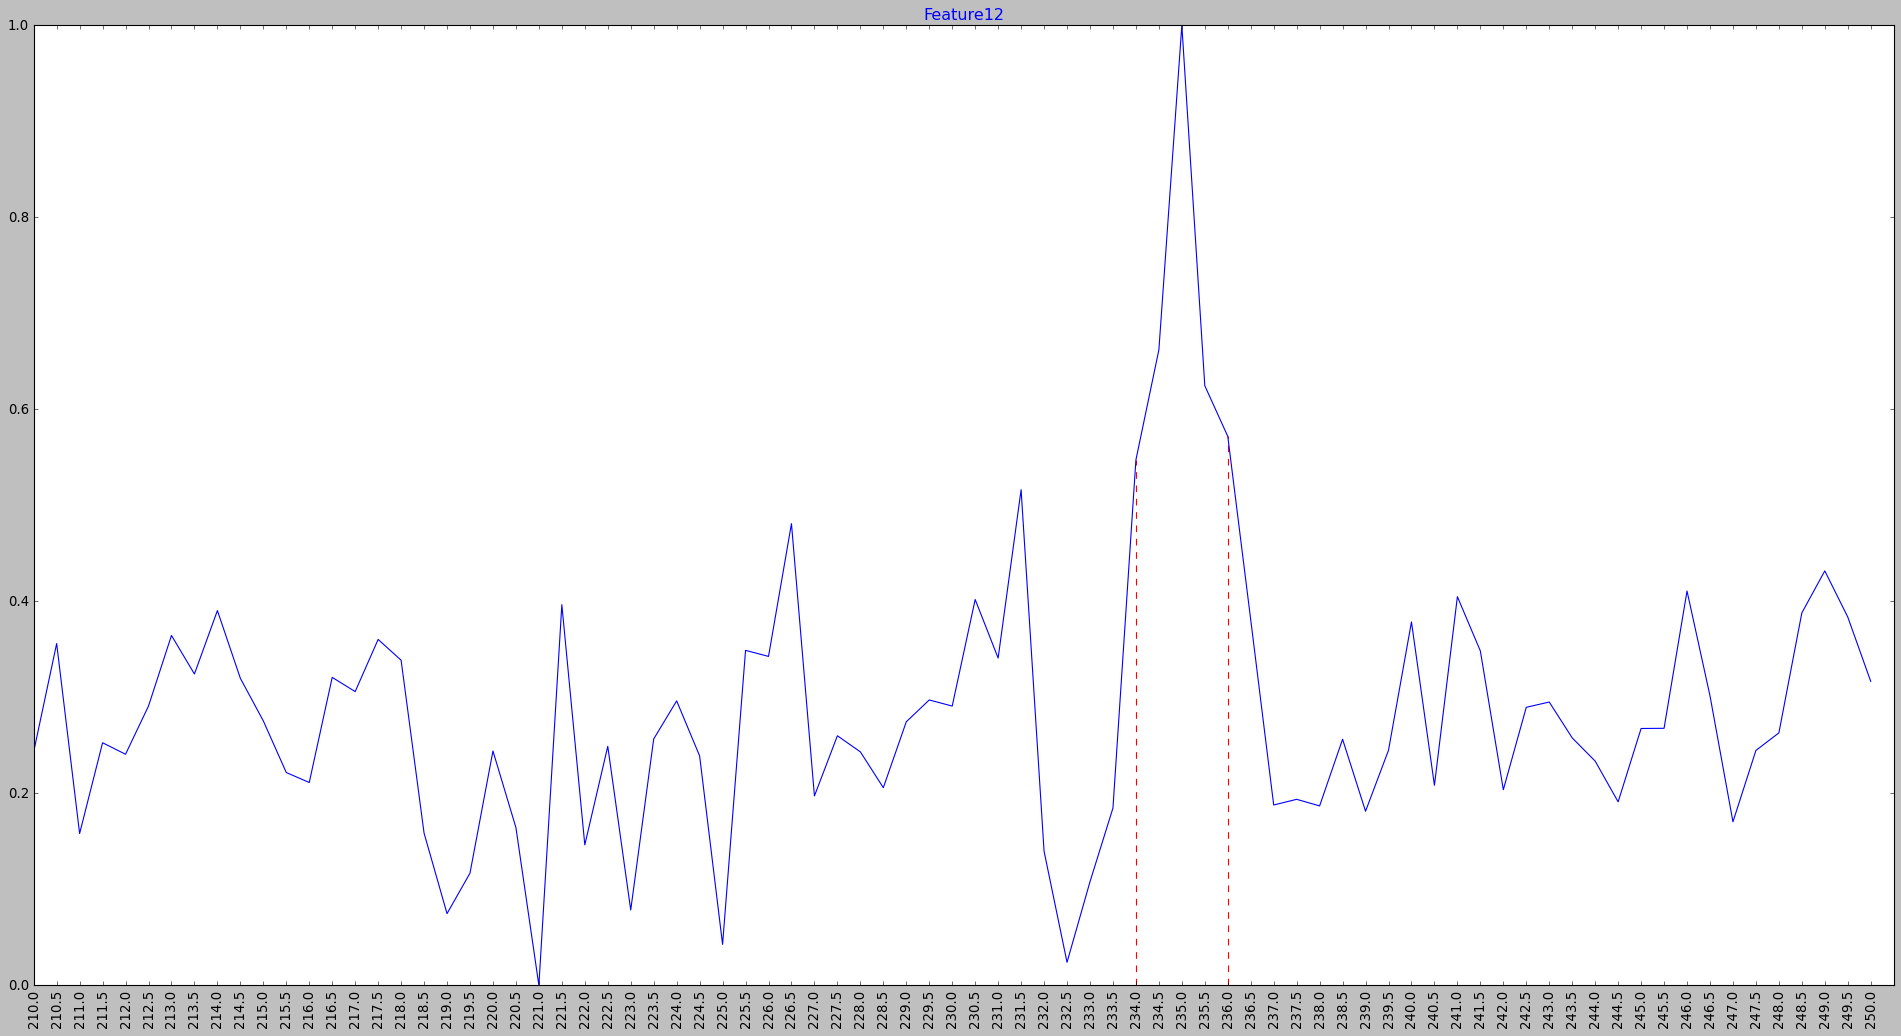

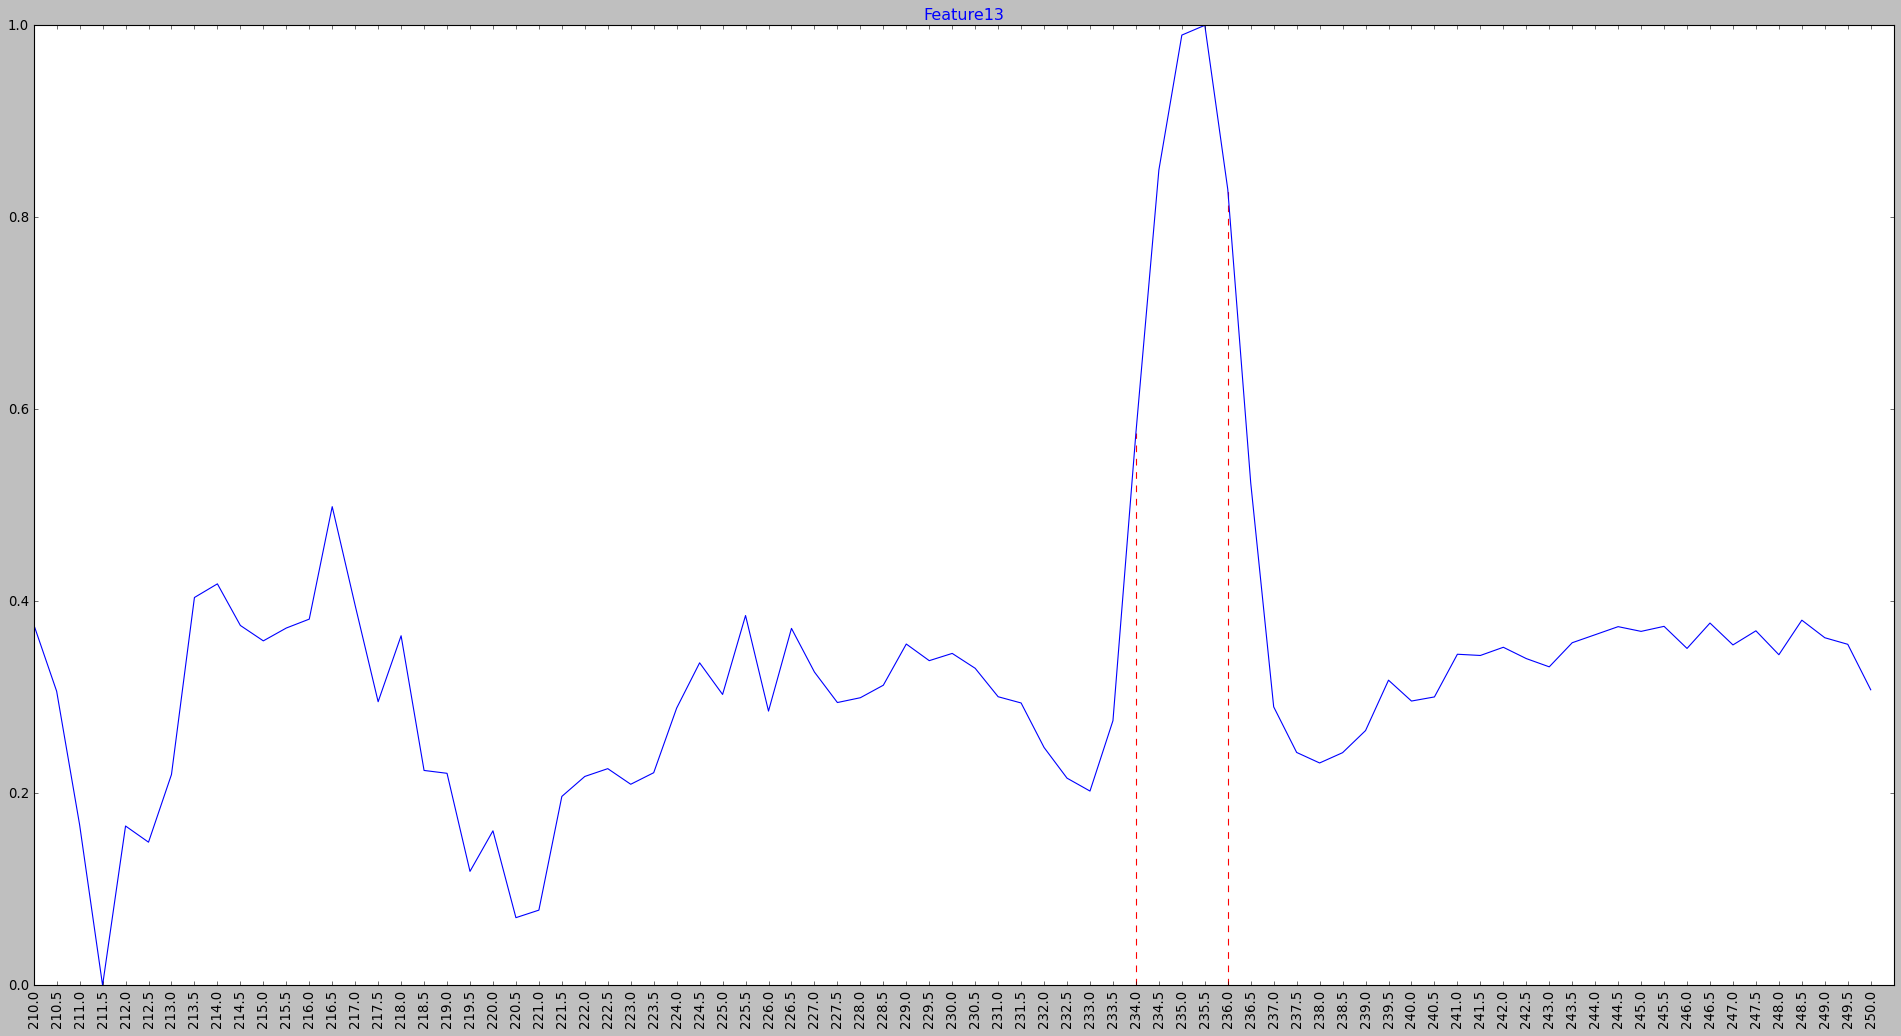

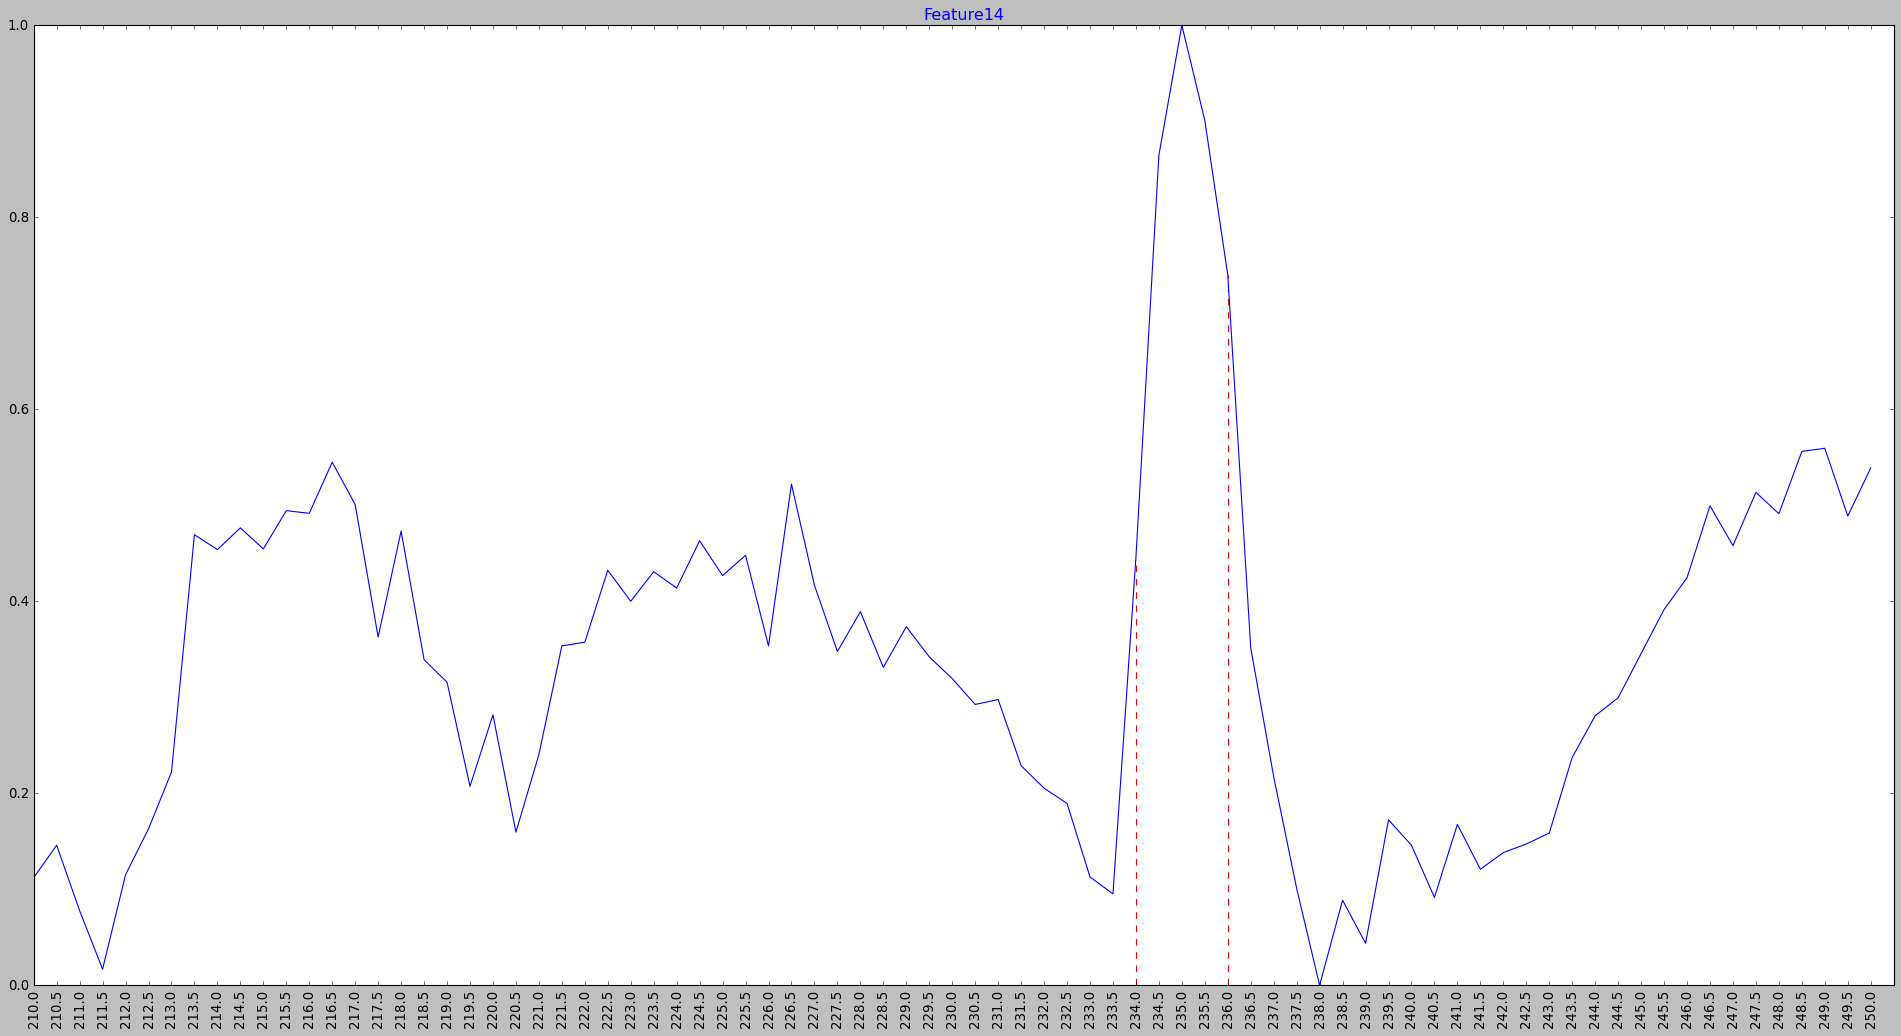

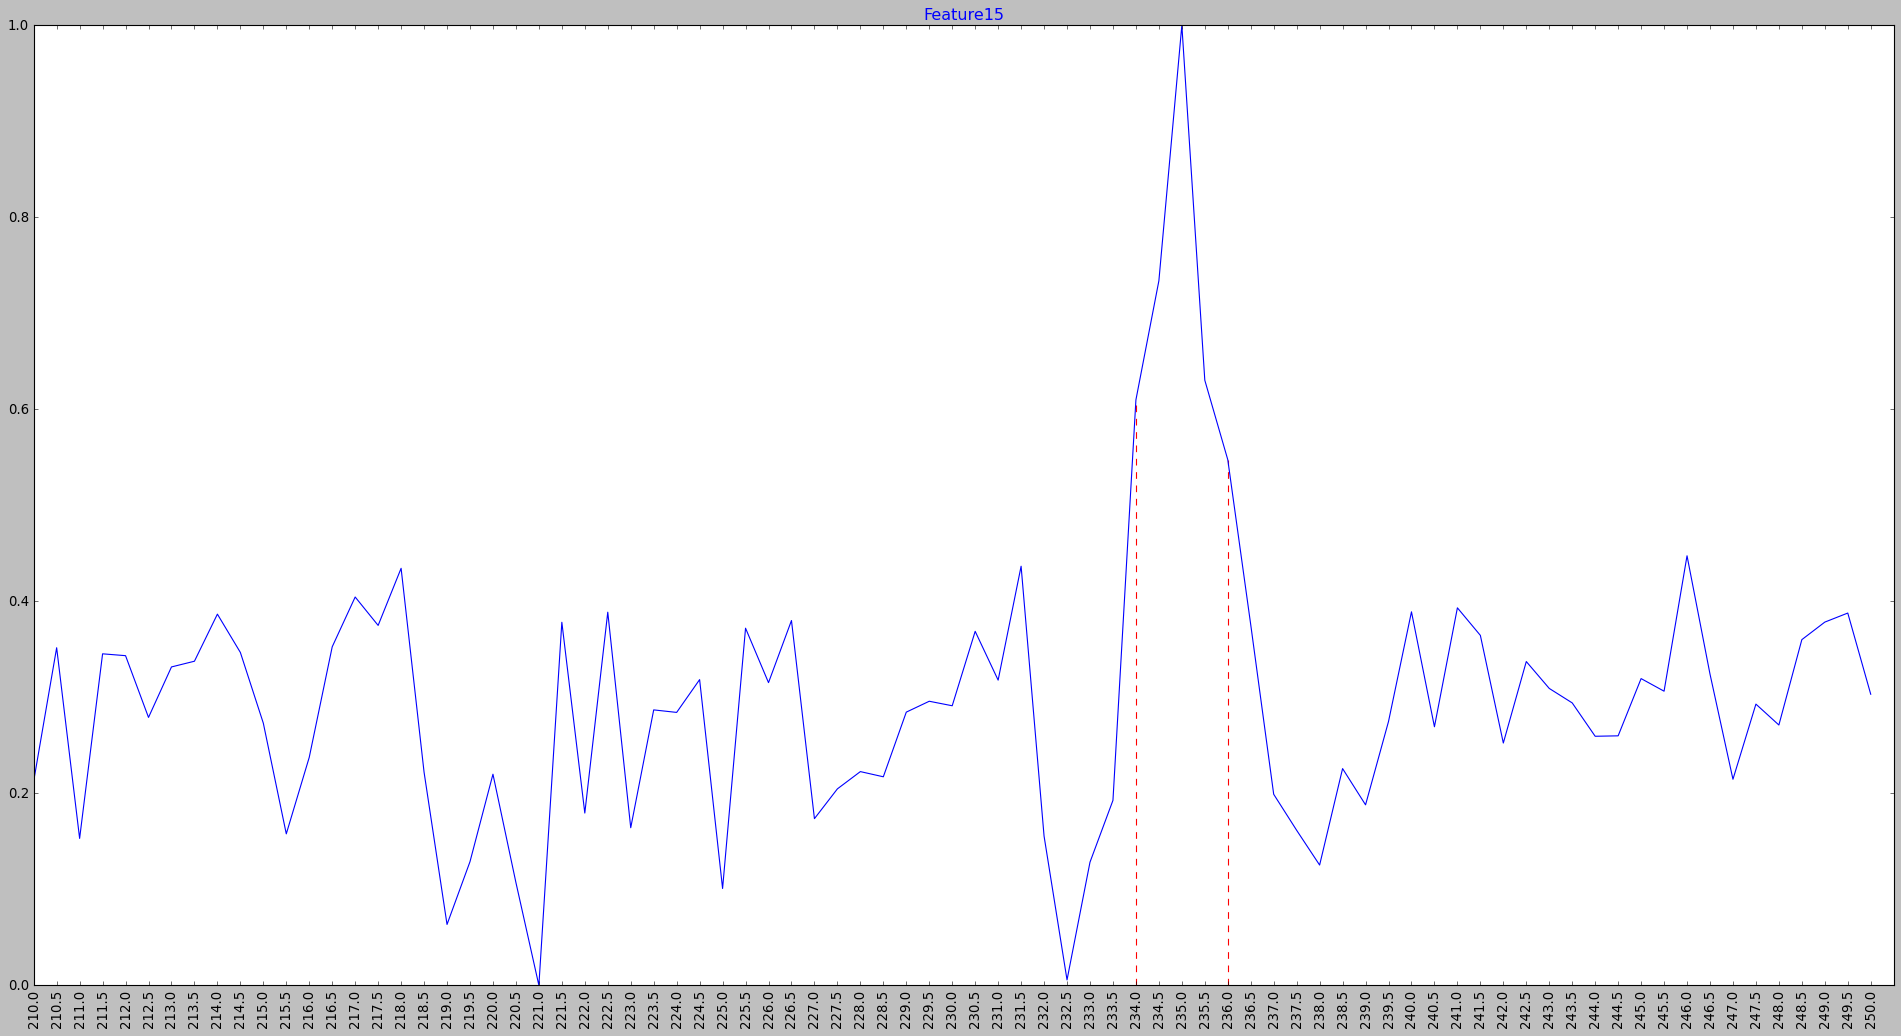

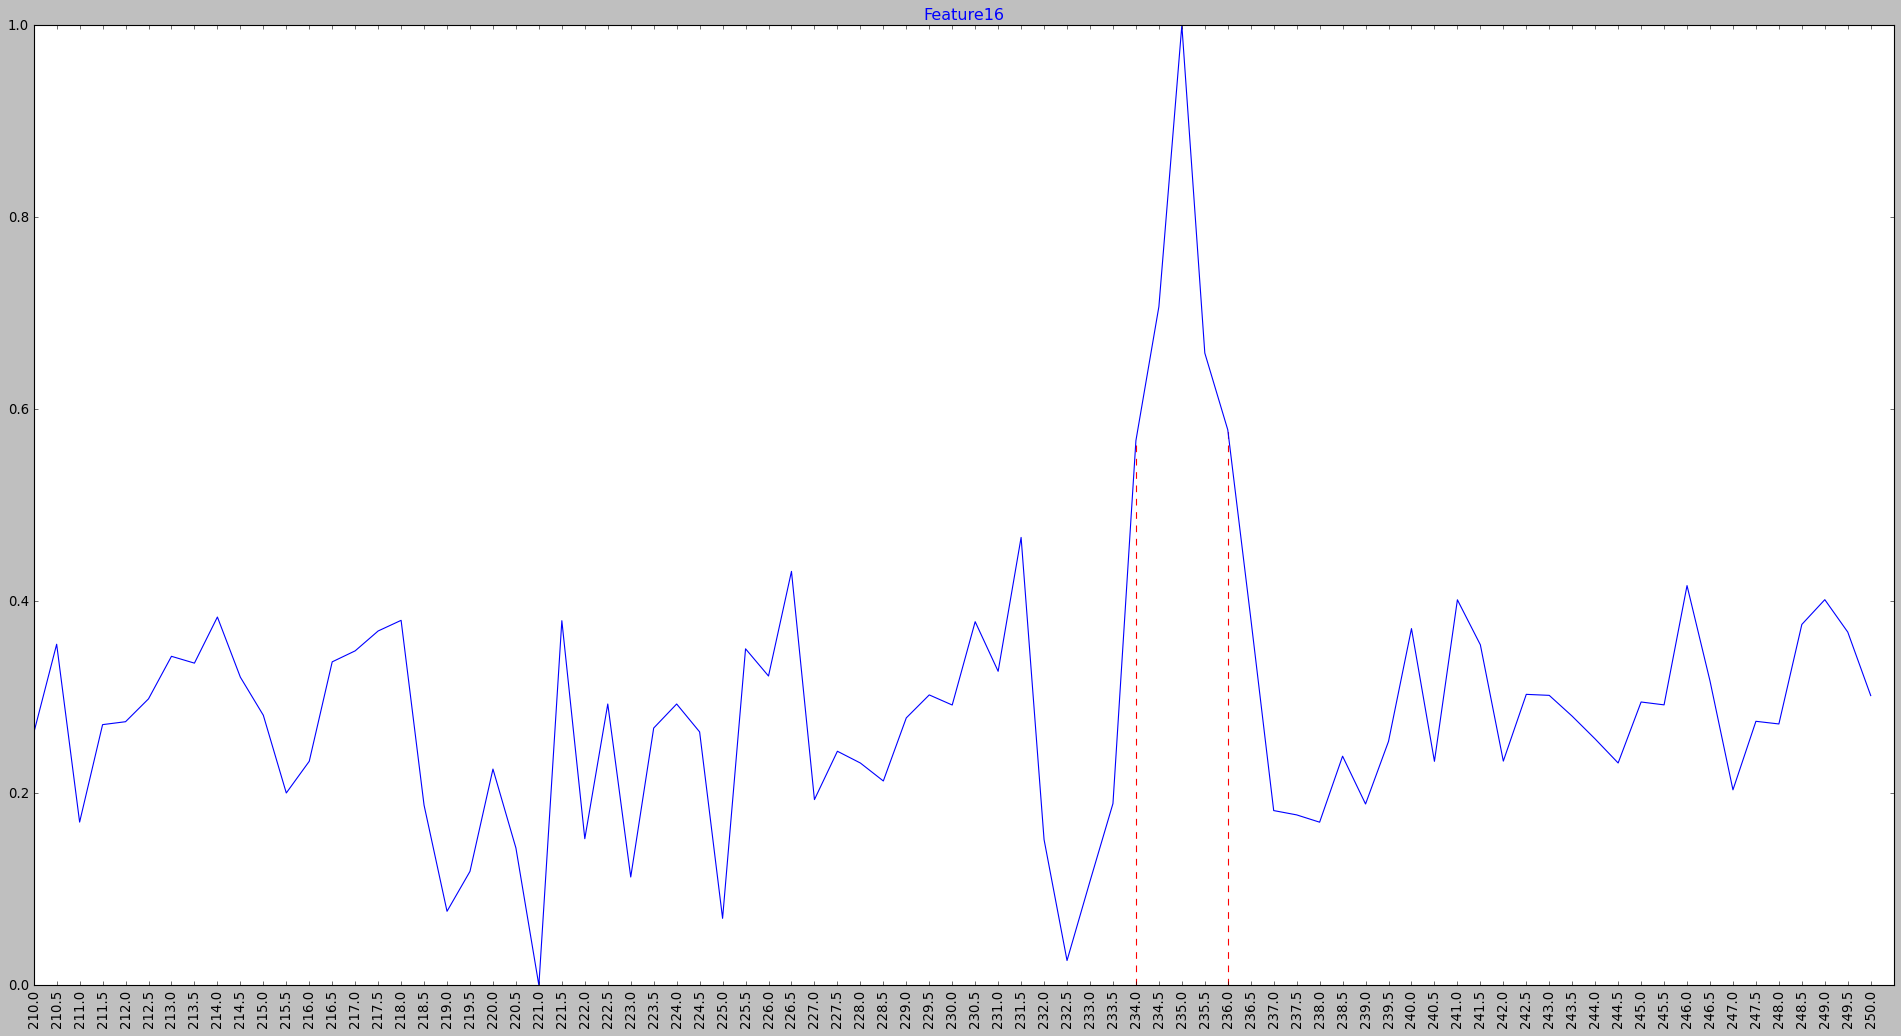

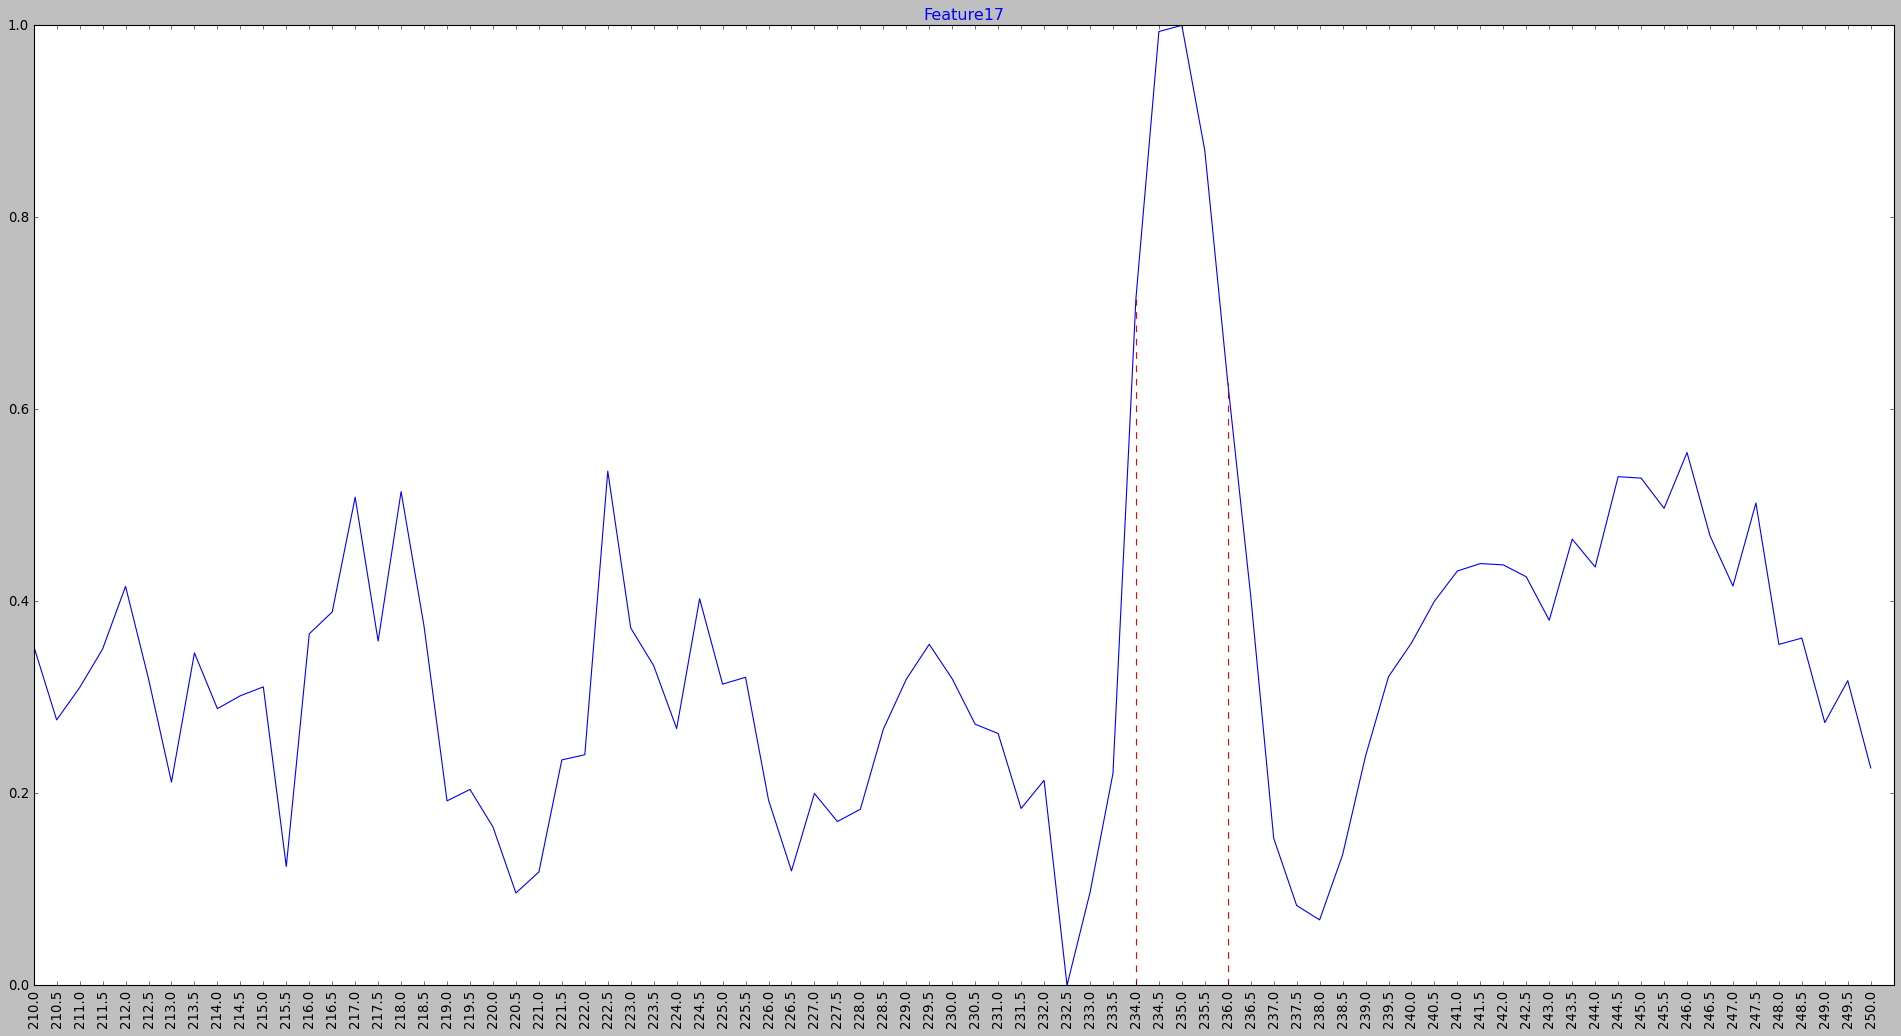

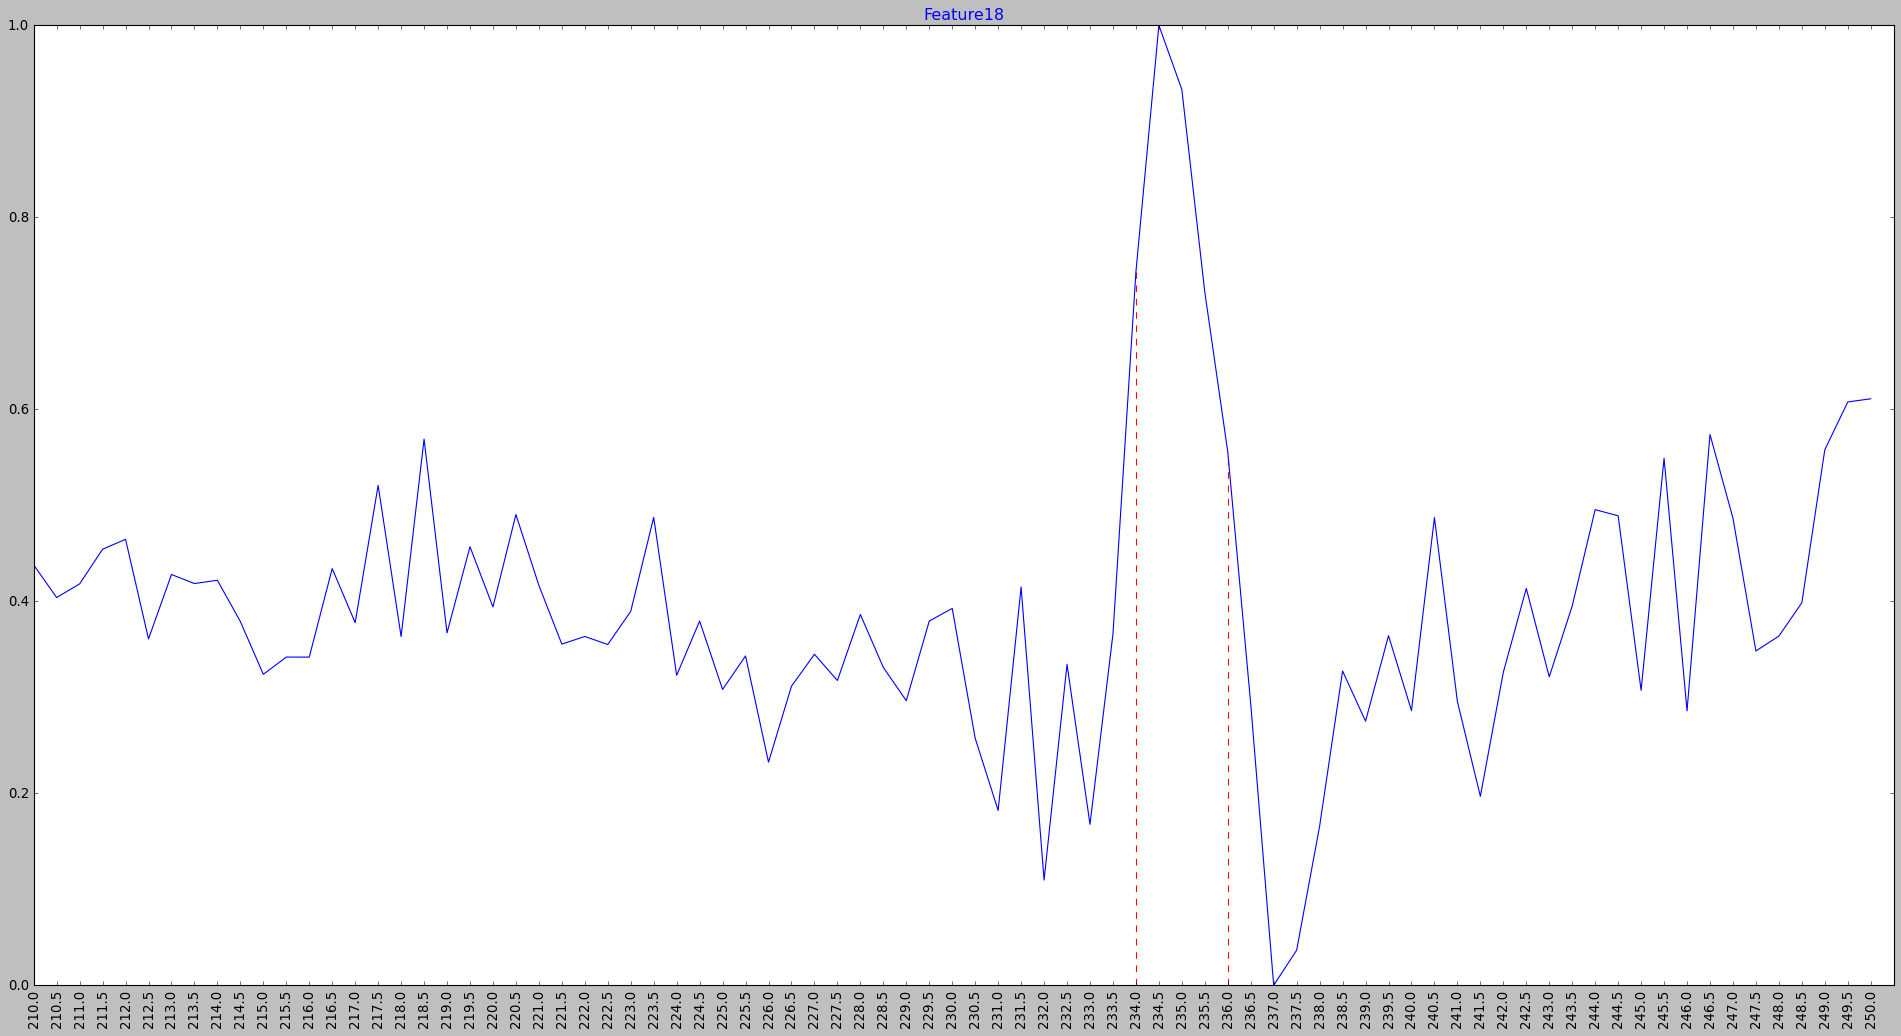

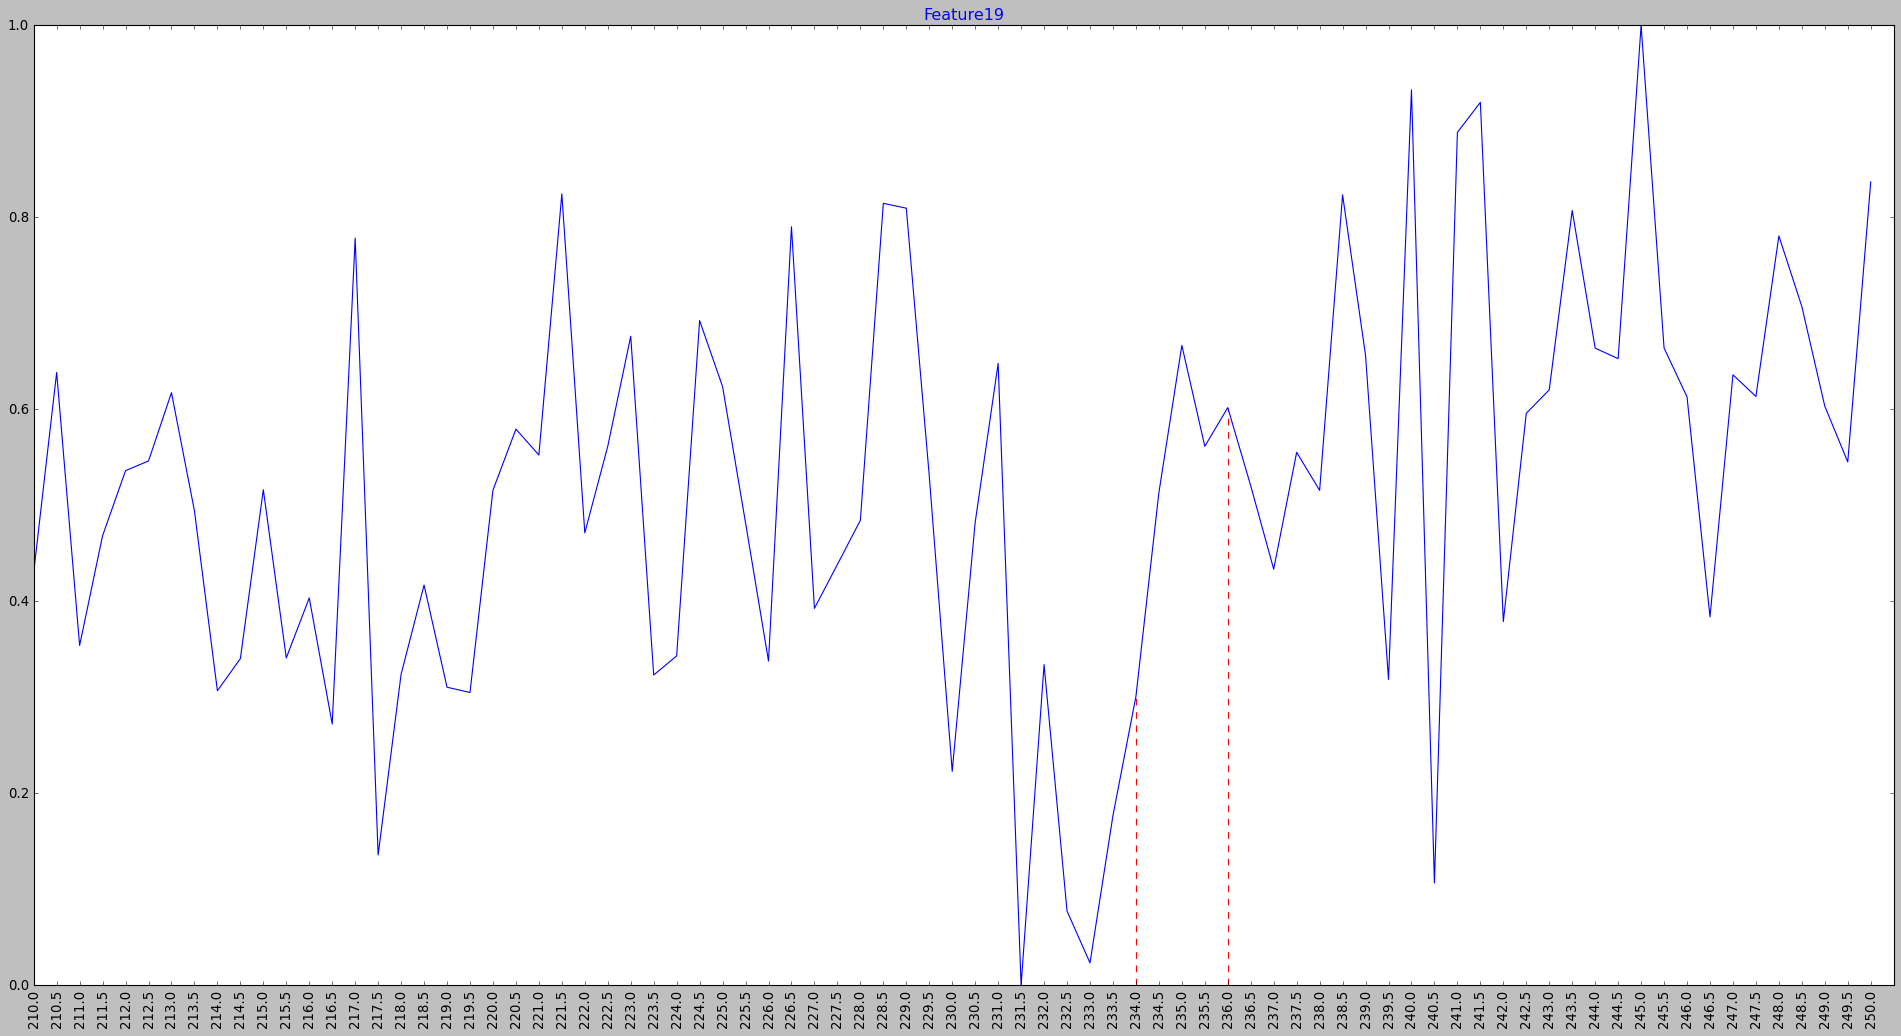

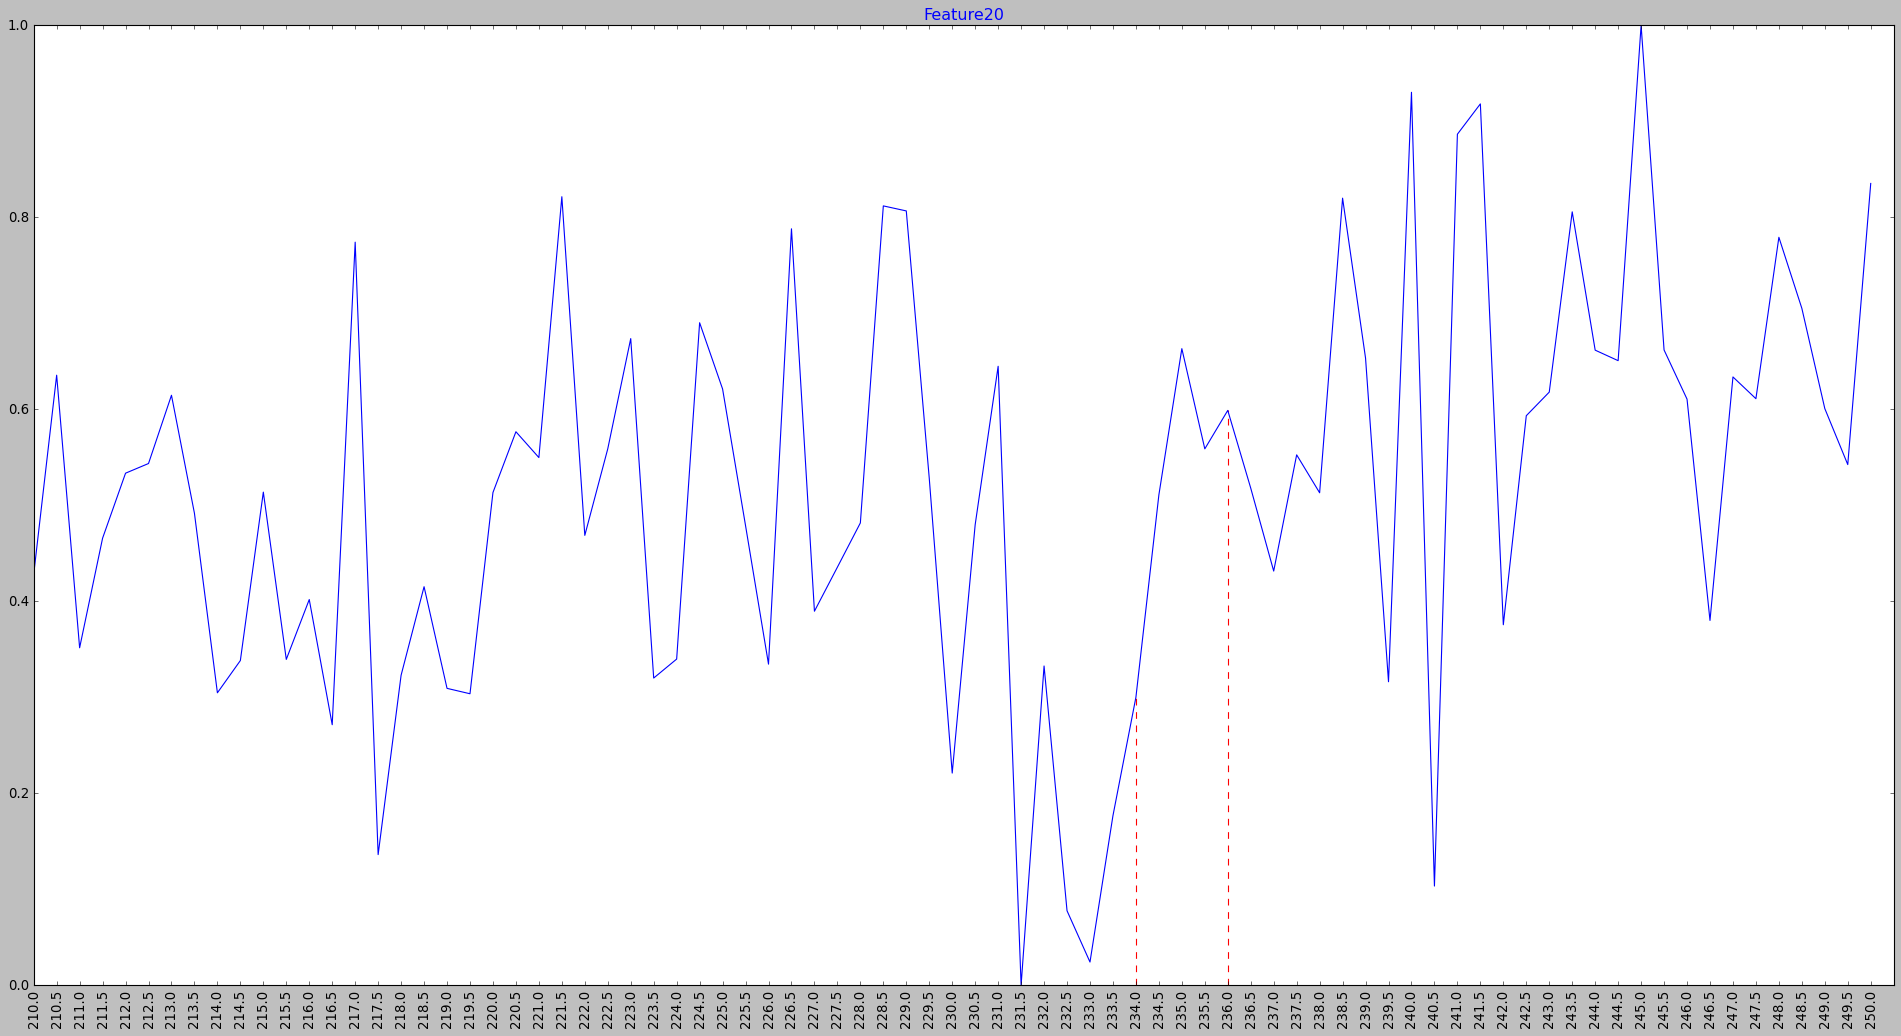

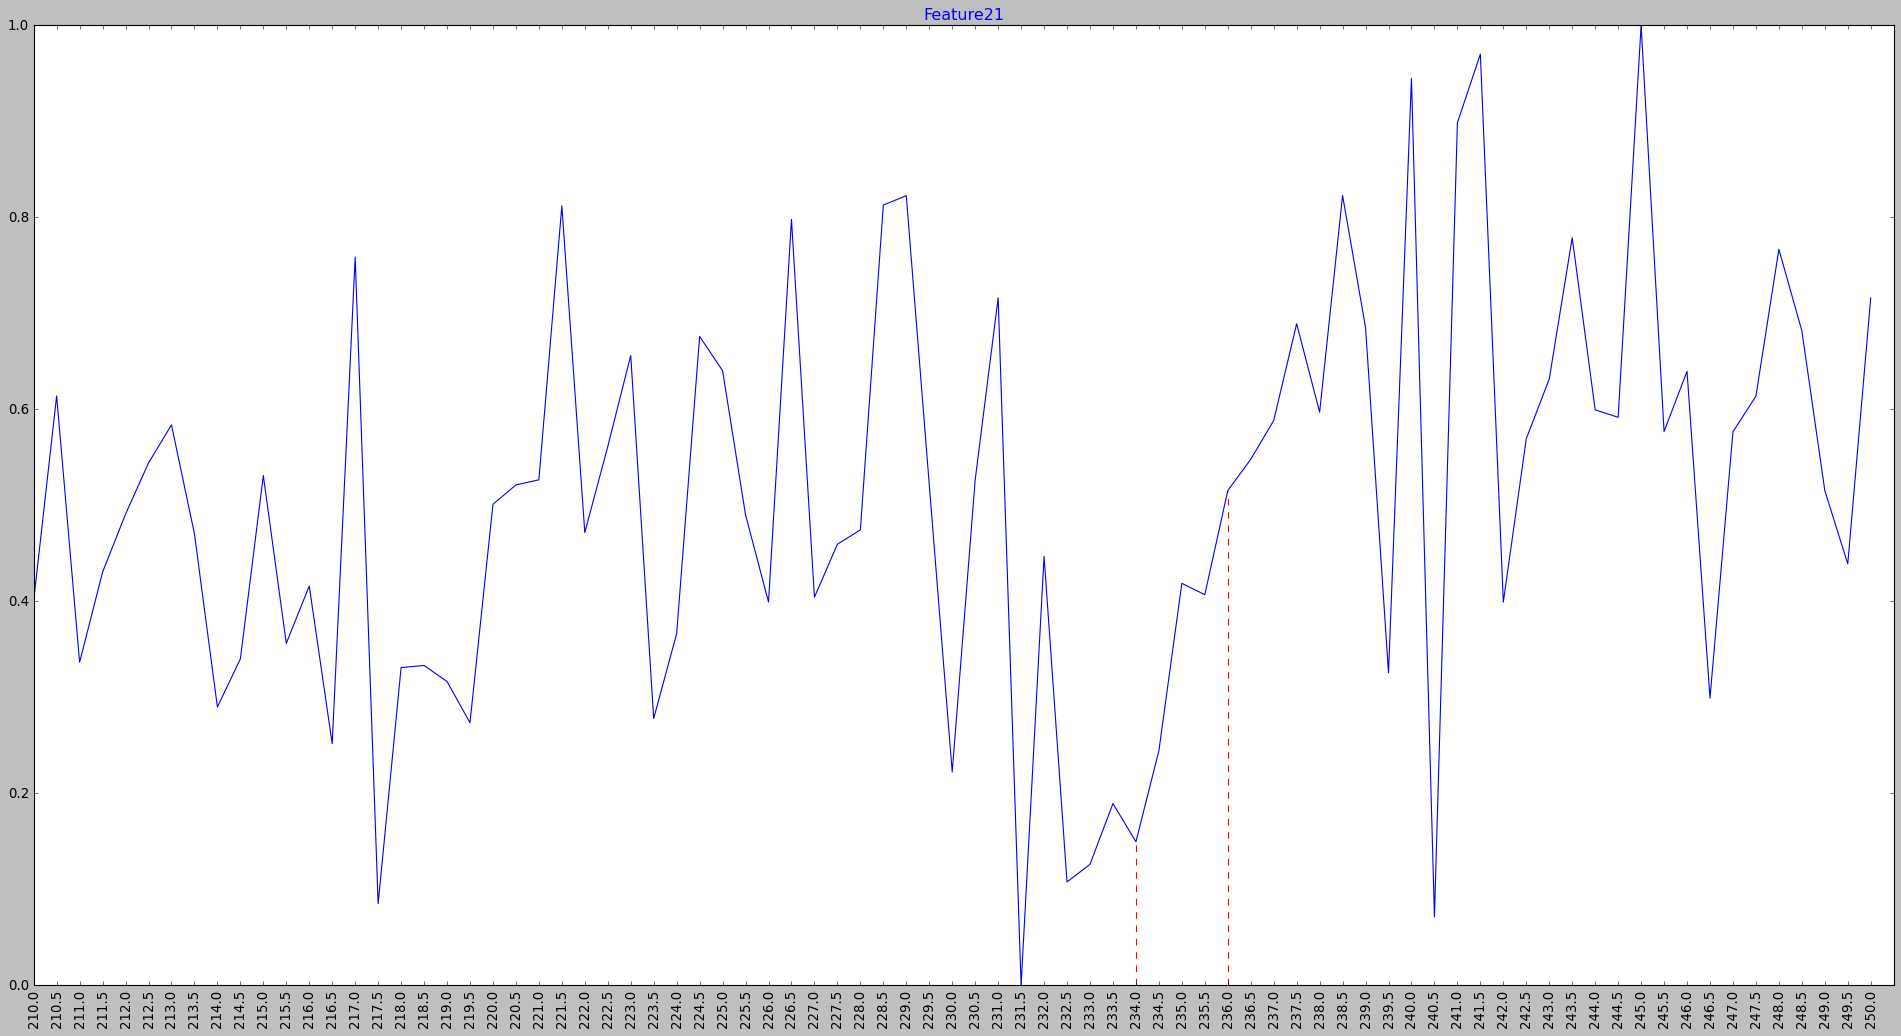

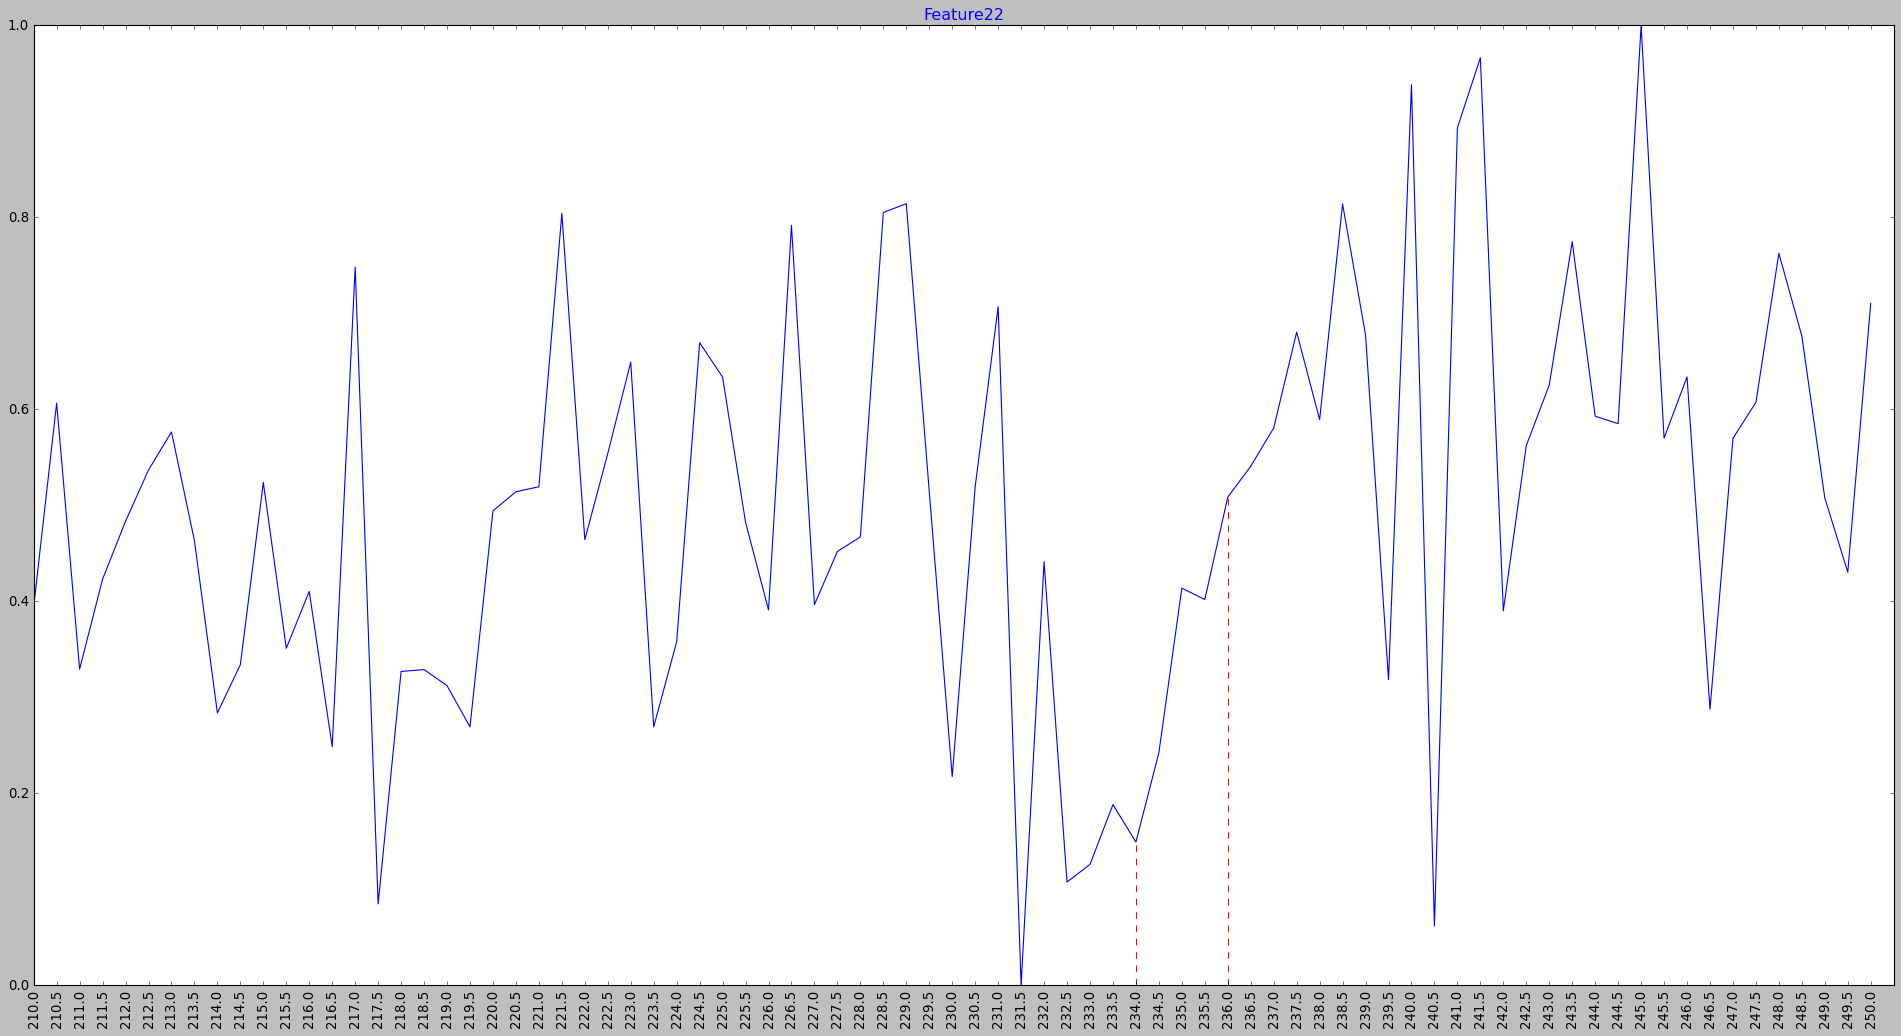

In [12]:
Fap3 = Fap1 - Fap0
data = Fap3
for i in range(Fap1.shape[0]):
    PLOT((data[i,:]-np.min(data[i,:]))/(np.max(data[i,:]-np.min(data[i,:]))),Left_edge,Right_edge,N_group,"Feature",i)

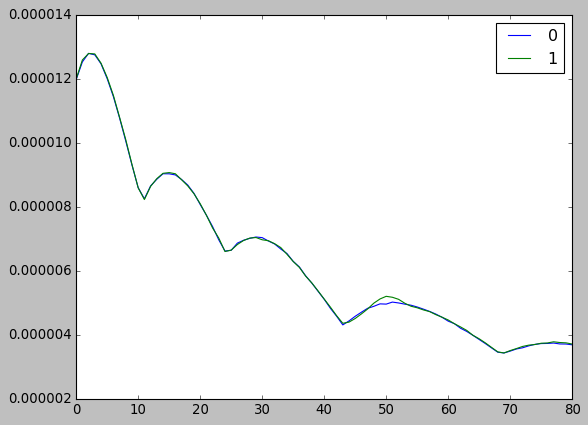

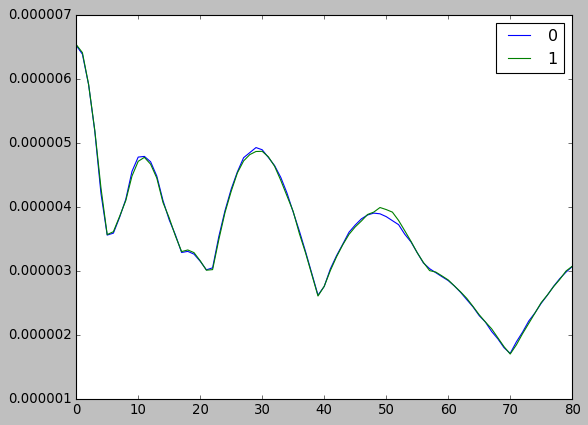

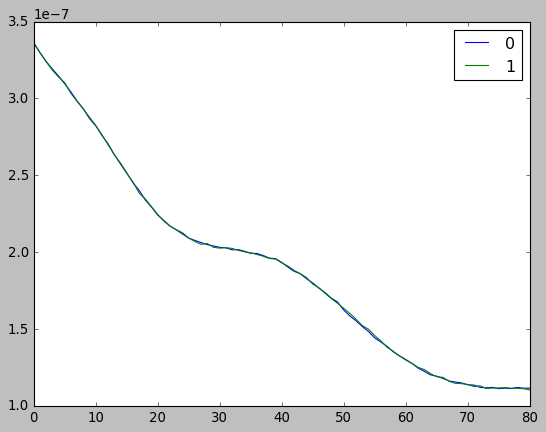

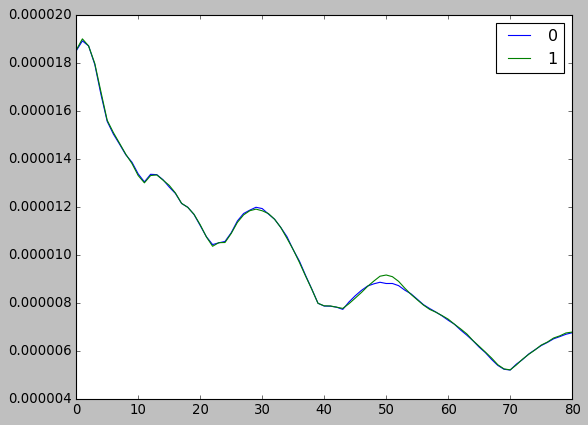

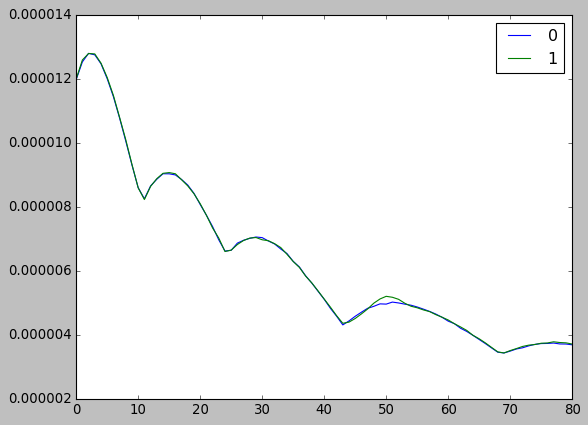

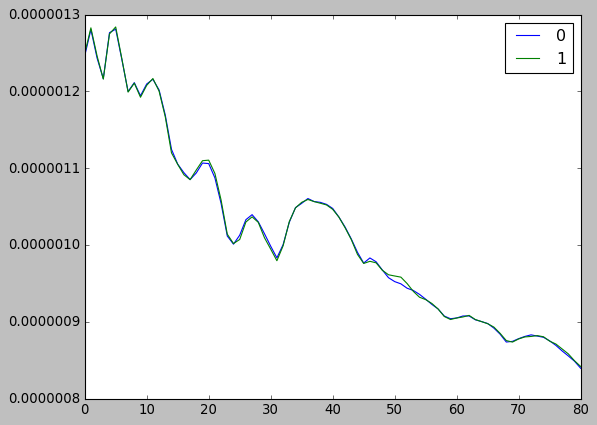

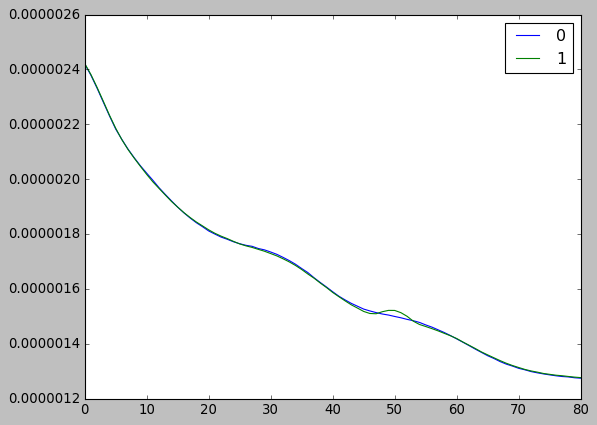

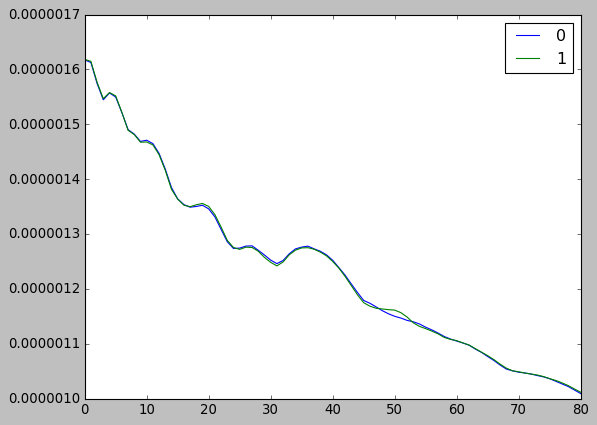

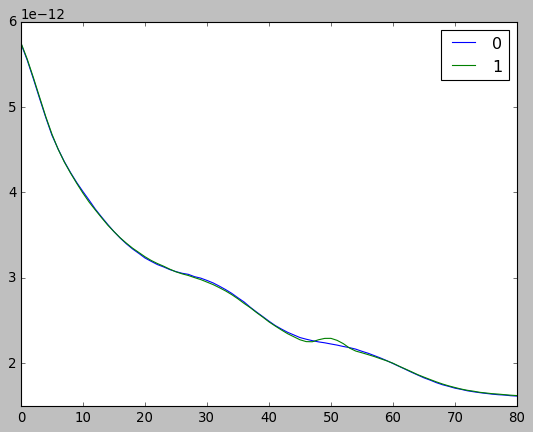

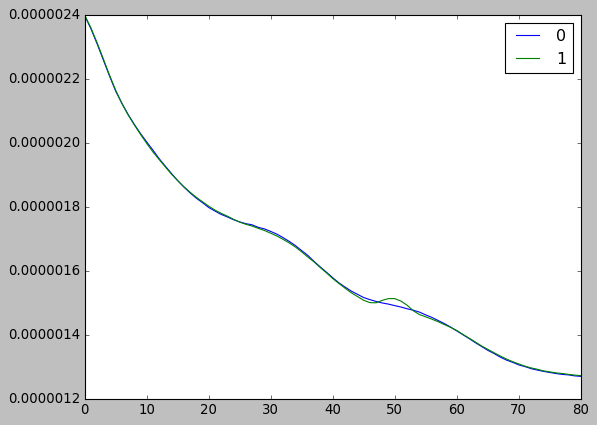

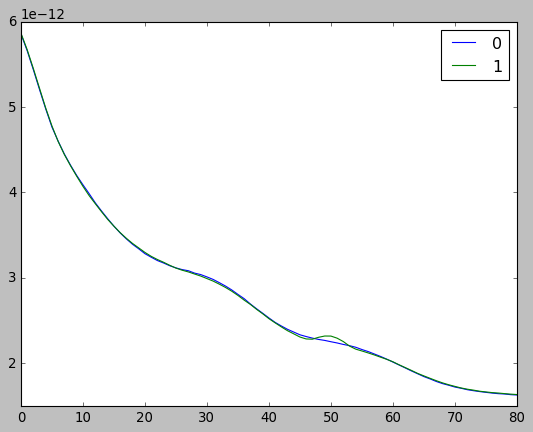

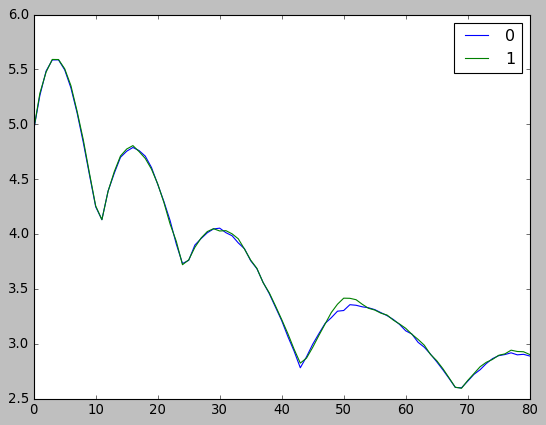

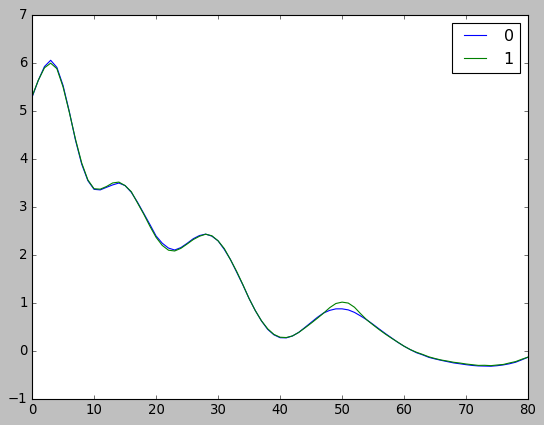

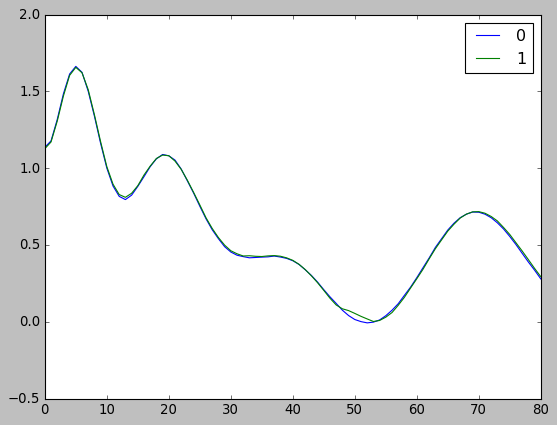

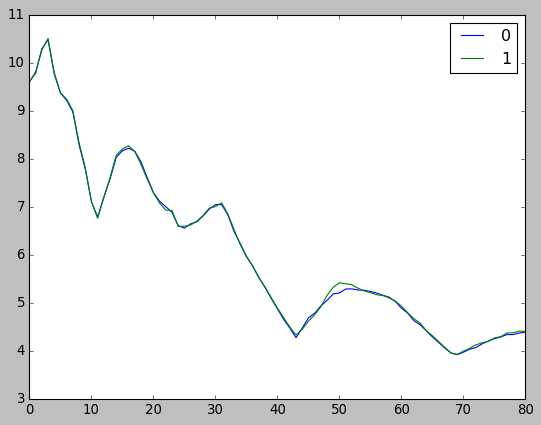

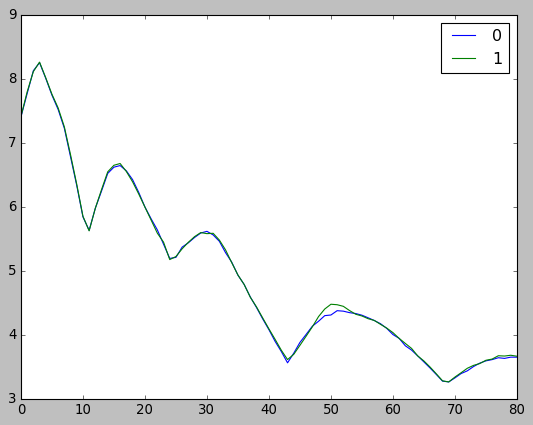

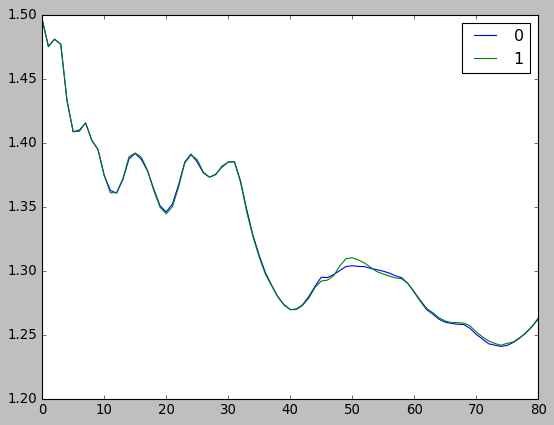

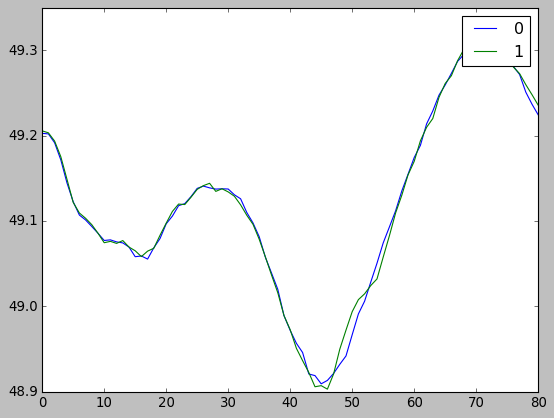

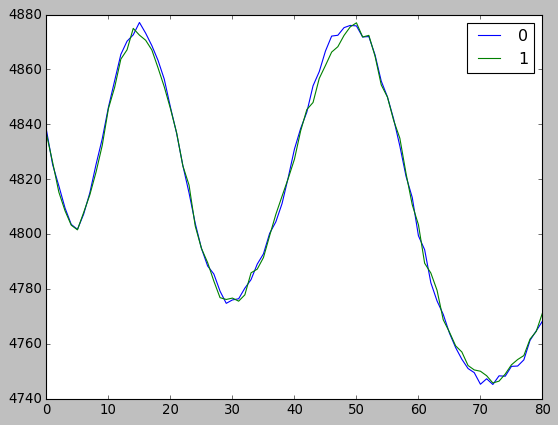

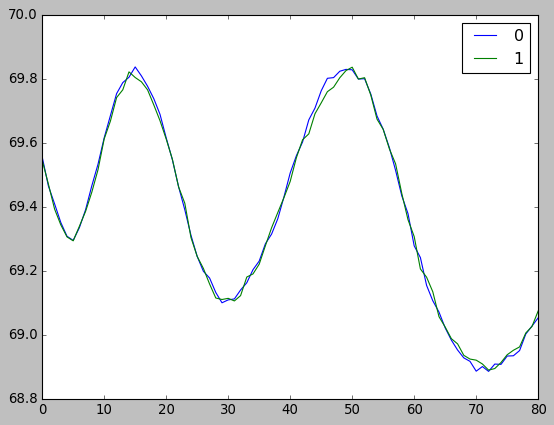

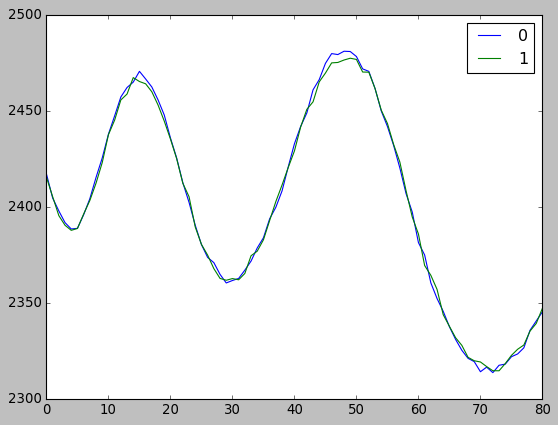

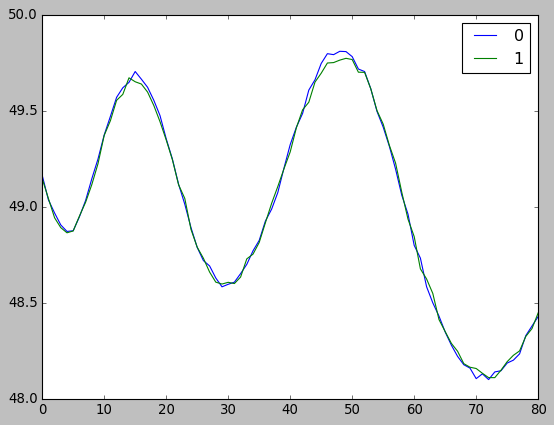

In [13]:
data0 = Fap0
data1 = Fap1
for i in range(Fap2.shape[0]):
    plt.plot(data0[i,:],label='0')
    plt.plot(data1[i,:],label='1')
    plt.legend()
    plt.show()

In [14]:
# Select_Fap1 = Fap1[[0,1,3,4,5,6,7,8,9,10,11,12,14,15,16,18,19],:]
# data = Select_Fap1
# for i in range(data.shape[0]):
#     PLOT((data[i,:]-np.min(data[i,:]))/(np.max(data[i,:]-np.min(data[i,:]))),Left_edge,Right_edge,N_group,"Feature",i)

In [15]:
# Select_Fap2 = Select_Fap1[[0,3,5,7,8,9,10,11,12,13,14,15,16],:]
# data = Select_Fap2
# for i in range(data.shape[0]):
#     PLOT((data[i,:]-np.min(data[i,:]))/(np.max(data[i,:]-np.min(data[i,:]))),Left_edge,Right_edge,N_group,"Feature",i)

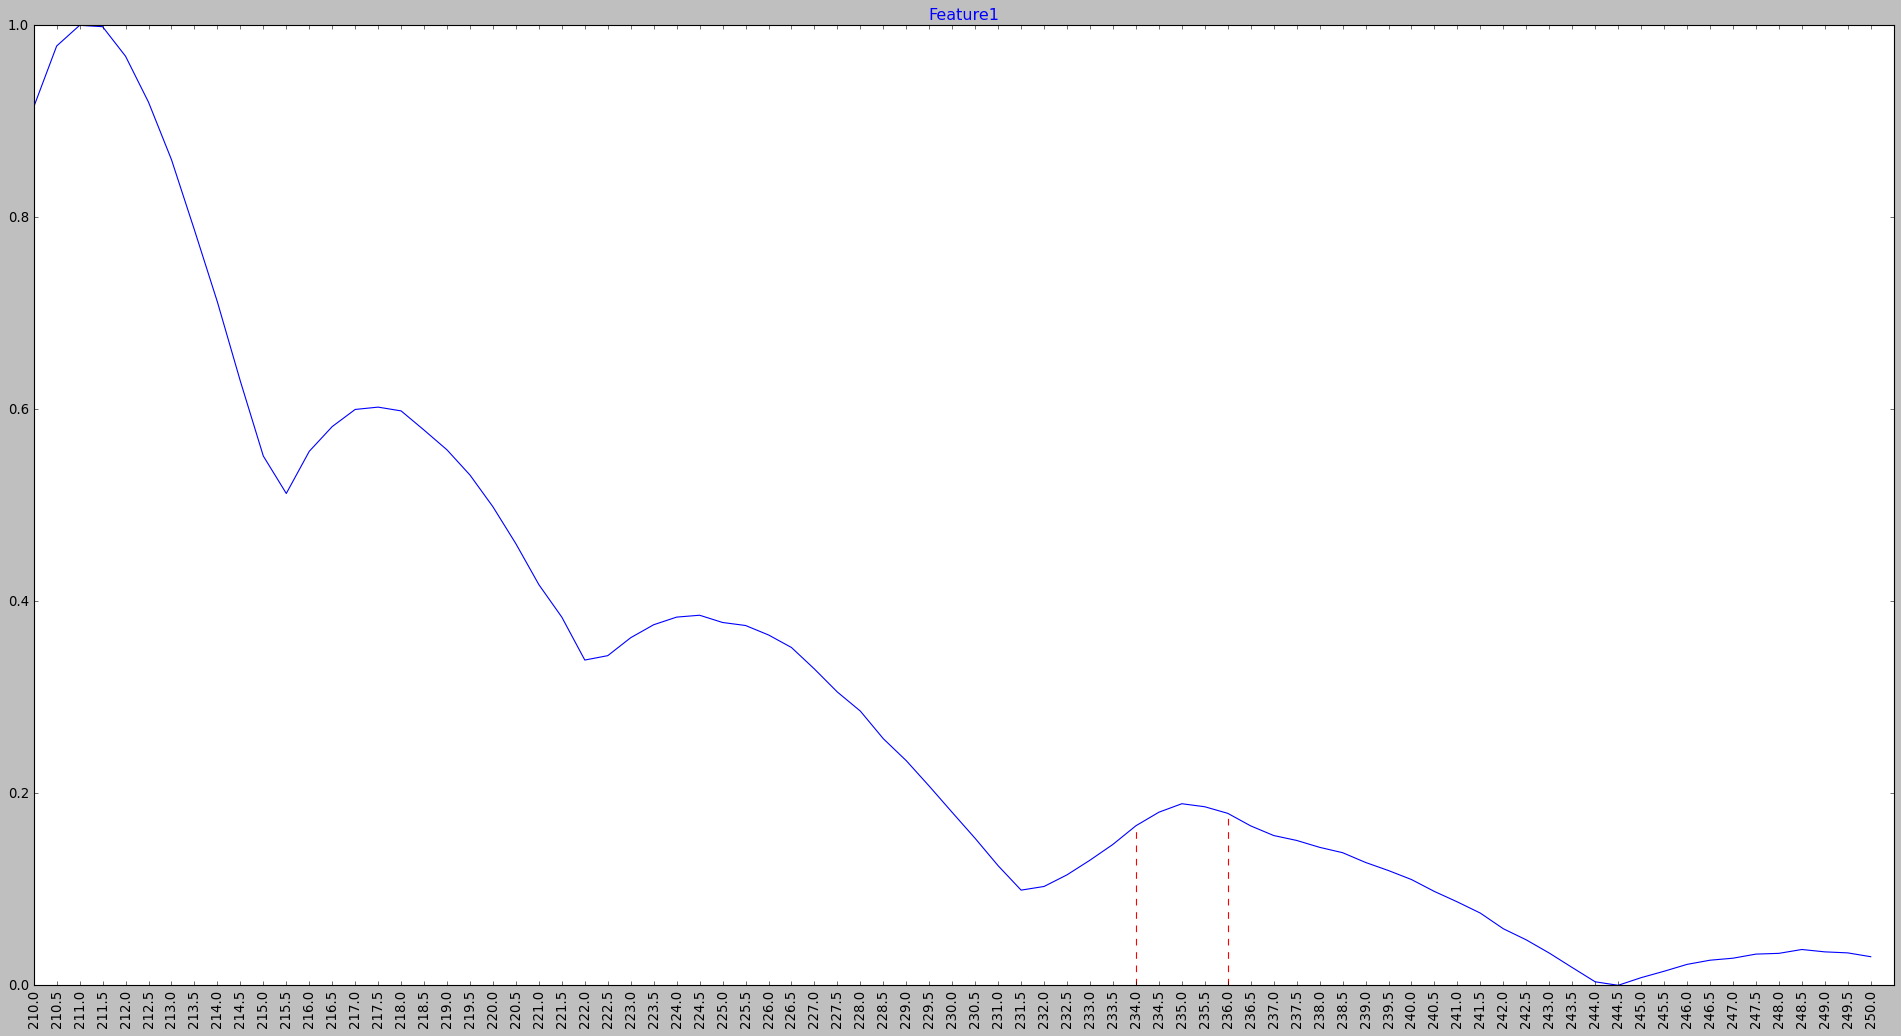

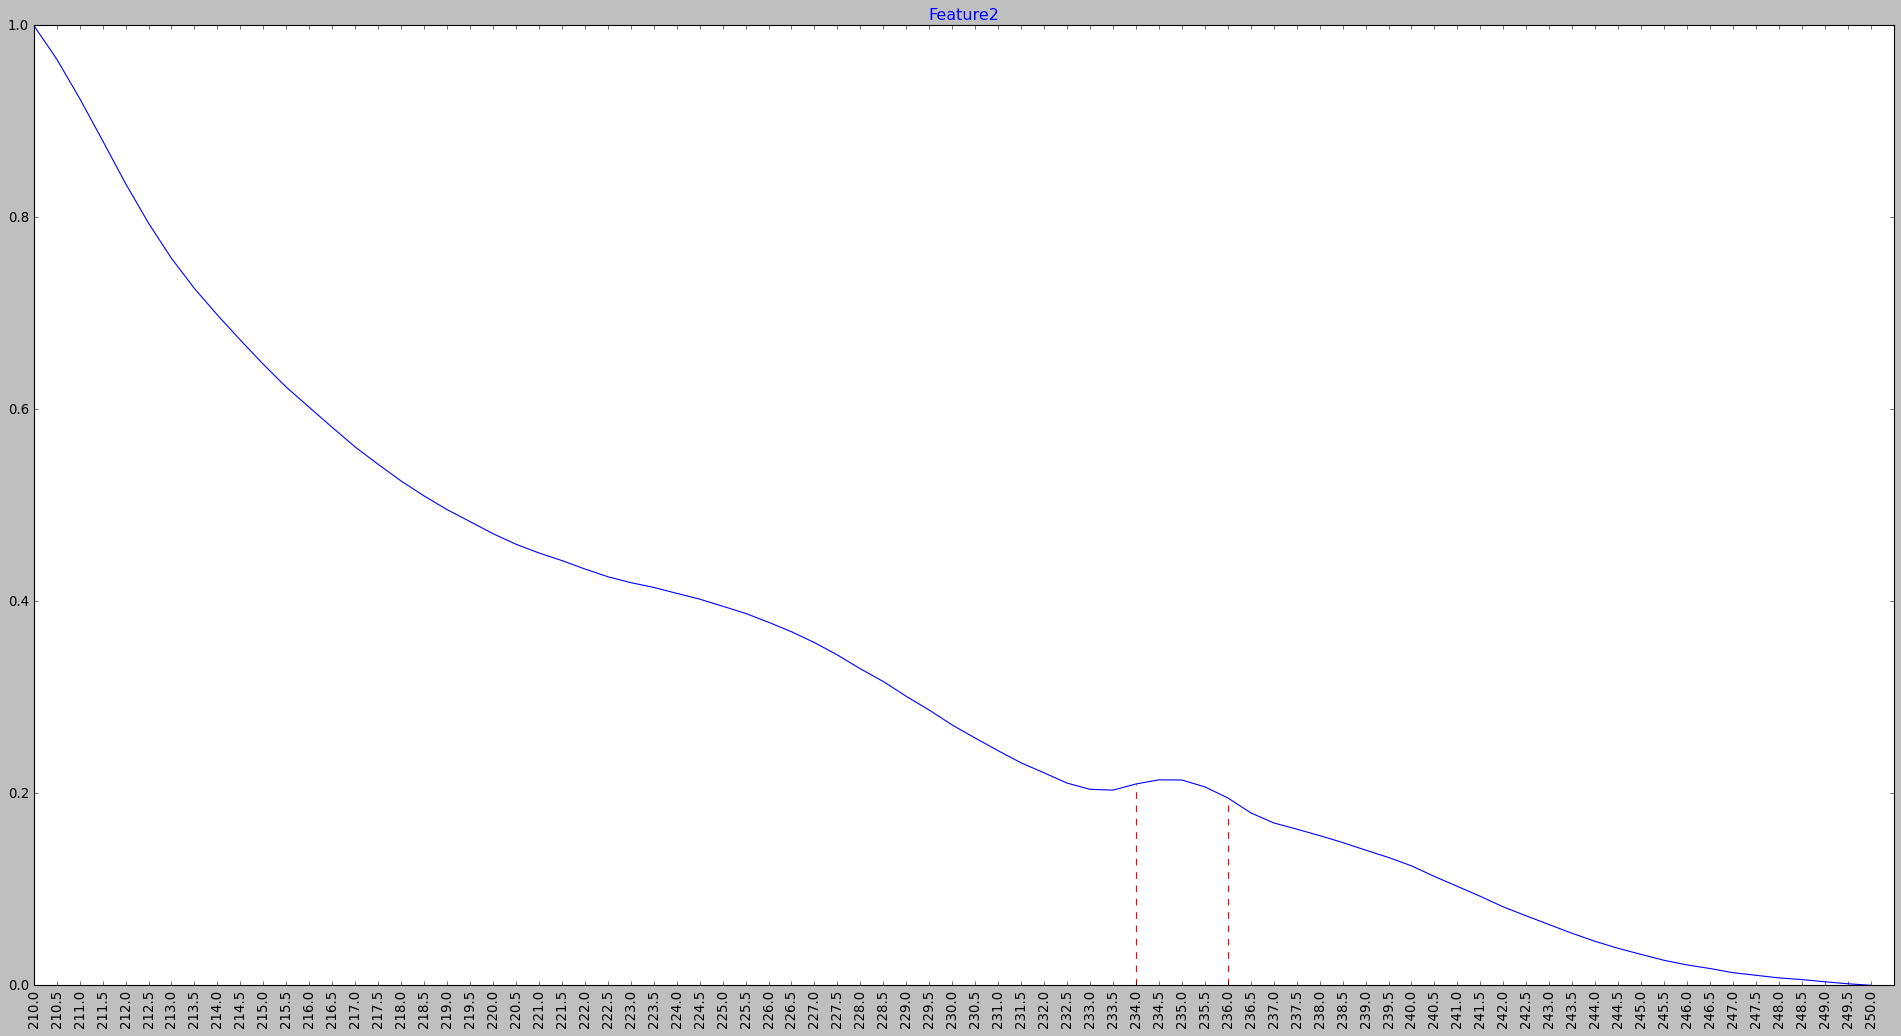

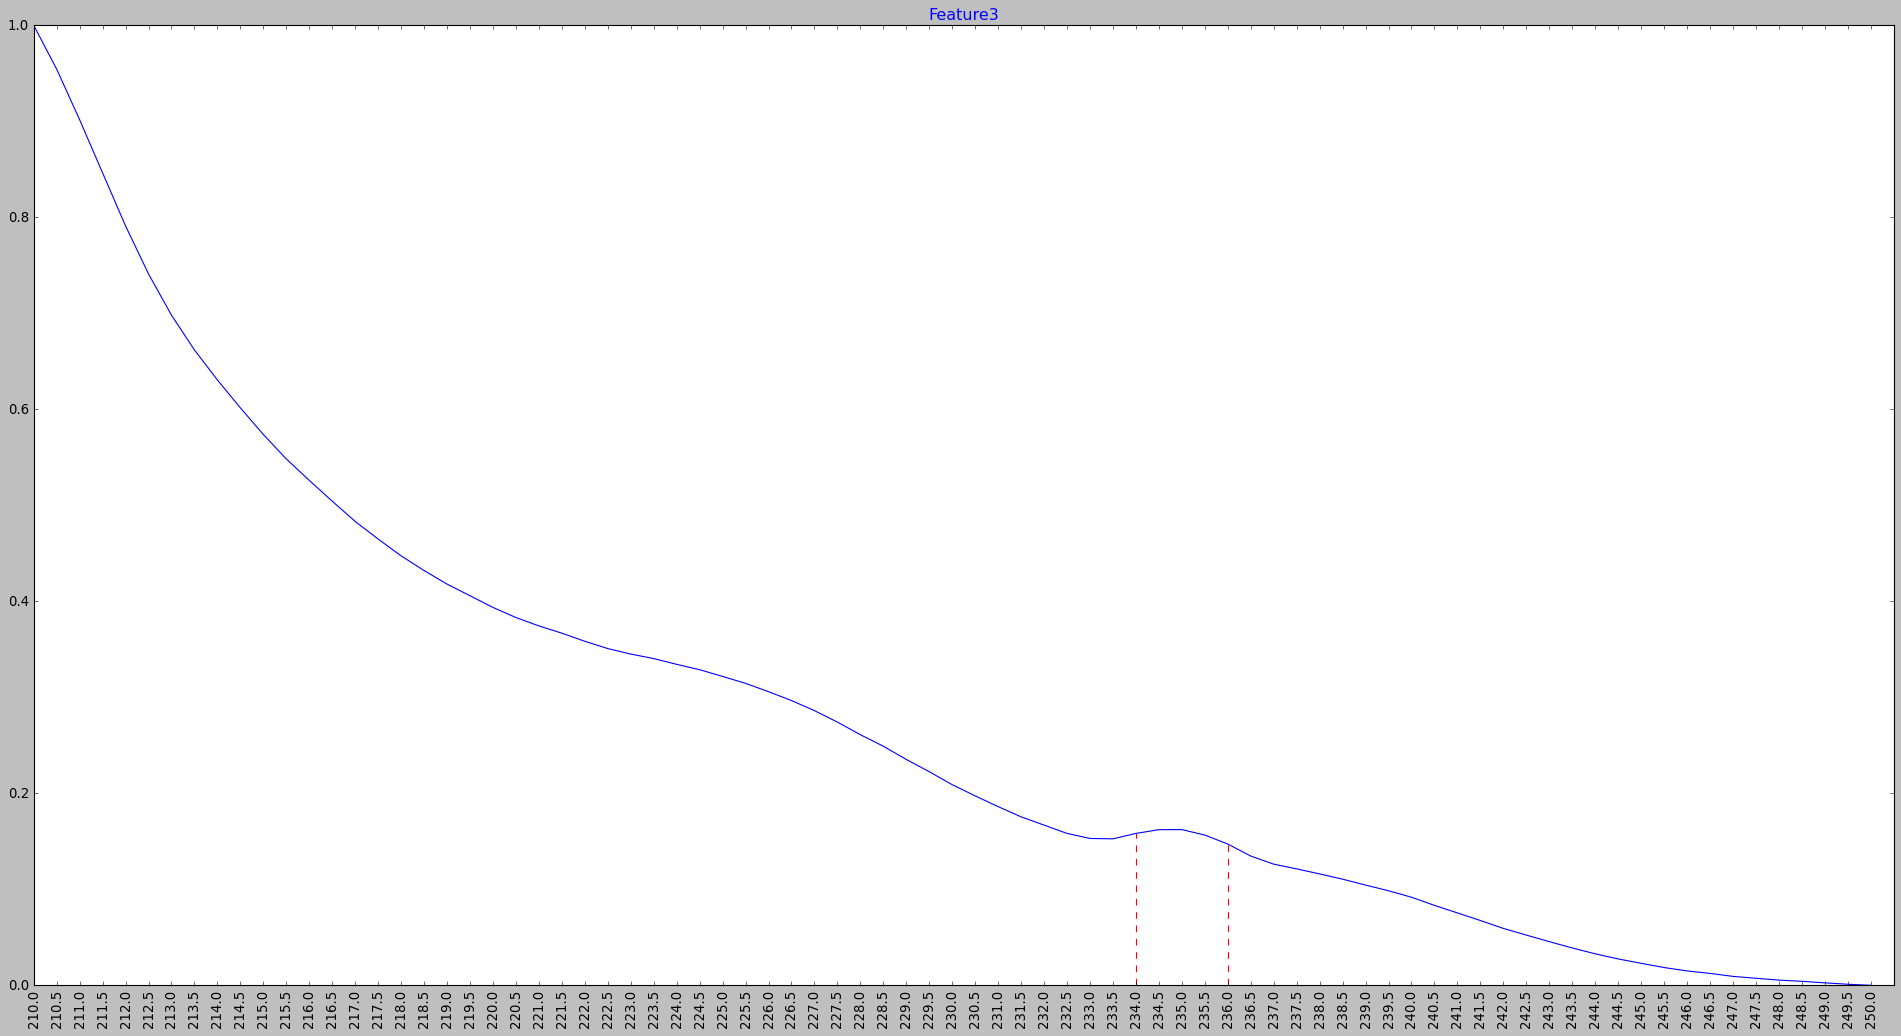

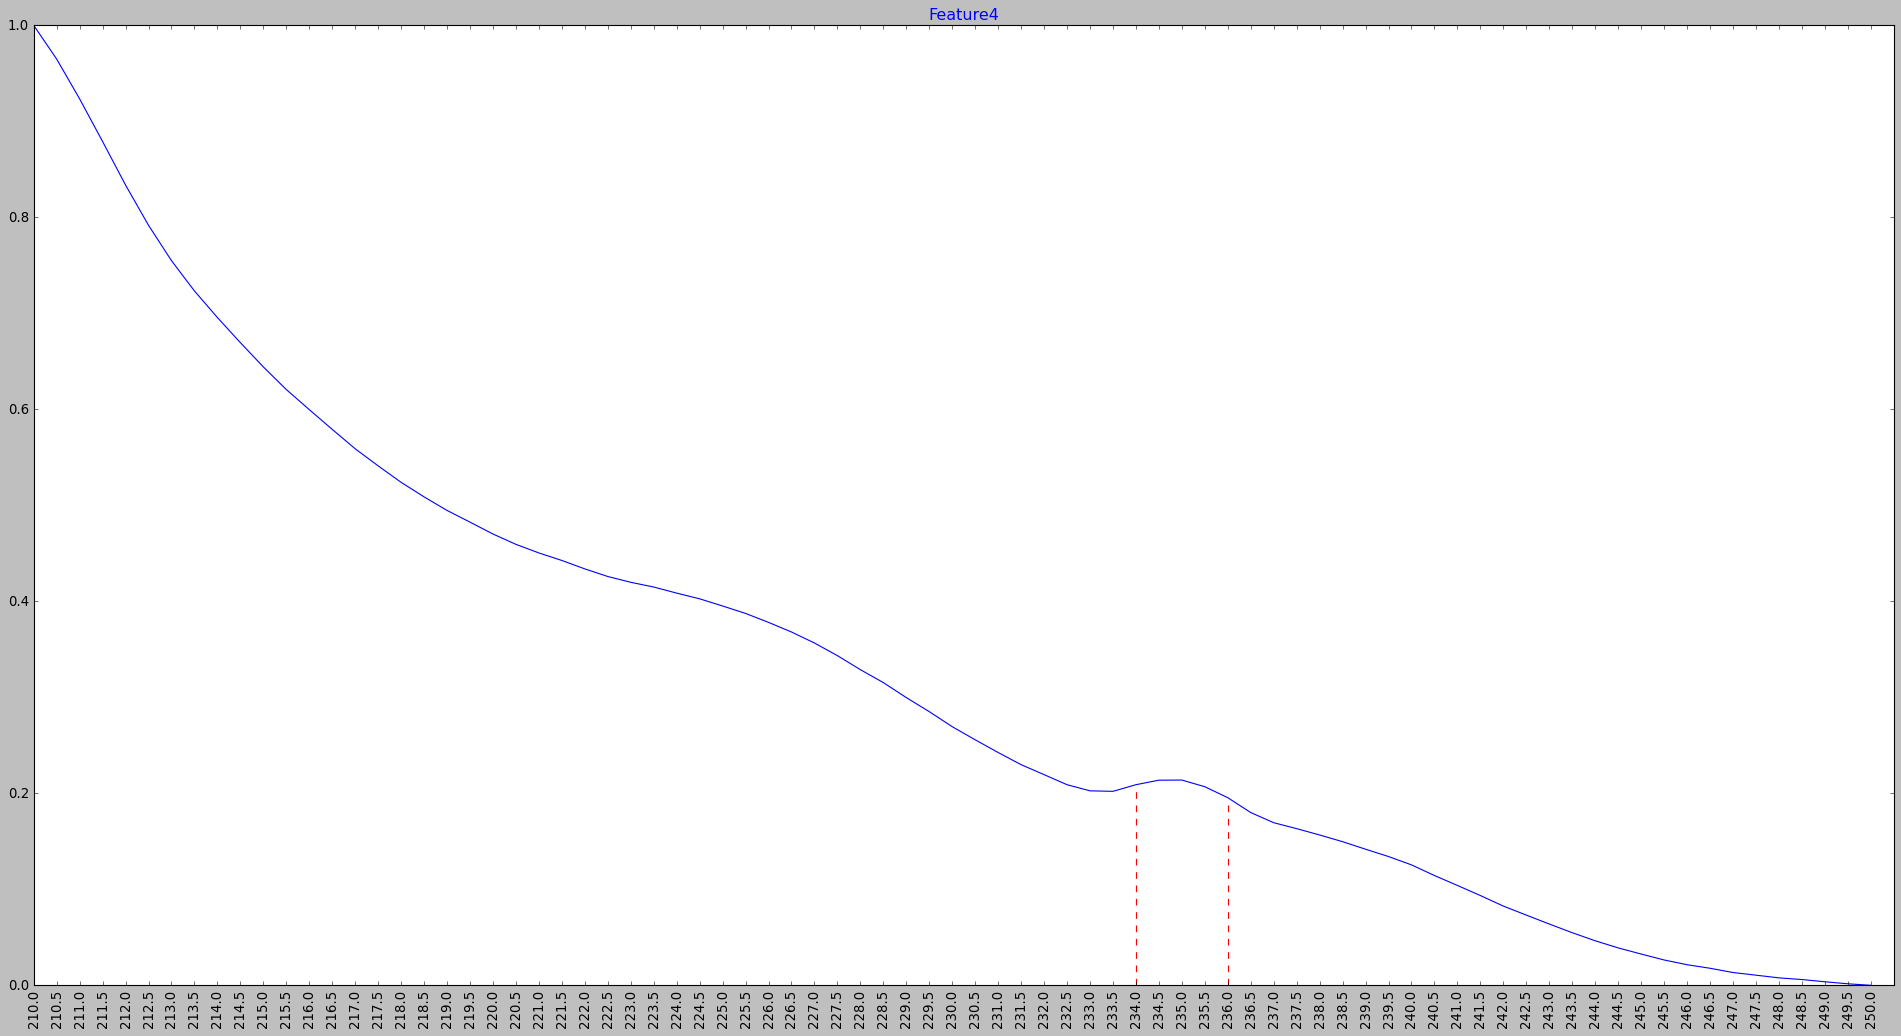

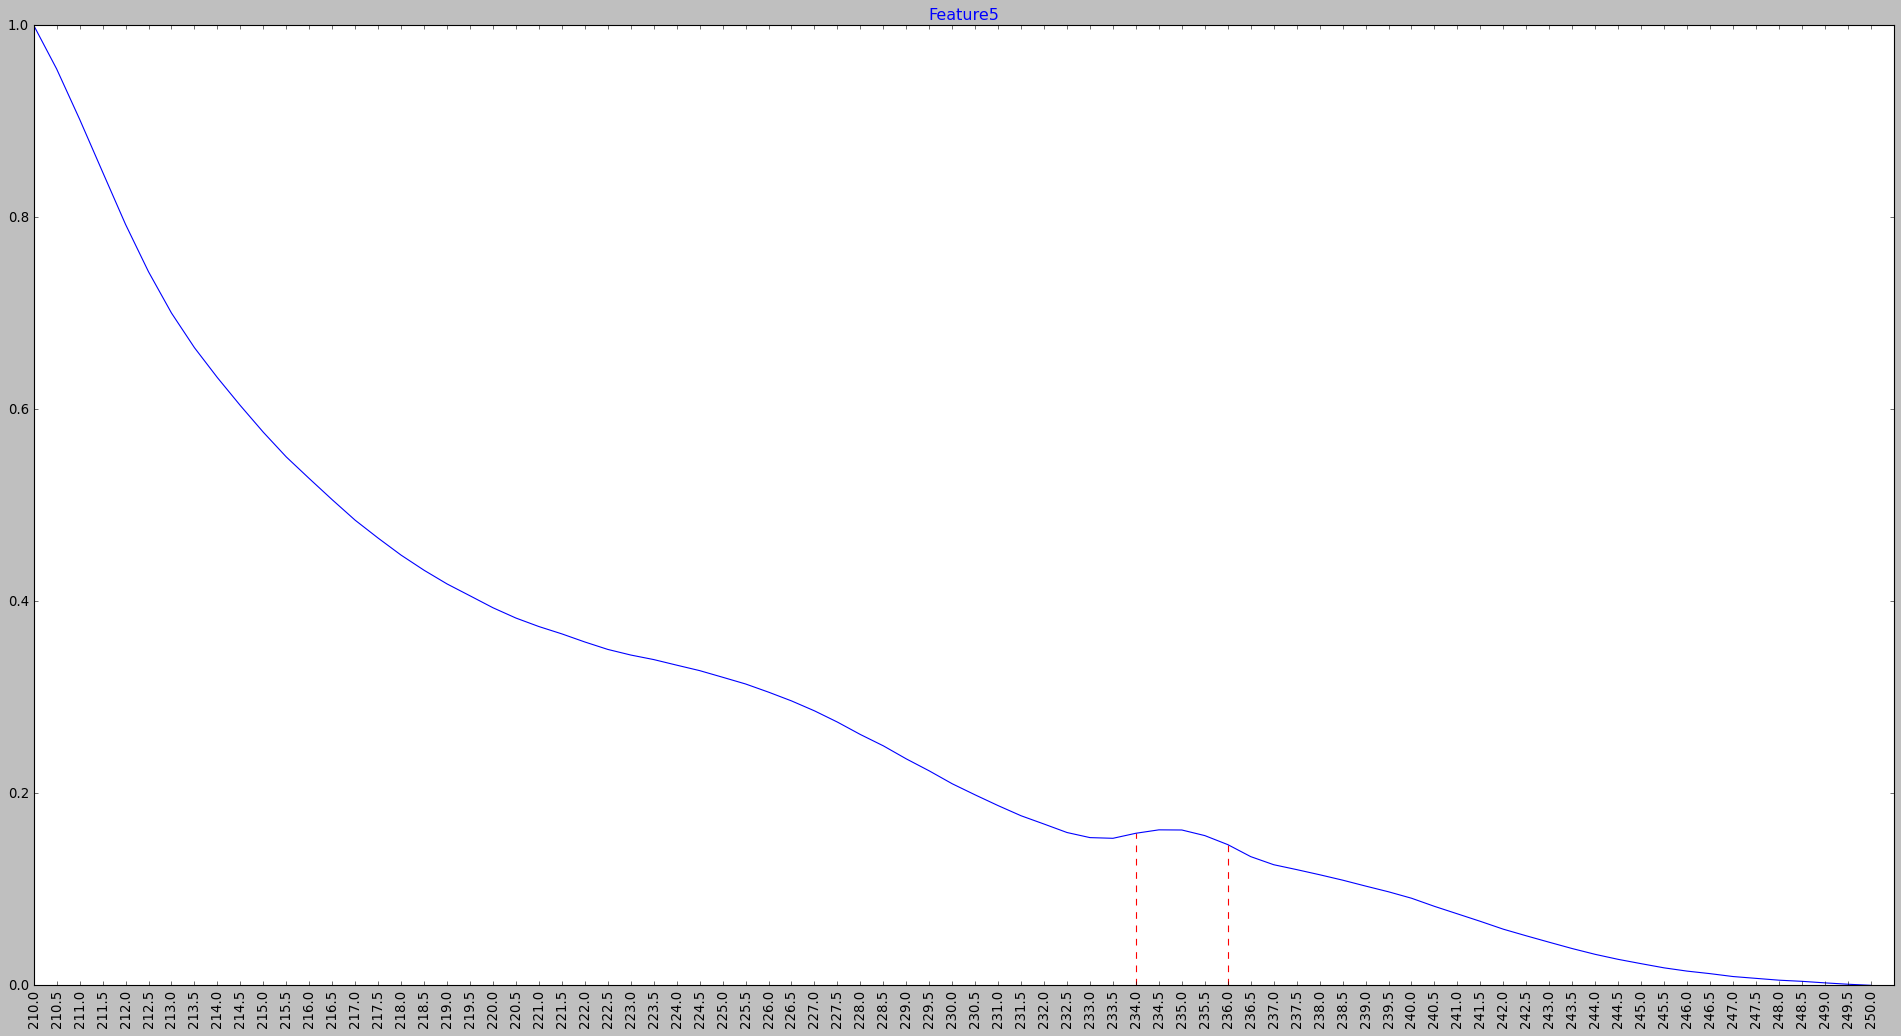

In [16]:
Select_Fap = Fap1[[4,6,8,9,10],:]
data = Select_Fap
for i in range(data.shape[0]):
    PLOT((data[i,:]-np.min(data[i,:]))/(np.max(data[i,:]-np.min(data[i,:]))),Left_edge,Right_edge,N_group,"Feature",i)